In [2]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")

# Visu von einzelnen TFBS um Überblick zu geben
- Häufigkeit TFBS unique im gesamten Datensatz
- Häufigkeit der Vorkommen jedes TFBS pro Promotor

In [84]:
from get_TFBS_pair import get_tfbs_subset, get_information_for_singel_tfbs_set

tfbs = get_tfbs_subset(data, ["sadasd"]).saveas()

In [86]:
for i in tfbs:
    print("i")

In [79]:
def get_orientation_for_single_tfbs_in_pct(tfbs_name, tfbs_arr, tfbs_orientation):
    """
    Calculates the percentage of nT Orientation for a specific tfbs.
    """
    # get List of orientation of tfbs
    tfbs_orientation_per_prom = []
    for idx, orientation in enumerate(tfbs_orientation): 
        if tfbs_arr[idx] == tfbs_name:
            tfbs_orientation_per_prom.append(orientation)
    # Calculate percentage of nT in Orientation List. 
    pct_nT = np.sum(np.array(tfbs_orientation_per_prom)=="nT")/len(np.array(tfbs_orientation_per_prom))

    return pct_nT

In [92]:
def get_count_of_single_tfbs(data, tfbs):
    """
    Function that calculates how often a certain tfbs appears in all regions, as well as the number and orientation of the tfbs per region.
    If the tfbs does not occur in the data, it will return 0 to all output variables.
    """
    tfbs_BedTool = get_tfbs_subset(data, [tfbs]).saveas()

    count_tfbs = np.array([])
    nT_percent = np.array([])

    if len(tfbs_BedTool)>0:
        for BedTool_Interval in tfbs_BedTool:
            chr, geneID, tfbs_arr, tfbs_close_tss_arr, tfbs_dist_tss_arr, tfbs_orientation, tfbs_count, tfbs_unique_count = get_information_for_singel_tfbs_set(BedTool_Interval)
            # get array for tfbs count per region. tfbs_arr == tfbs gives array with True or False. By using np.sum, True=1 and False=0, so it will return the count of True.
            count_tfbs_per_prom = np.sum(tfbs_arr == tfbs)
            count_tfbs = np.append(count_tfbs, count_tfbs_per_prom)
            # get percentage of nT Orienation per region
            nT_pct = get_orientation_for_single_tfbs_in_pct(tfbs, tfbs_arr, tfbs_orientation)
            nT_percent = np.append(nT_percent, nT_pct)
        
        count_prom = len(count_tfbs)
    else:
        print(f"{tfbs} does not appear in any region.\n")
        count_tfbs = np.array([0])
        nT_percent = np.array([0])
        count_prom = 0

    return count_prom, count_tfbs, nT_percent

In [93]:
tfbs_name = "sdsds"
count_prom, count_tfbs, nT_percent = get_count_of_single_tfbs(data, tfbs_name)

sdsds does not appear in any region.



In [94]:
nT_percent


array([0])

## Bar Plot for Single TFBS for Frequency and Orientation.

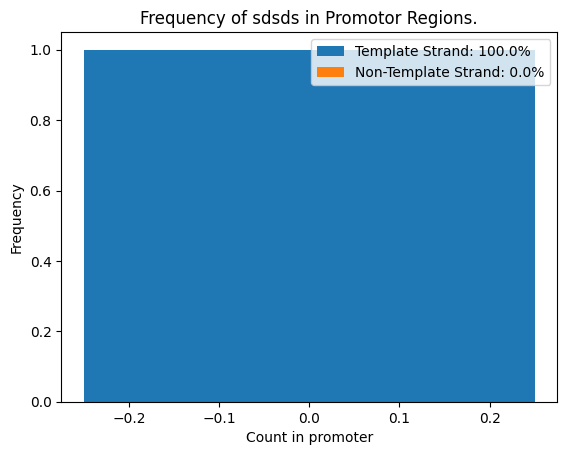

In [124]:
def plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder_path):
    freq, count = np.unique(count_tfbs, return_counts=True)

    # Calculate Percentage of Orientation per Bar
    nT_pct_in_bar = []
    for i in freq:
        nT_freq = nT_percent[count_tfbs==i]
        nT_in_freq = np.sum(nT_freq)/len(nT_freq)
        nT_pct_in_bar.append(nT_in_freq)

    # Caclulate Percentage of Orientation over all Bars
    nT_percent_all = np.sum(nT_percent)/len(nT_percent)
    T_percent_all = np.abs(1-nT_percent_all)

    fig = plt.figure()
    plt.bar(freq, count, label=f"Template Strand: {round(T_percent_all*100, 2)}%", width=0.5)
    plt.bar(freq, nT_pct_in_bar*count, label=f"Non-Template Strand: {round(nT_percent_all*100, 2)}%", width=0.5)
    plt.xlabel("Count in promoter")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title(f"Frequency of {tfbs_name} in Promotor Regions.")
    fig.savefig(f"{output_folder_path}/Barplot_{tfbs_name}_Frequency.png")
    #fig.show()

    

output_folder = "/sybig/home/jme/Bachelorarbeit/Da_Visualisation_TFBS_combinations"
plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder)

## Plot information about all TFBS.
- Iterate over all TFBS and extract count_prom, count_tfbs, nT_percent
    - Plot for every TFBS, the plot_bar_Frequency_for_TFBS
    - Save the count_prom and nt_pct_all to plot all TFBS together in a Bar plot.
    - Save/expand the count_tfbs to plot a pie with overall occurences of multiple TFBS per side.


In [100]:
def get_count_of_all_tfbs(data, tfbs_lst, return_single_plots = False, output_folder=""):
    
    count_all = []
    nT_pct_all = []
    count_freq_all = np.array([])
    for tfbs_name in tfbs_lst:
        # Get count for single tfbs
        count_prom, count_tfbs, nT_percent = get_count_of_single_tfbs(data, tfbs_name)
        # Calculate nt_percent in total for tfbs
        nT_percent_total =  np.sum(nT_percent)/len(nT_percent)
        # Save values for single tfbs in list
        count_all.append(count_prom)
        nT_pct_all.append(nT_percent_total)
        # Save all values of count_tfbs in numpy array
        count_freq_all = np.append(count_freq_all, count_tfbs)
    
        # Plot for every TFBS a Bar chart with additional informations
        if return_single_plots:
            if len(output_folder)>0:
                plot_bar_Frequency_for_TFBS(count_tfbs, nT_percent, tfbs_name, output_folder)
            else:
                raise ValueError("Specify the path to the output folder for the plots.")
    
    return count_all, nT_pct_all, count_freq_all

### Calculating:

In [129]:
from get_TFBS_pair import get_tfbs_subset, get_information_for_singel_tfbs_set

data = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/All_GTEx_Prom_with_TFBS.bed")
tfbs_lst = ['AR', 'ARNT', 'ARNTL', 'ASCL1', 'ATF2', 'ATF3', 'ATF4', 'ATF7', 'BACH1', 'BACH2', 'BATF', 'BATF3', 'BCL6', 'BCL6B', 'BHLHE22', 'BHLHE40', 'CDX2', 'CEBPA', 'CEBPB', 'CEBPD', 'CEBPG', 'CLOCK', 'CREB1', 'CREM', 'CTCF', 'CTCFL', 'CUX1', 'DUX4', 'E2F1', 'E2F4', 'E2F6', 'E2F7', 'E2F8', 'EBF1', 'EBF3', 'EGR1', 'EGR2', 'EGR3', 'EHF', 'ELF1', 'ELF3', 'ELF4', 'ELF5', 'ELK1', 'ELK4', 'EOMES', 'ERF', 'ERG', 'ESR1', 'ESR2', 'ESRRA', 'ETS1', 'ETV1', 'ETV4', 'ETV5', 'ETV6', 'FLI1', 'FOS', 'FOSL1', 'FOSL2', 'FOXA1', 'FOXA2', 'FOXA3', 'FOXJ2', 'FOXK1', 'FOXK2', 'FOXO1', 'FOXP1', 'GABPA', 'GATA1', 'GATA2', 'GATA3', 'GATA4', 'GATA6', 'GFI1', 'GFI1B', 'GLIS1', 'GLIS2', 'GLIS3', 'GRHL2', 'HAND2', 'HIC1', 'HIF1A', 'HINFP', 'HLF', 'HMBOX1', 'HNF1A', 'HNF1B', 'HNF4A', 'HNF4G', 'HOXA9', 'HOXB13', 'HSF1', 'HSF2', 'IRF1', 'IRF2', 'IRF3', 'IRF4', 'ISL1', 'JUN', 'JUNB', 'JUND', 'KLF1', 'KLF11', 'KLF12', 'KLF15', 'KLF16', 'KLF4', 'KLF5', 'KLF9', 'LEF1', 'LHX2', 'LHX9', 'MAF', 'MAFB', 'MAFF', 'MAFK', 'MAX', 'MECOM', 'MEF2A', 'MEF2B', 'MEF2C', 'MEF2D', 'MEIS1', 'MEIS2', 'MGA', 'MITF', 'MLX', 'MNT', 'MXI1', 'MYB', 'MYBL2', 'MYC', 'MYCN', 'MYF5', 'MYOD1', 'MYOG', 'NEUROD1', 'NEUROG2', 'NFE2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIC', 'NFIL3', 'NFKB1', 'NFKB2', 'NFYA', 'NFYB', 'NFYC', 'NKX2-5', 'NKX3-1', 'NR1H2', 'NR1H3', 'NR1H4', 'NR2C1', 'NR2C2', 'NR2F1', 'NR2F2', 'NR2F6', 'NR3C1', 'NR4A1', 'NR5A1', 'NR5A2', 'NRF1', 'OCT4', 'ONECUT1', 'ONECUT2', 'OSR2', 'OTX2', 'PAX5', 'PAX6', 'PBX1', 'PBX2', 'PBX3', 'PDX1', 'PHOX2B', 'PKNOX1', 'PLAG1', 'POU2F1', 'POU2F2', 'POU5F1', 'PPARG', 'PRDM1', 'PRDM4', 'RARA', 'RARG', 'RBPJ', 'REL', 'RELA', 'RELB', 'REST', 'RFX1', 'RFX2', 'RFX3', 'RFX5', 'RUNX1', 'RUNX2', 'RUNX3', 'RXRA', 'RXRB', 'SCRT1', 'SCRT2', 'SIX1', 'SIX2', 'SMAD2', 'SMAD3', 'SMAD4', 'SNAI2', 'SOX10', 'SOX13', 'SOX17', 'SOX2', 'SOX4', 'SOX6', 'SOX9', 'SP1', 'SP2', 'SP3', 'SP4', 'SPDEF', 'SPI1', 'SPIB', 'SREBF1', 'SRF', 'STAT1', 'STAT2', 'STAT3', 'STAT4', 'STAT5A', 'STAT5B', 'STAT6', 'T', 'TAL1', 'TBX21', 'TBX5', 'TCF12', 'TCF3', 'TCF4', 'TCF7', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TEAD3', 'TEAD4', 'TFAP2A', 'TFAP2C', 'TFAP4', 'TFDP1', 'TFE3', 'TFEB', 'THAP11', 'THRB', 'TP53', 'TP63', 'TP73', 'TWIST1', 'USF1', 'USF2', 'VDR', 'WT1', 'XBP1', 'YY1', 'YY2', 'ZFX', 'ZNF143', 'ZNF263', 'ZNF740']
#tfbs_lst = ["SMAD3", "ATF2"]
output_folder = "/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Visualisation of TFBS/Single_TFBS/Barplots_Frequency_and_Orientation"

/tmp/ipykernel_3779352/4247057778.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


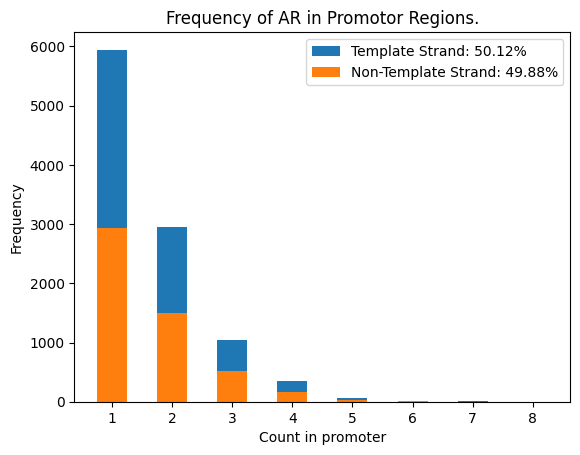

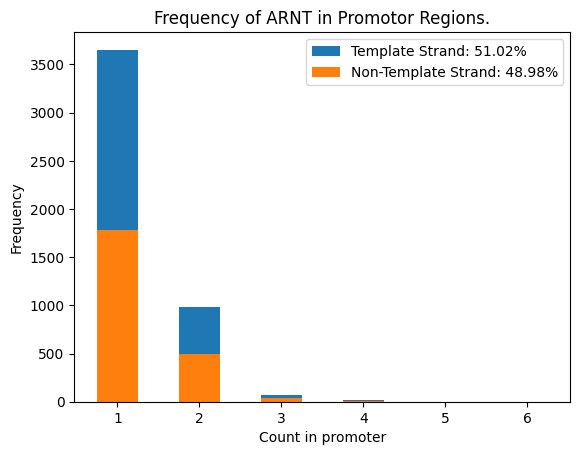

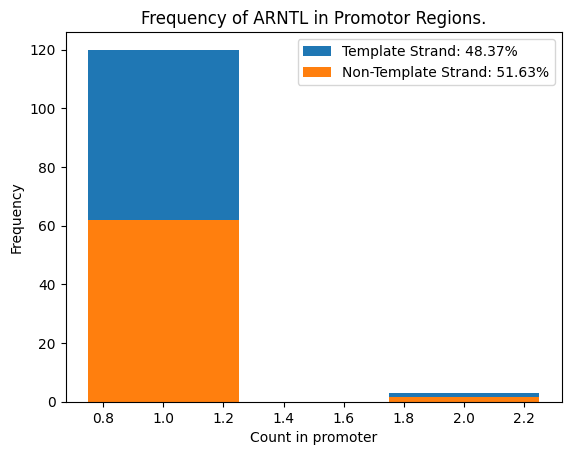

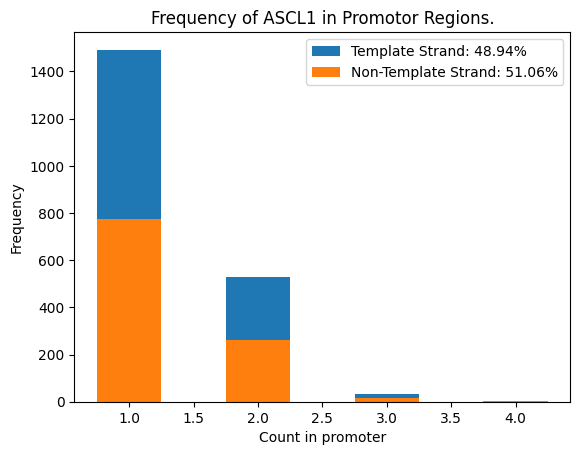

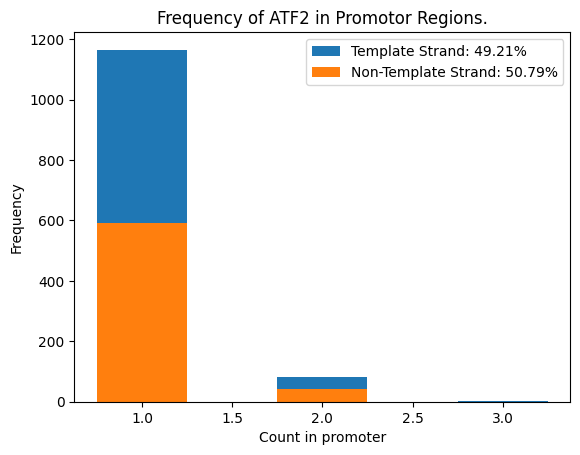

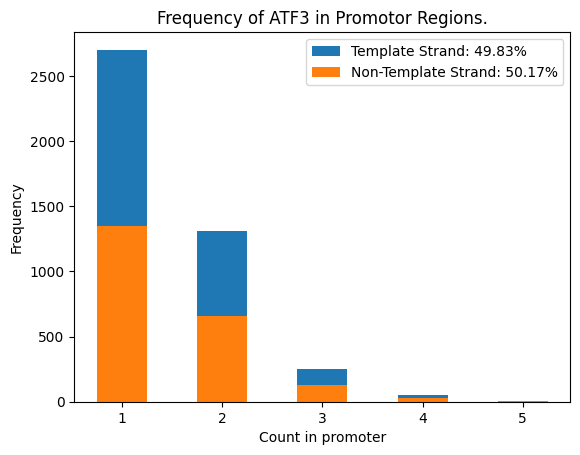

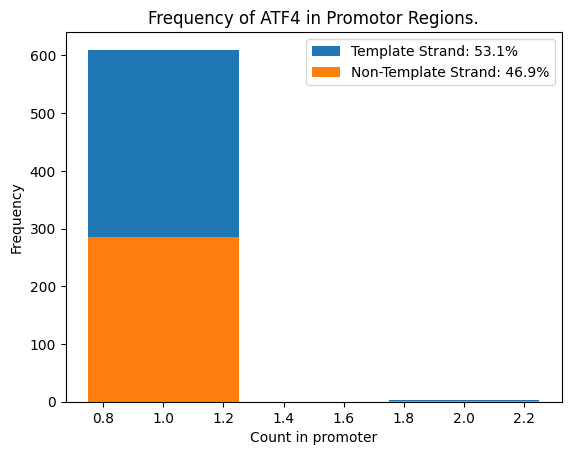

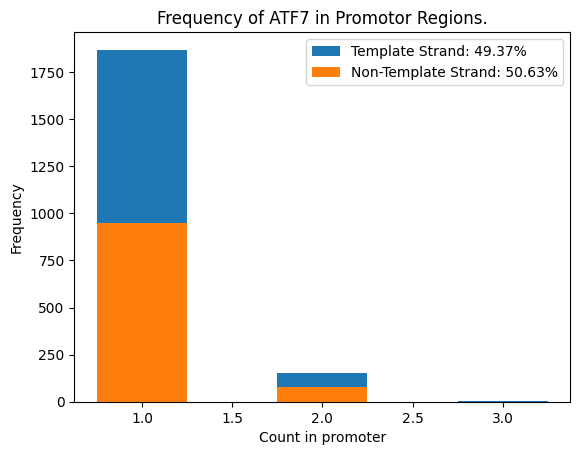

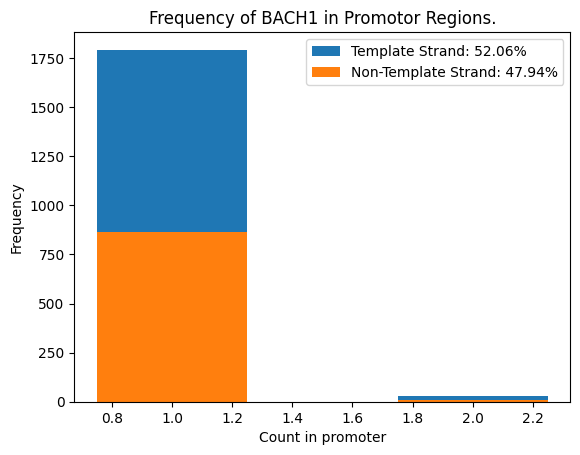

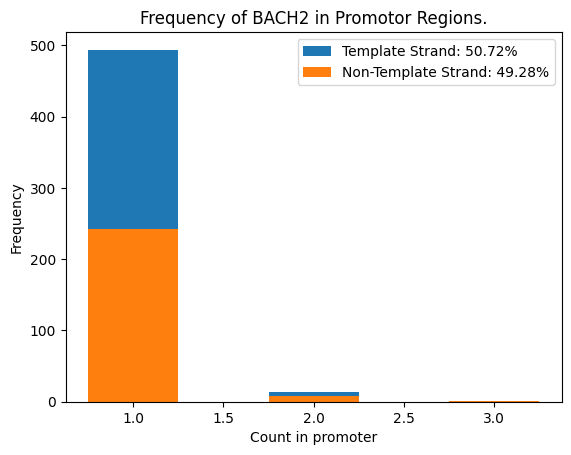

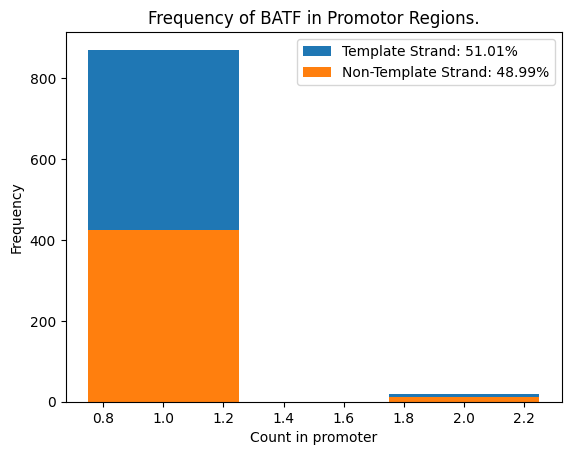

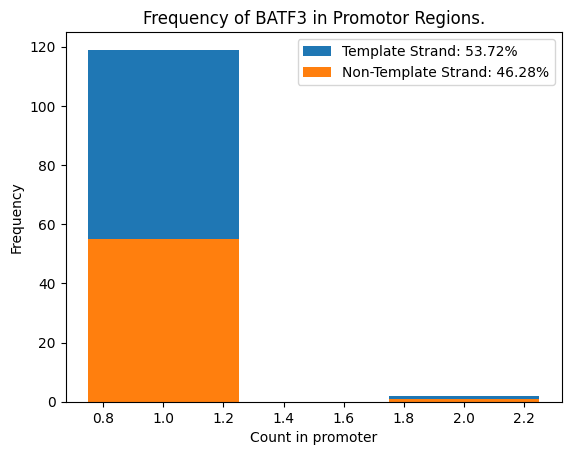

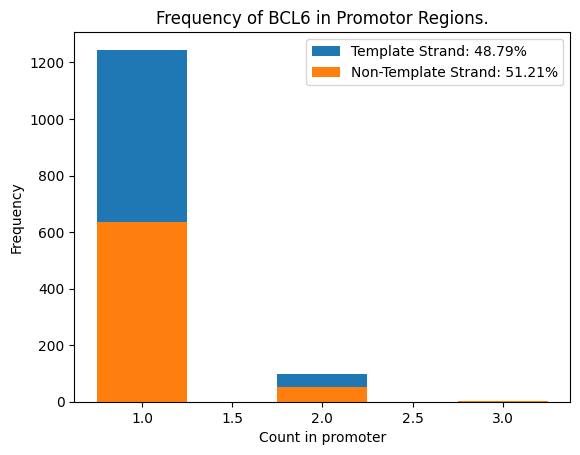

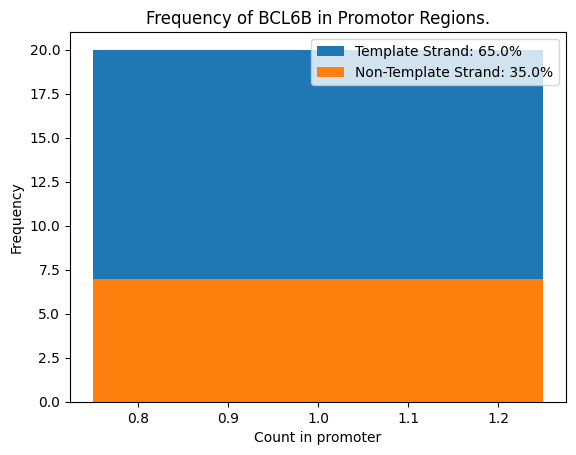

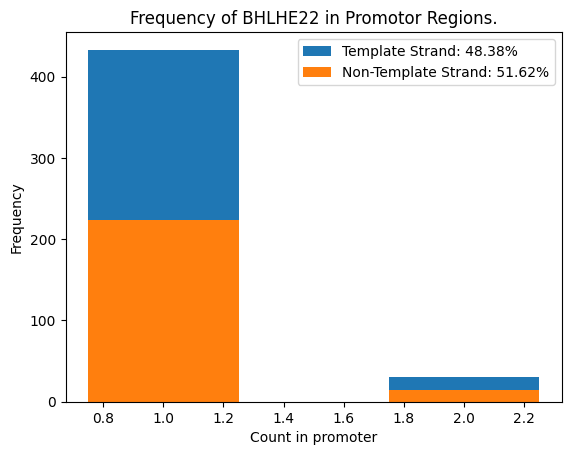

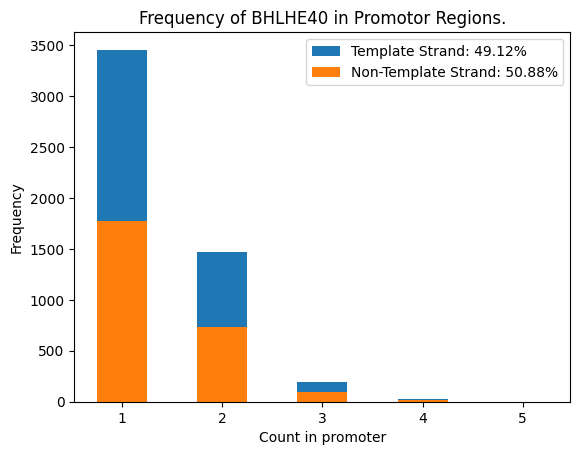

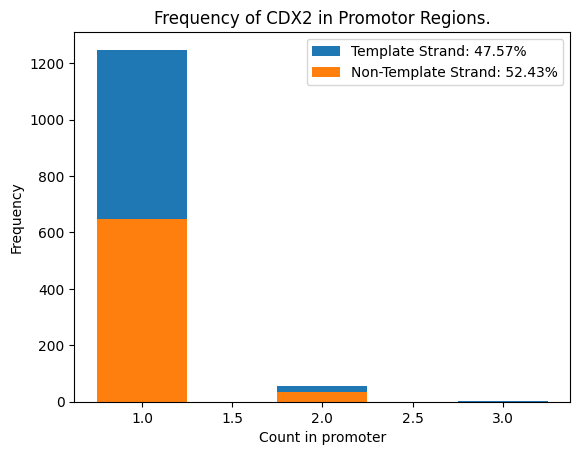

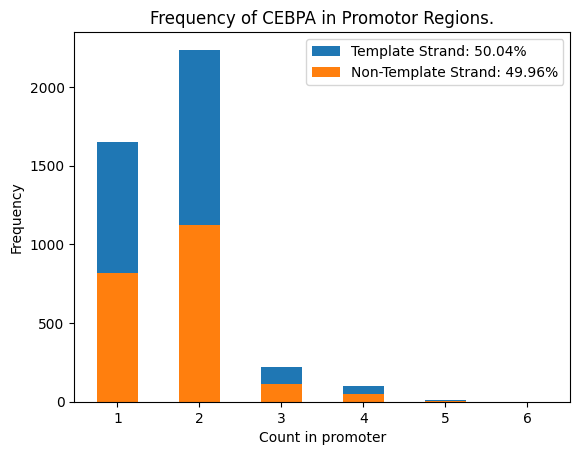

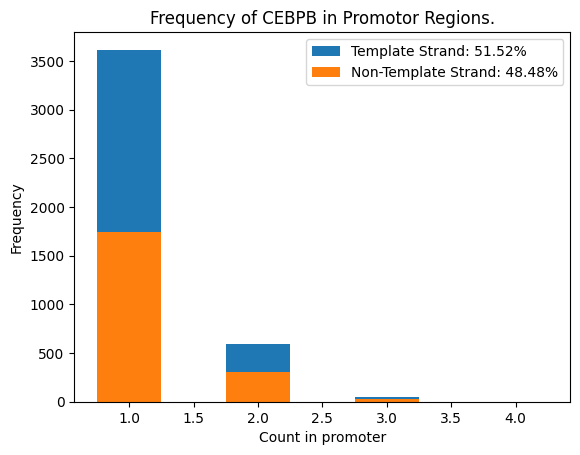

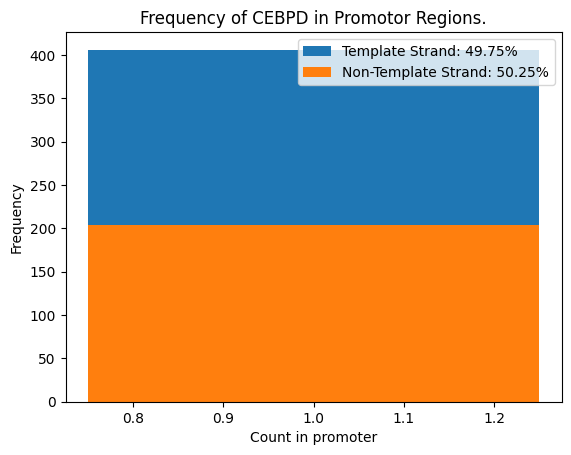

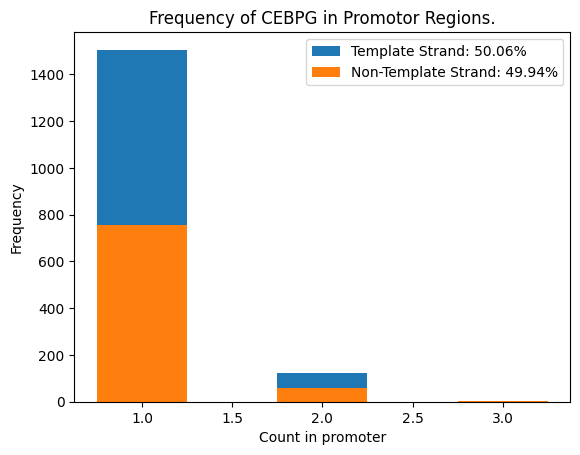

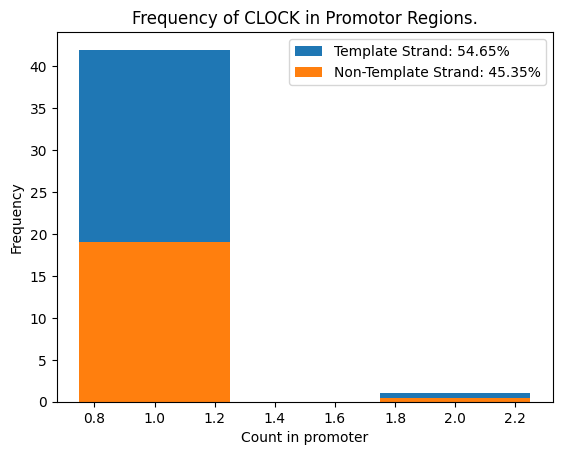

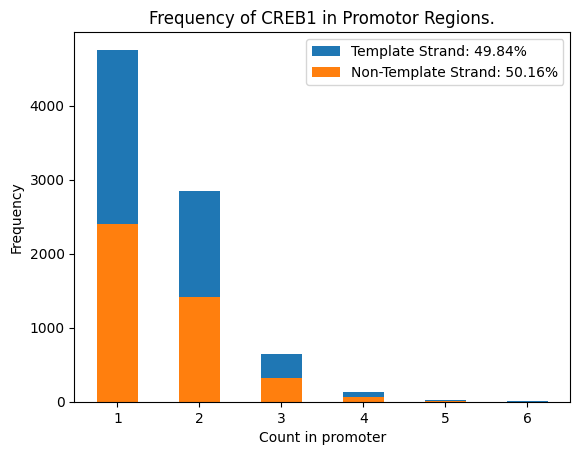

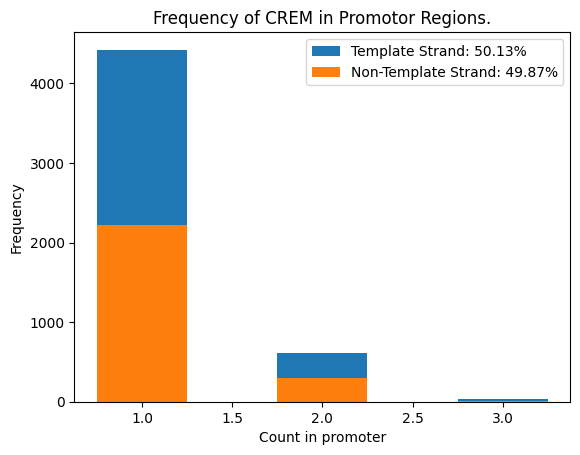

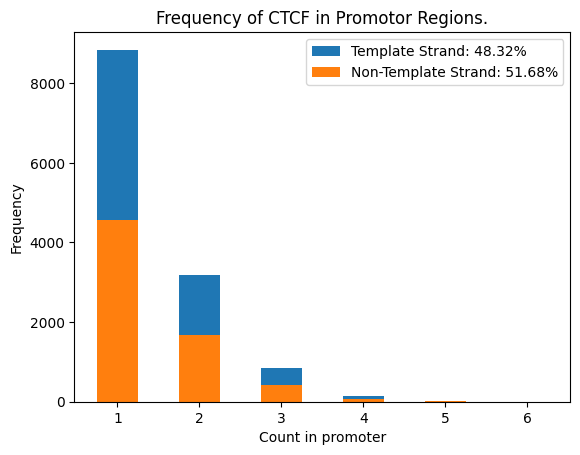

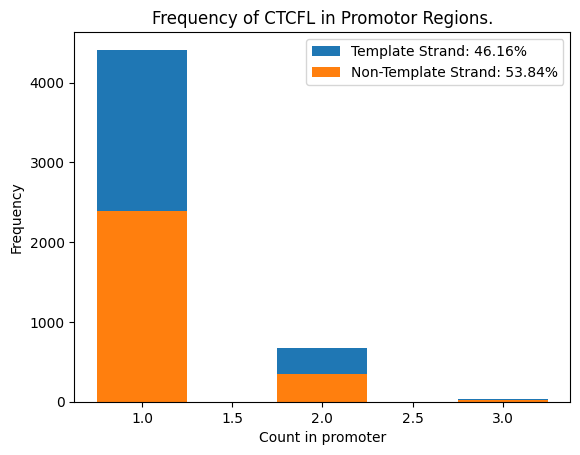

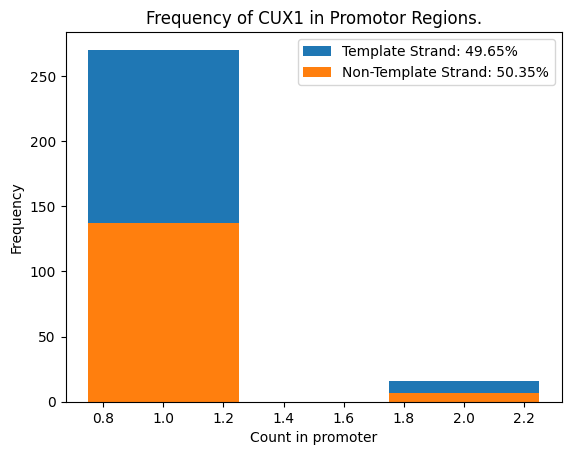

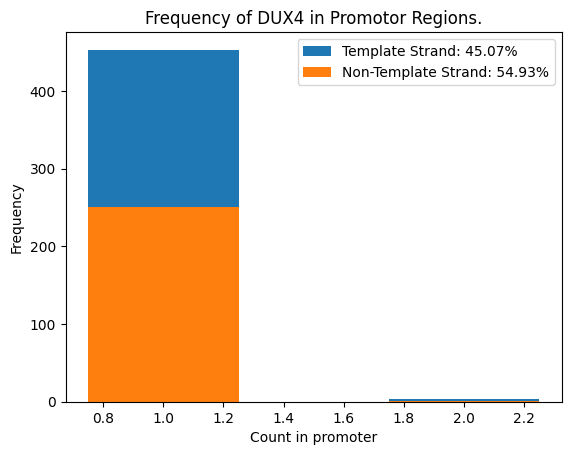

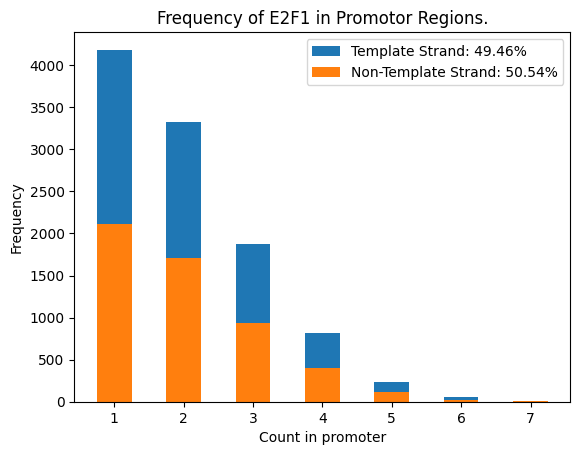

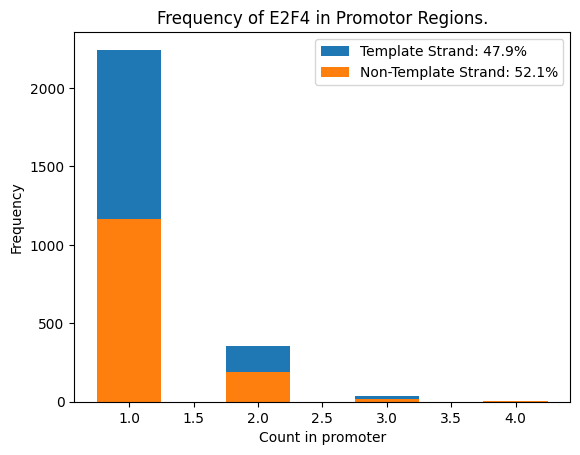

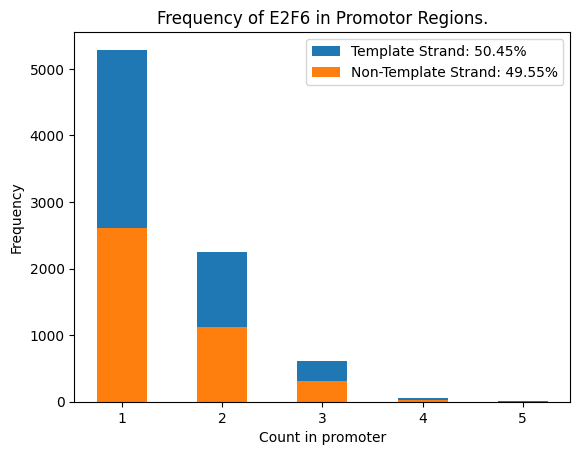

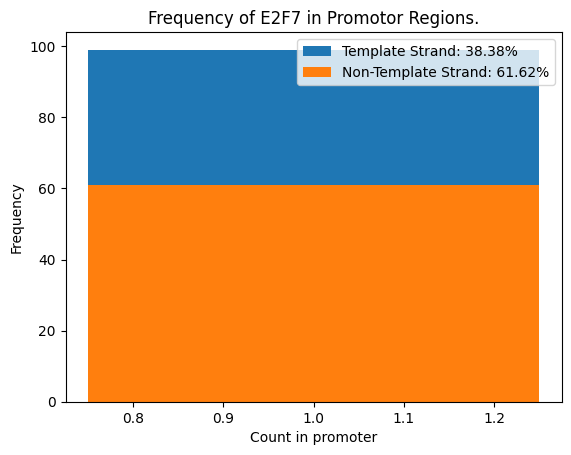

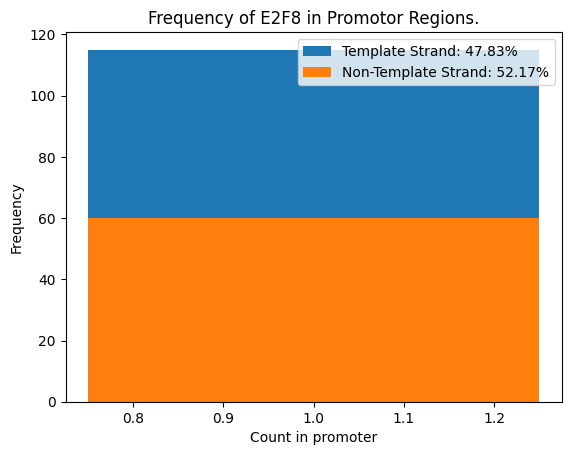

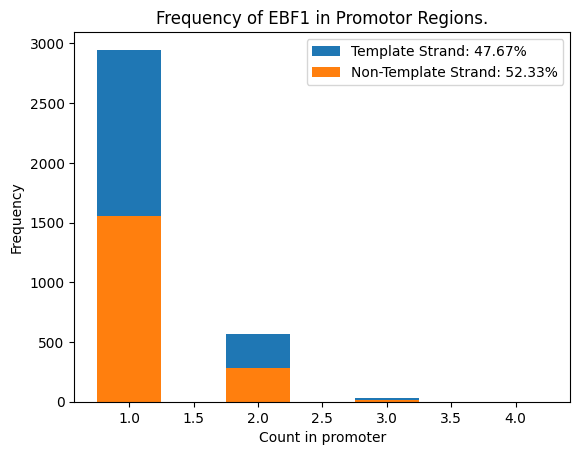

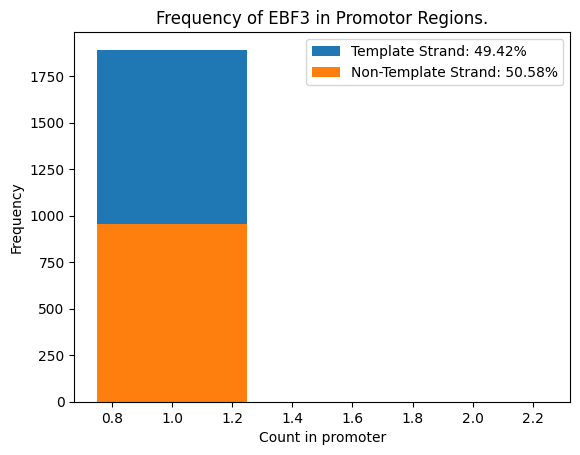

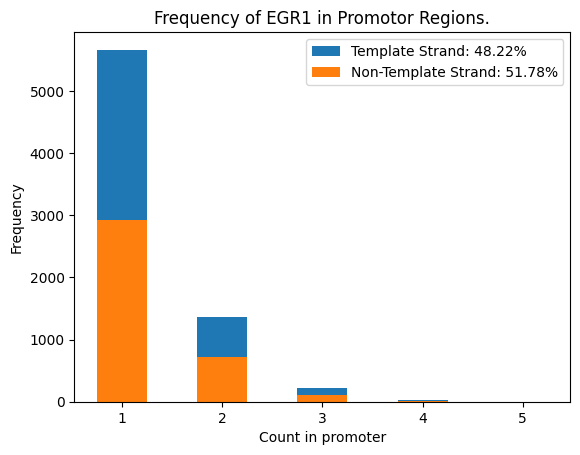

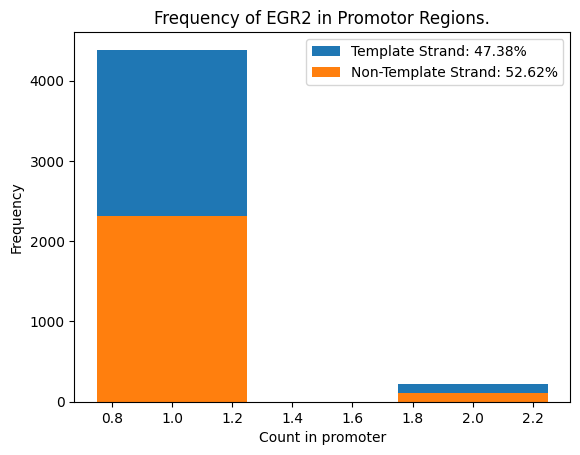

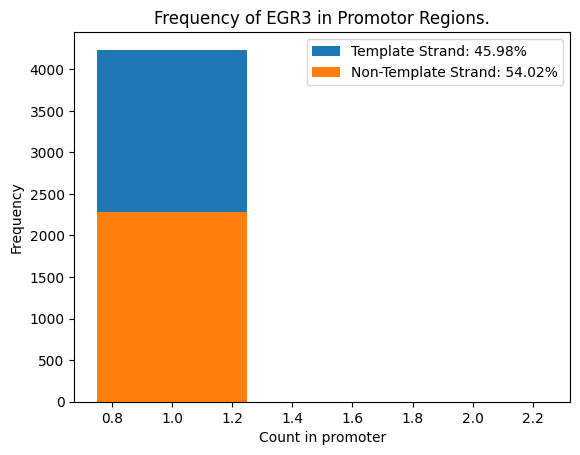

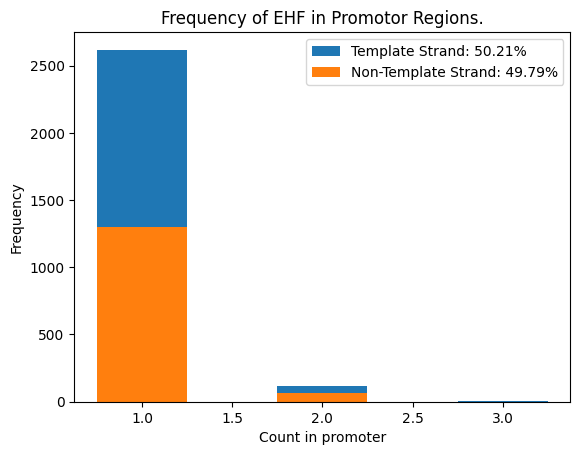

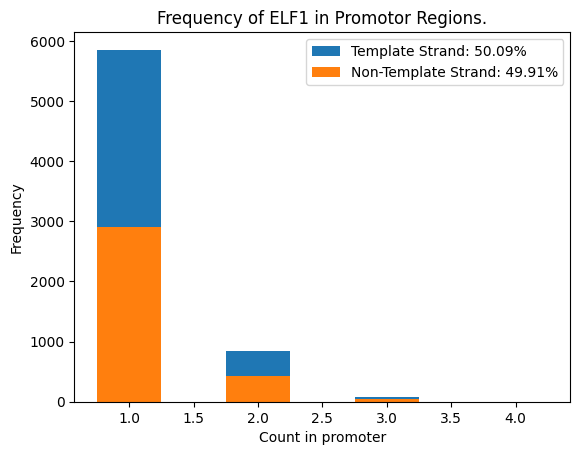

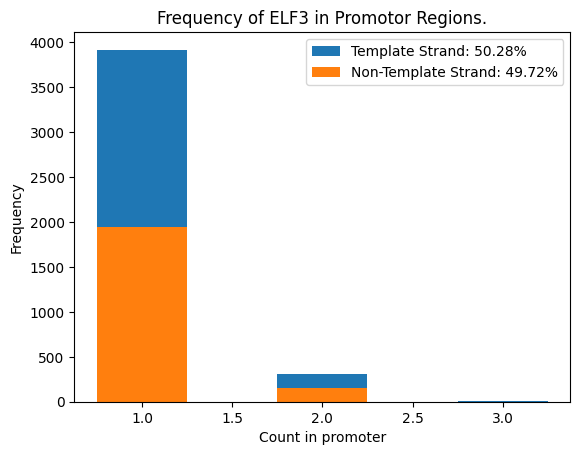

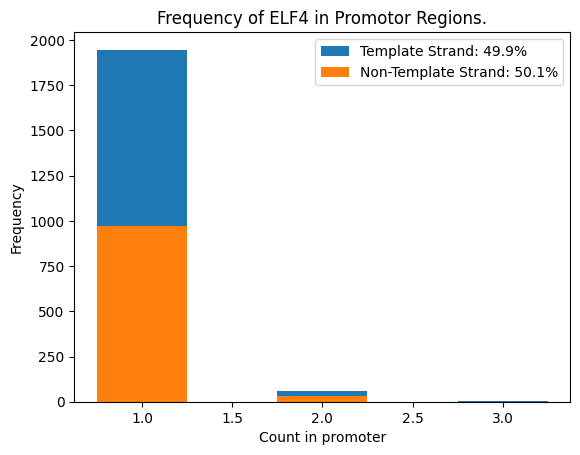

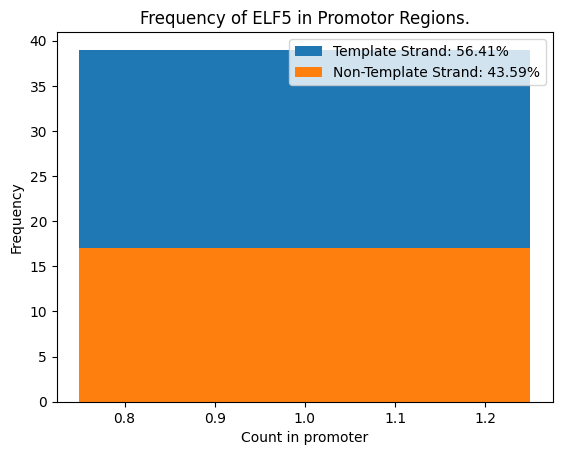

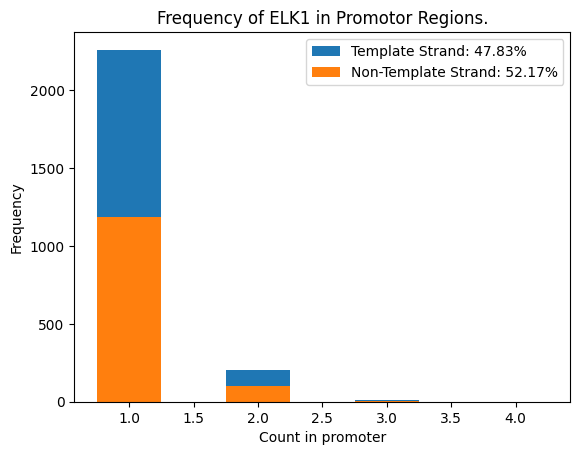

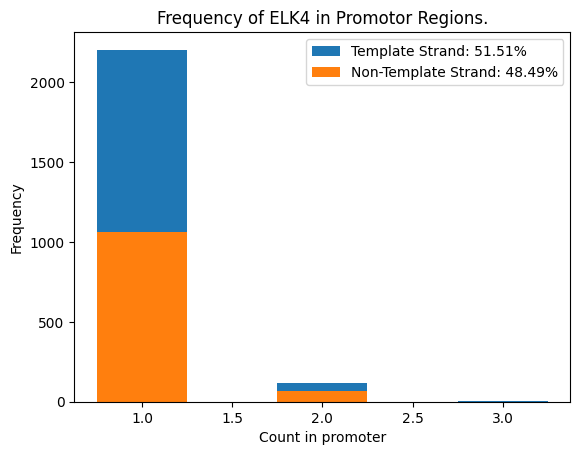

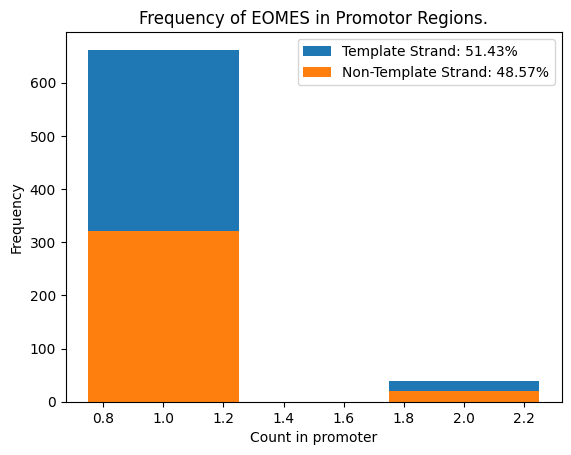

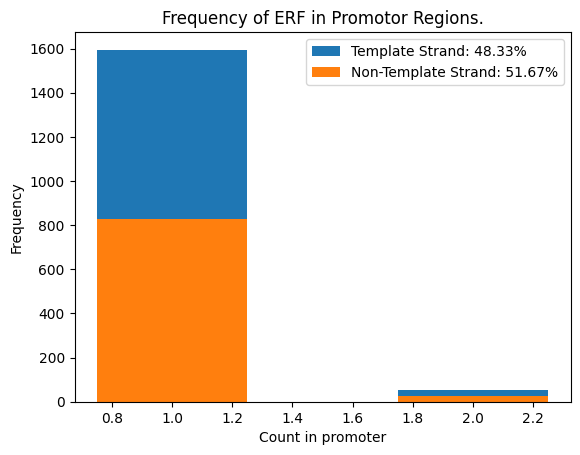

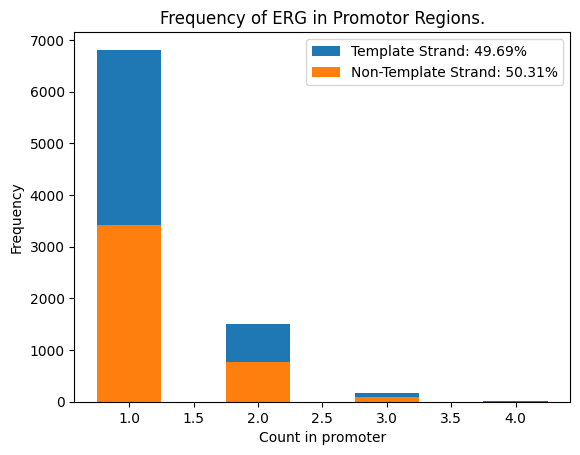

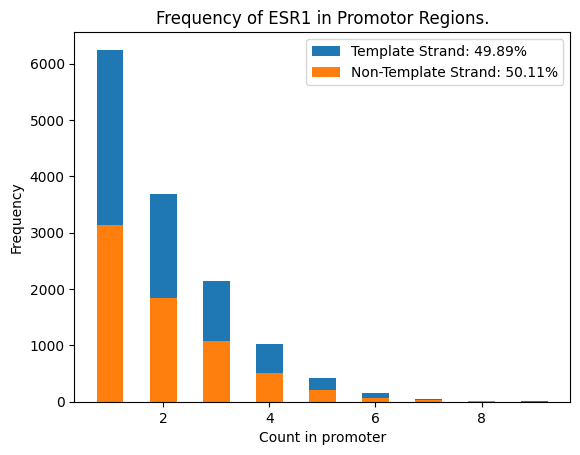

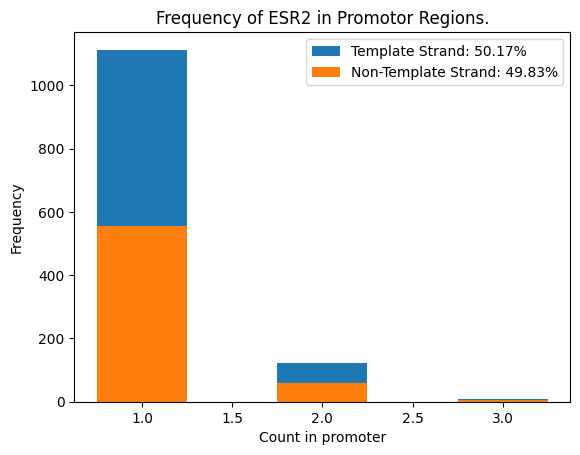

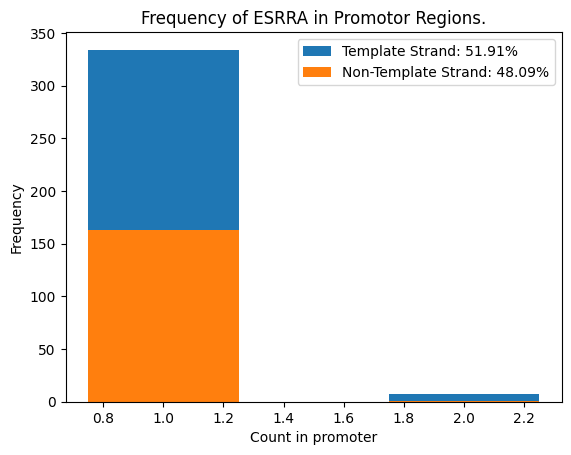

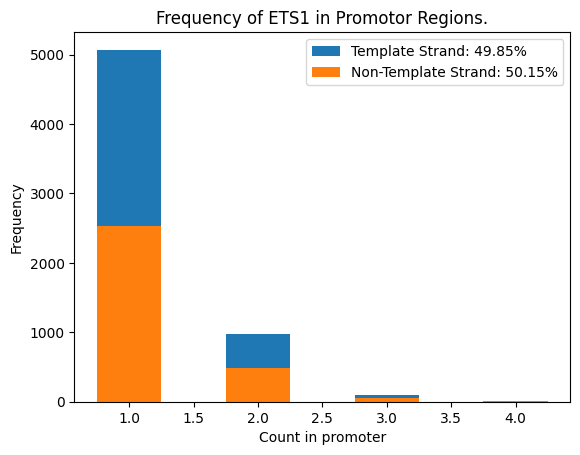

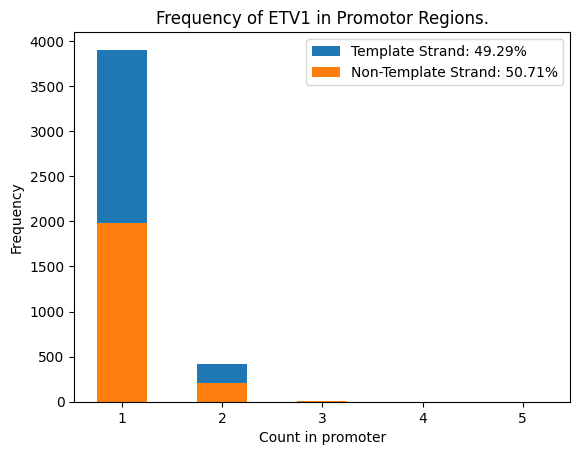

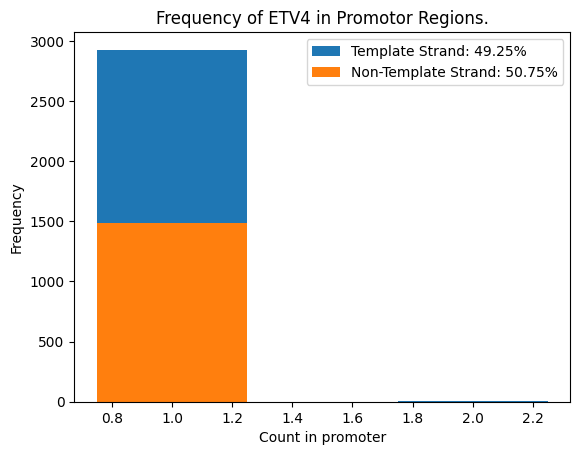

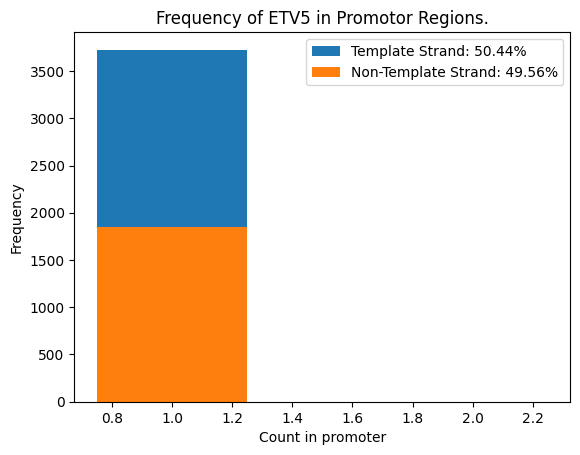

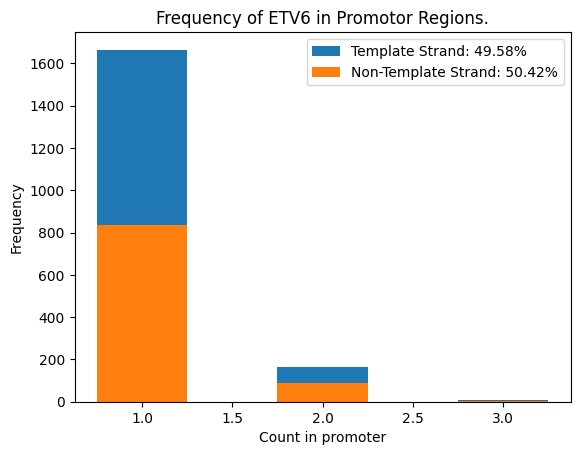

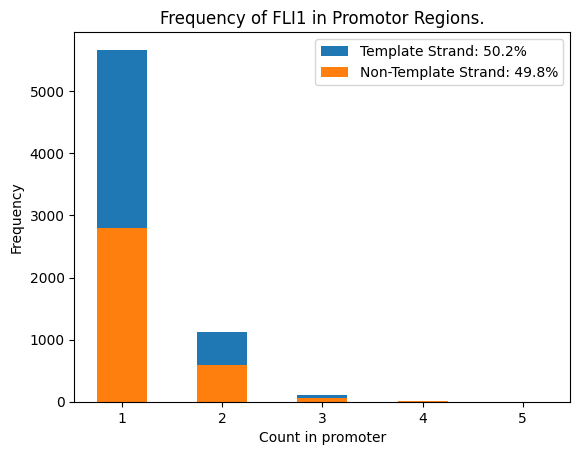

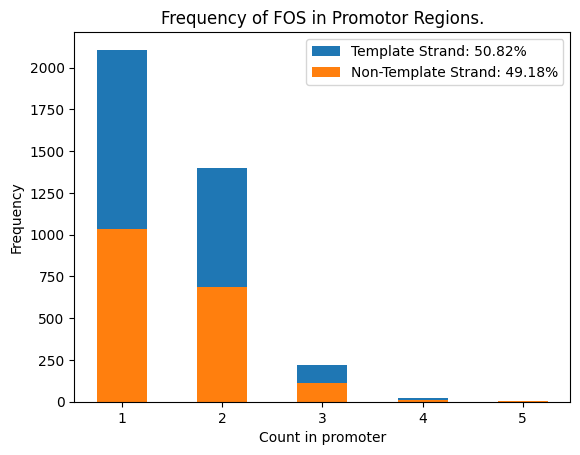

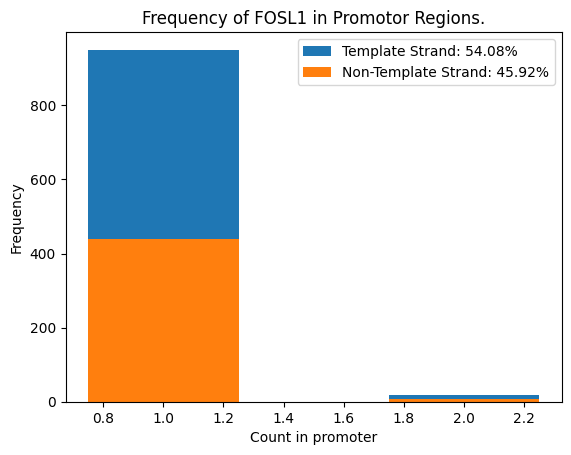

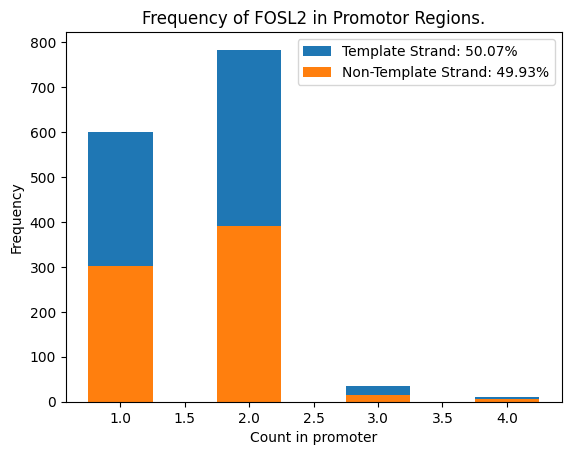

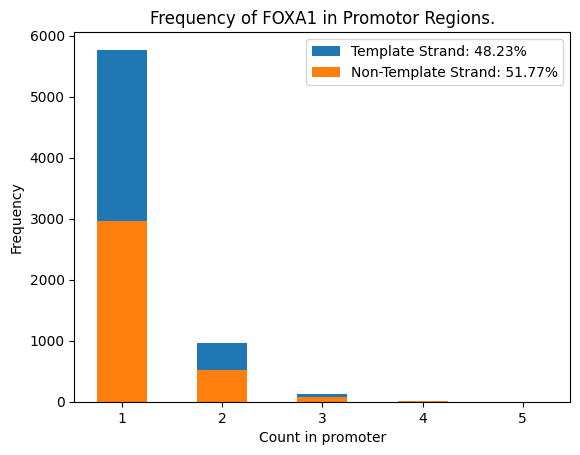

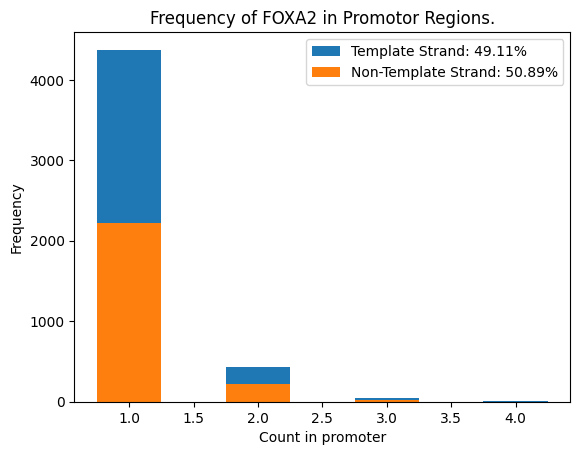

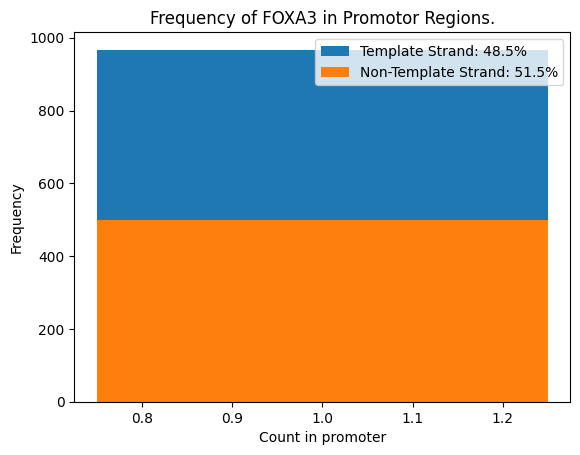

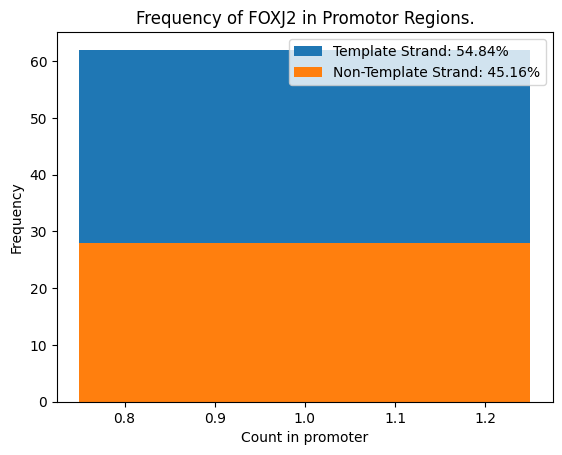

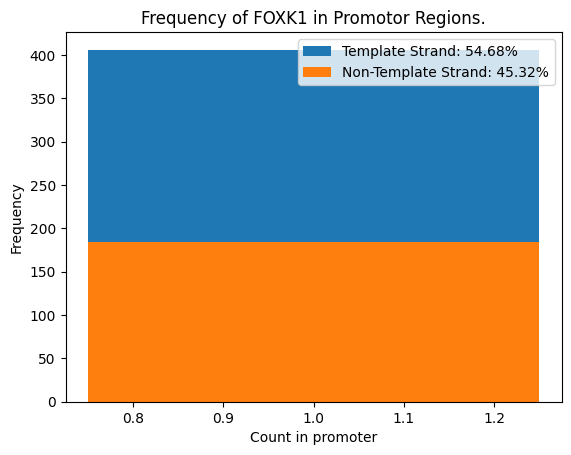

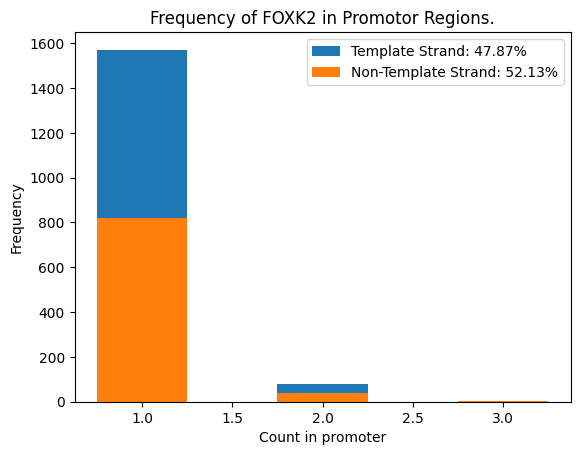

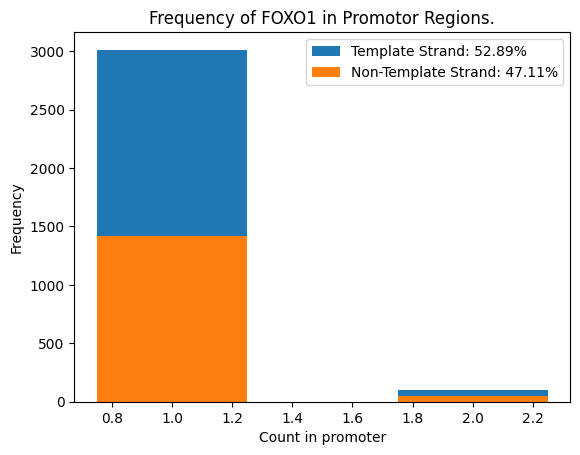

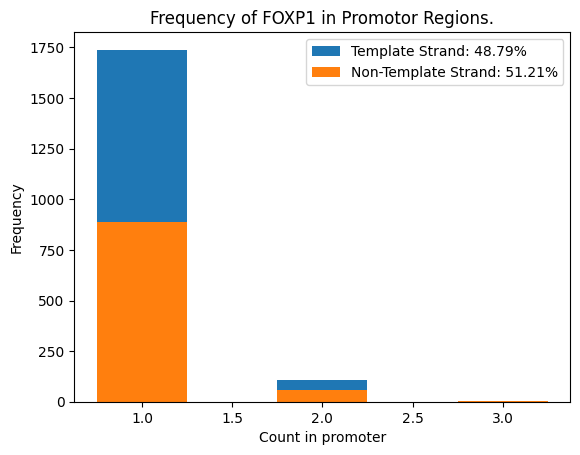

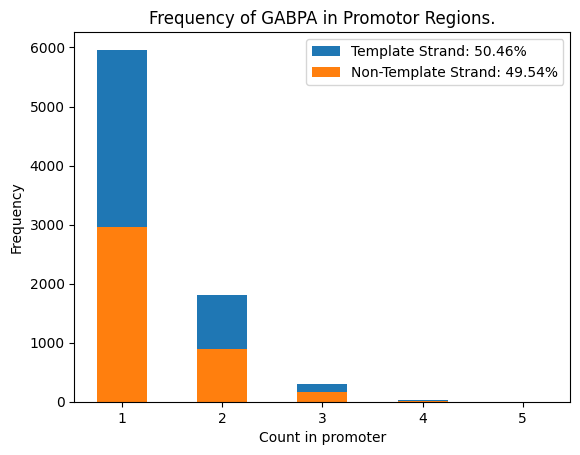

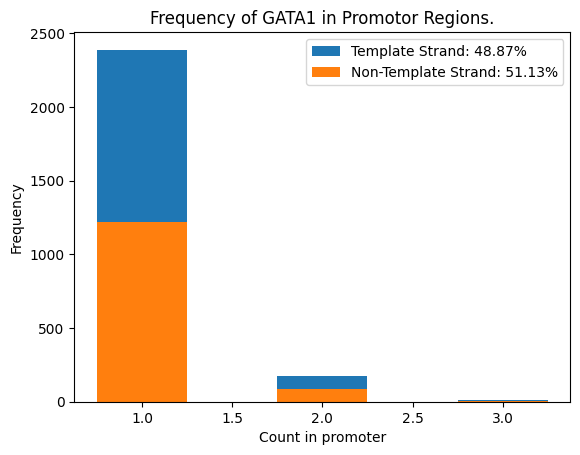

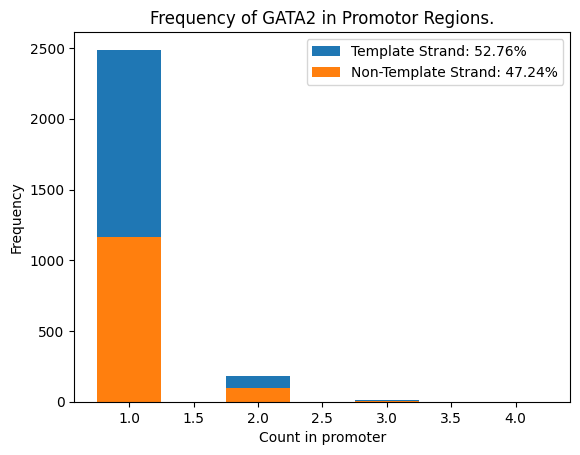

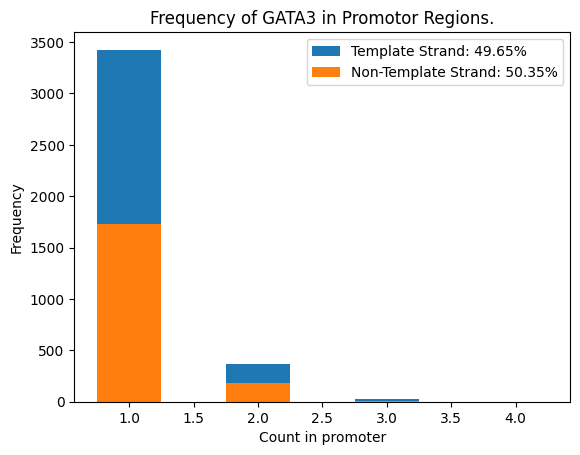

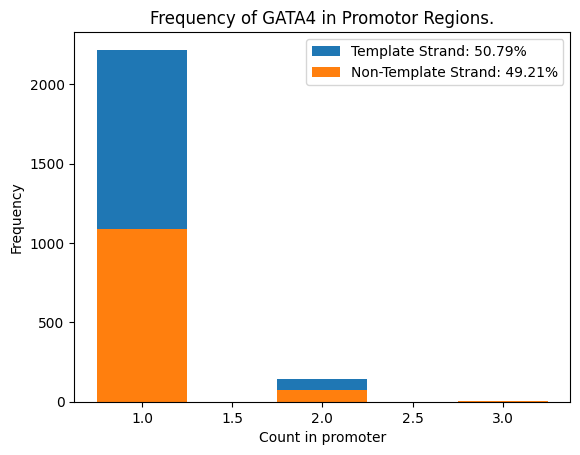

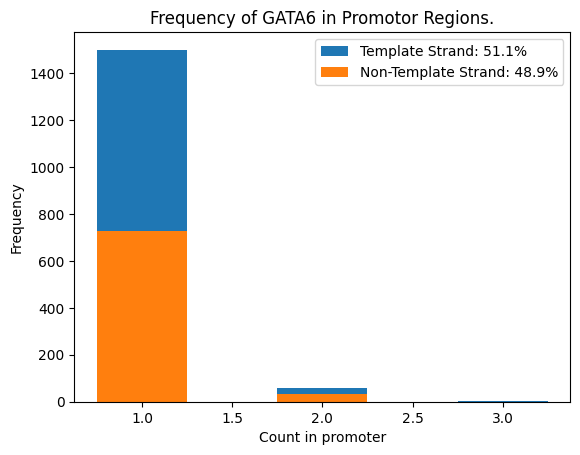

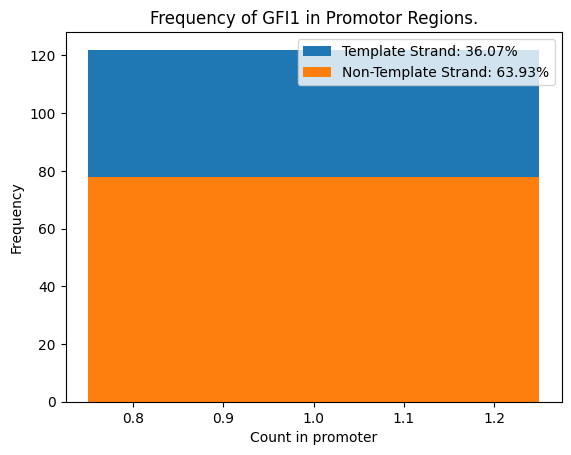

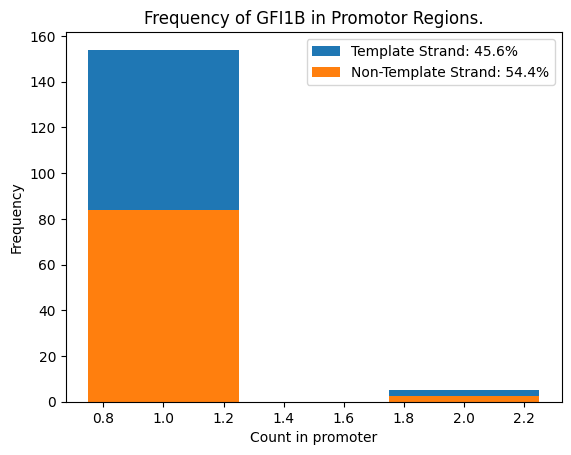

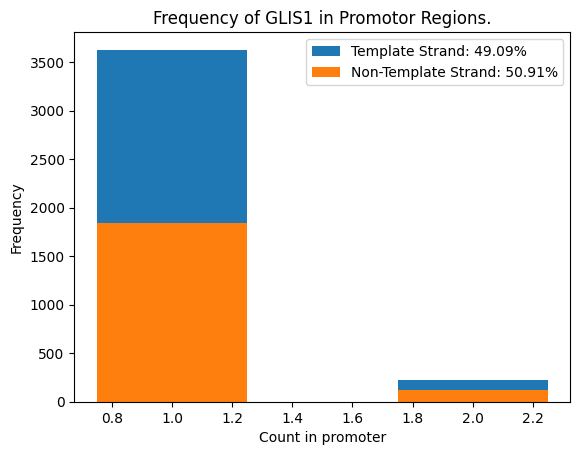

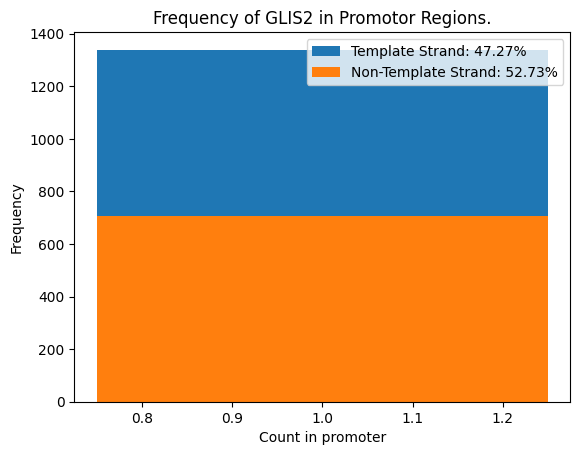

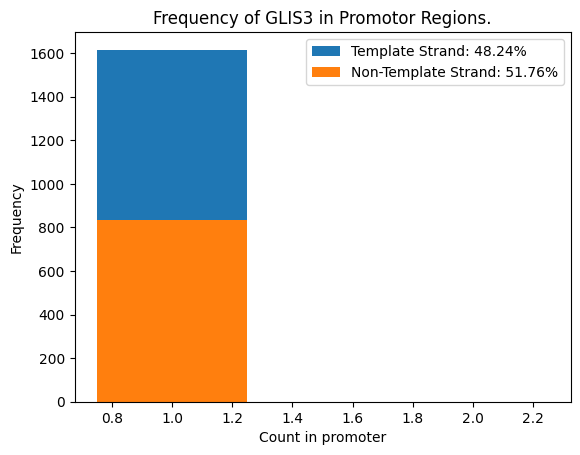

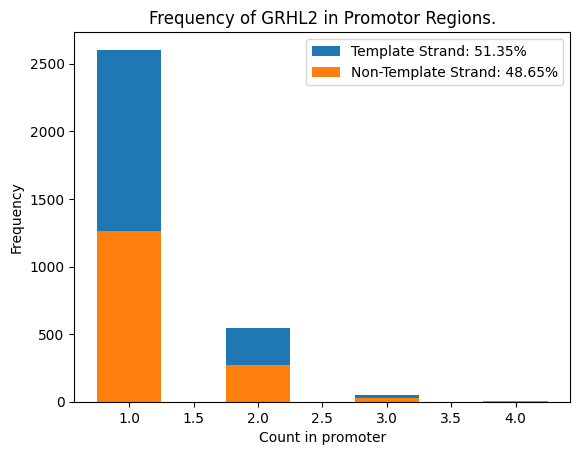

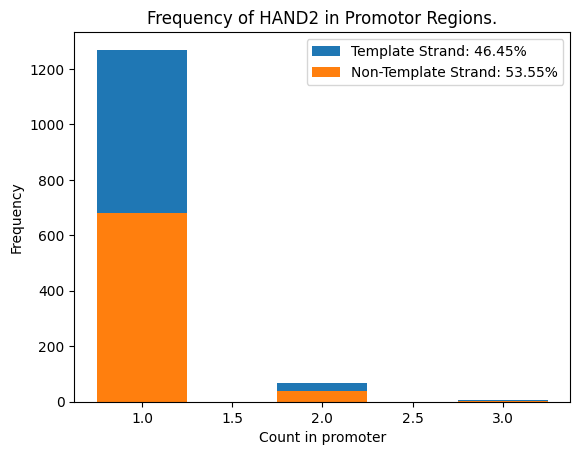

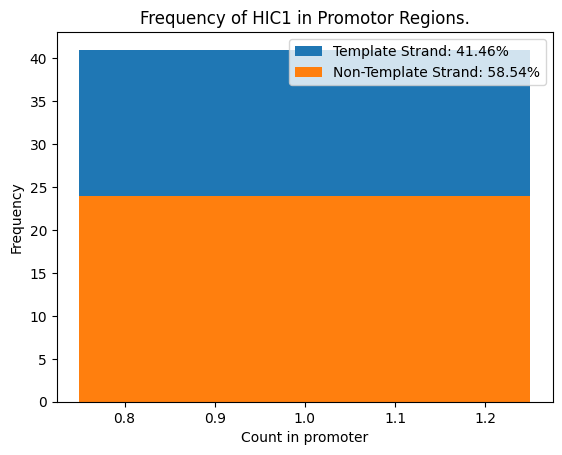

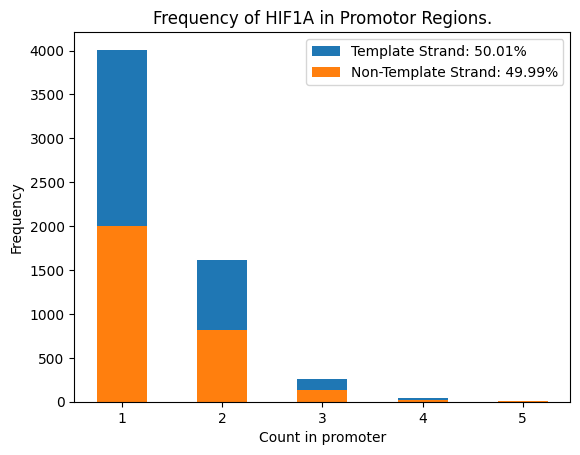

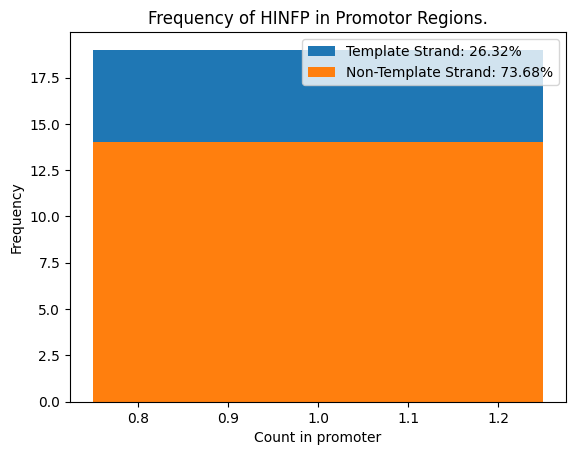

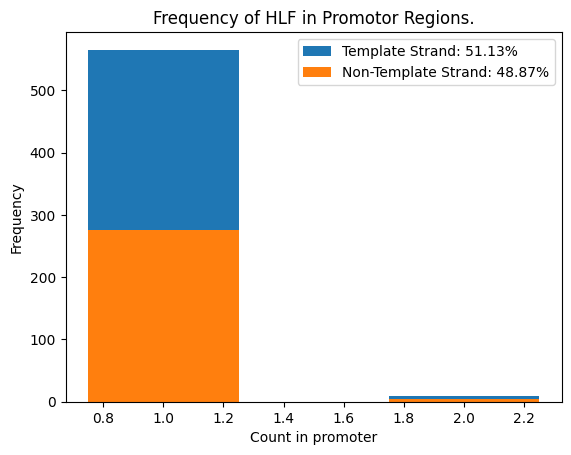

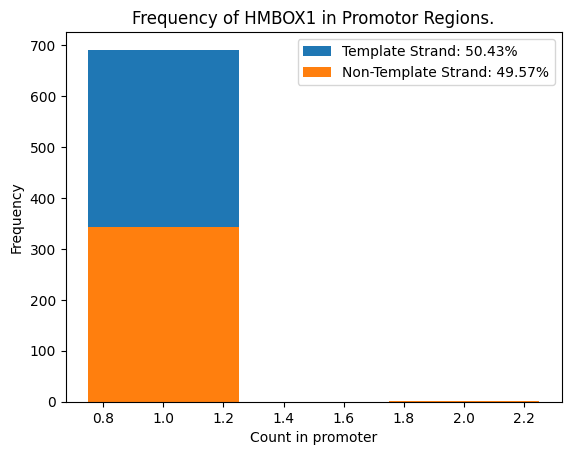

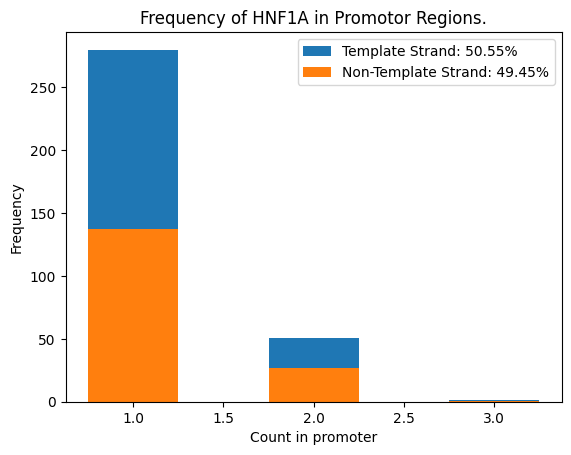

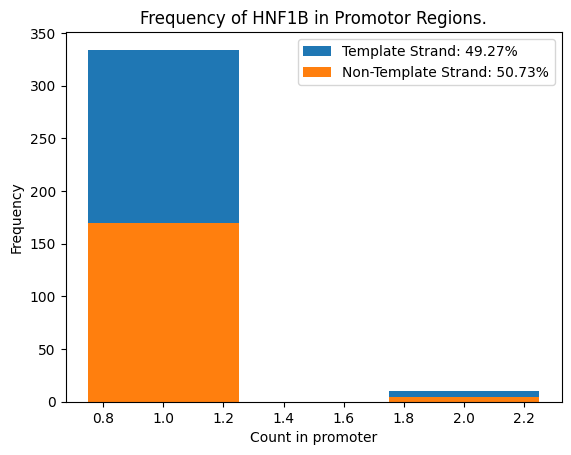

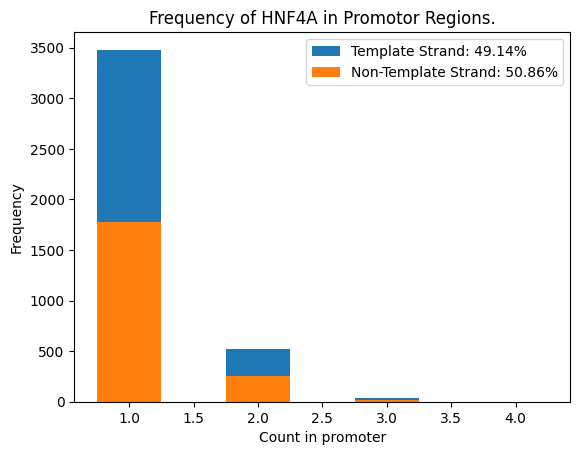

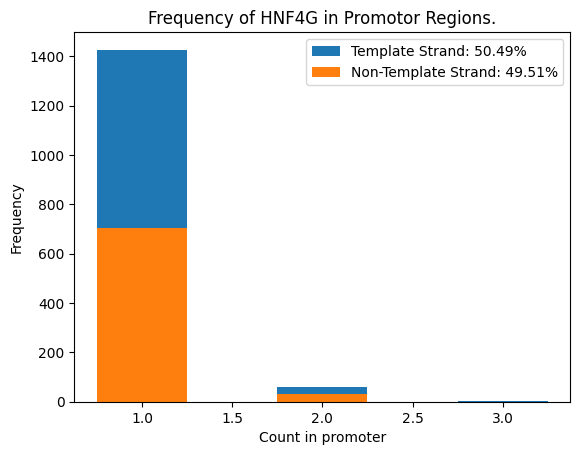

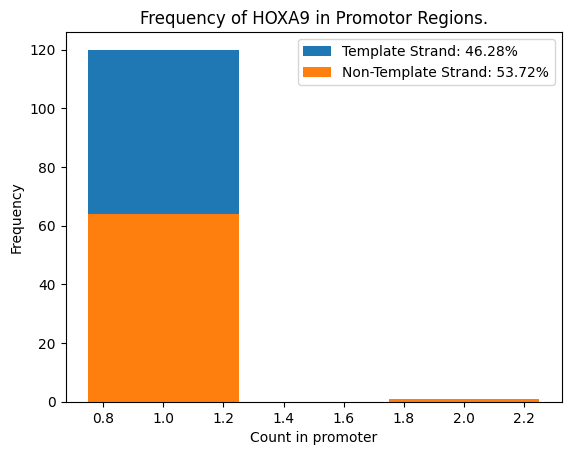

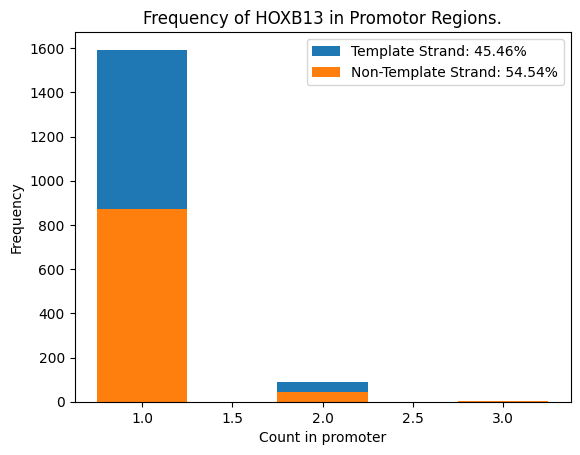

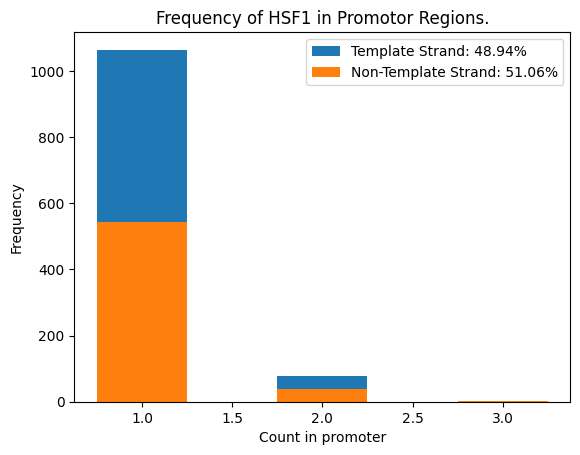

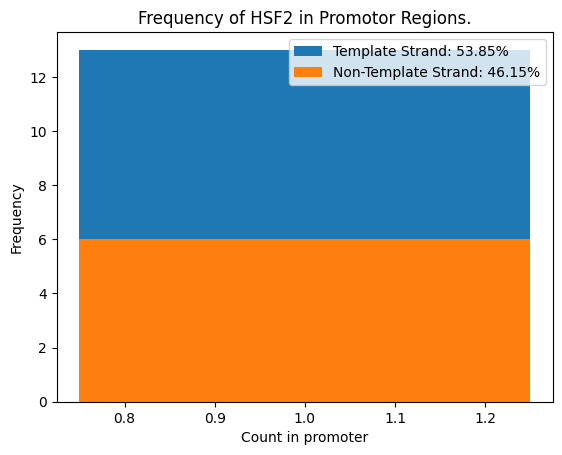

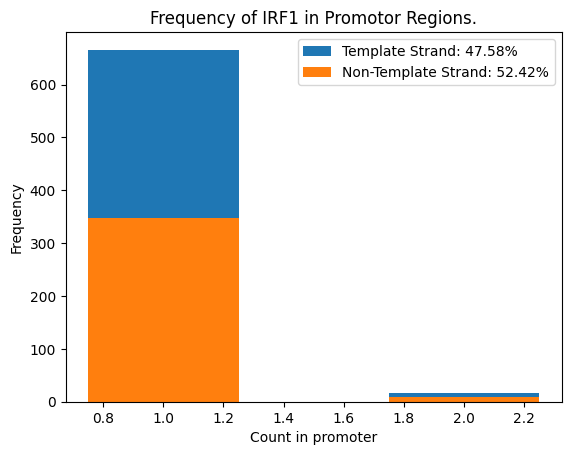

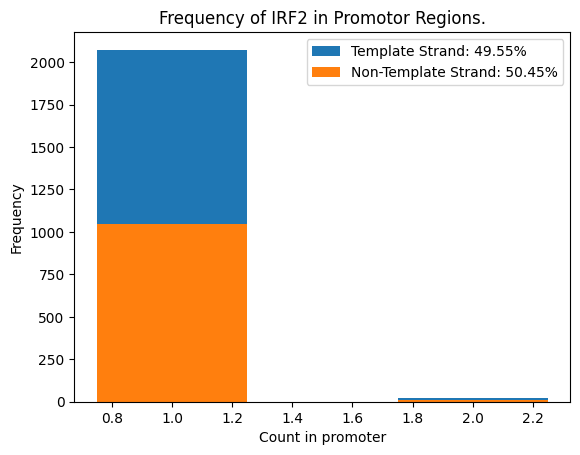

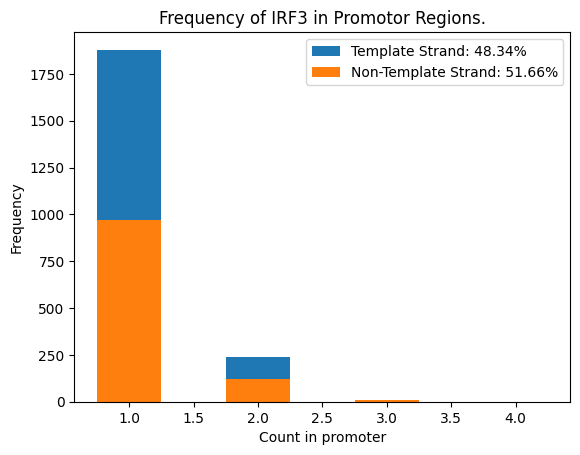

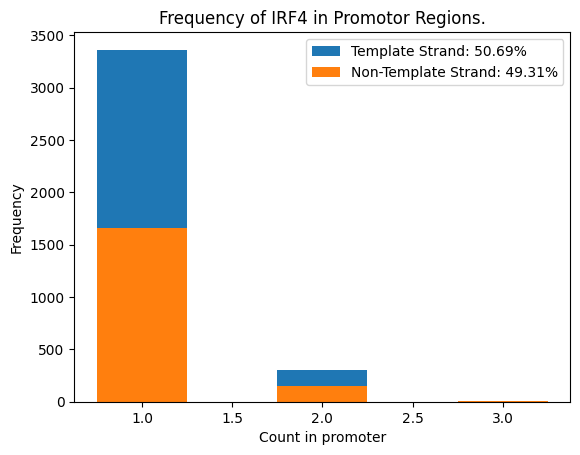

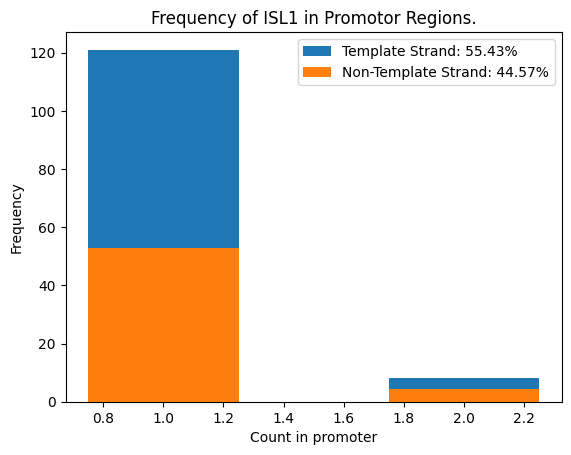

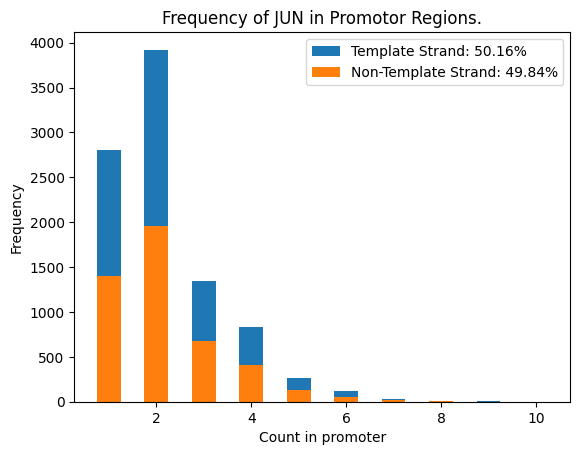

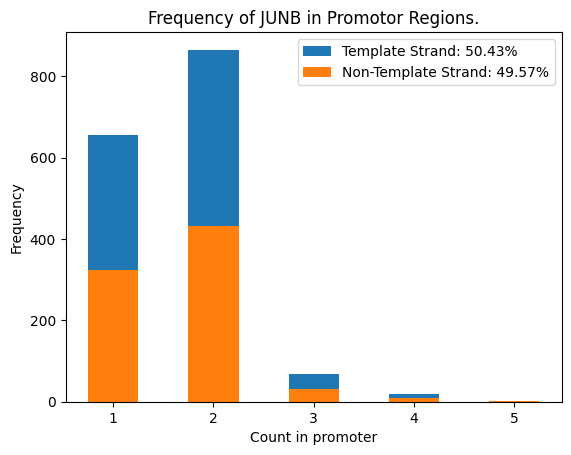

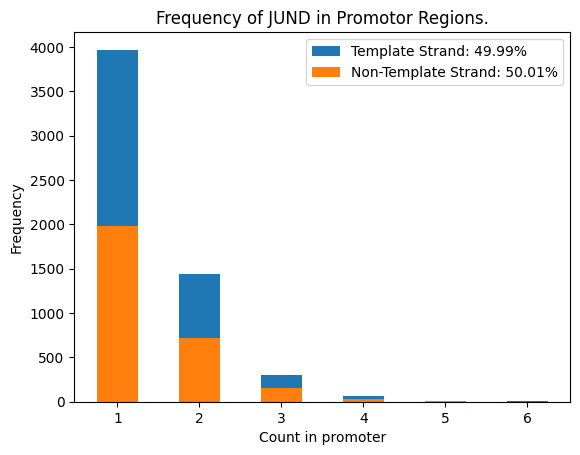

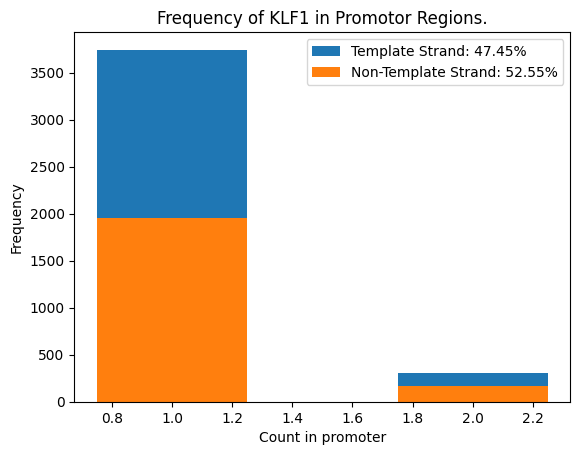

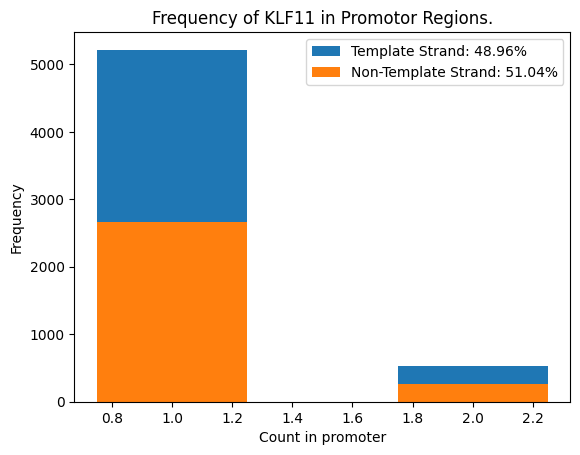

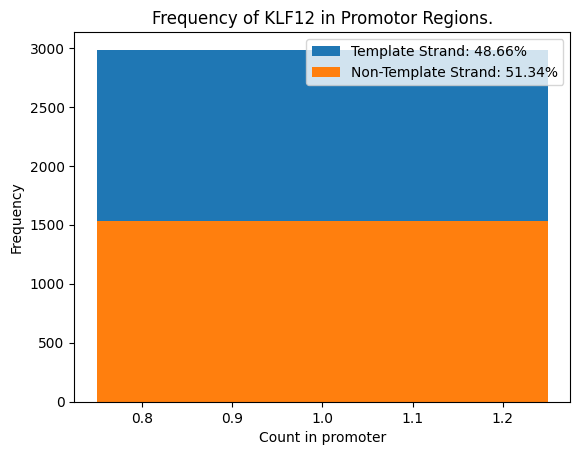

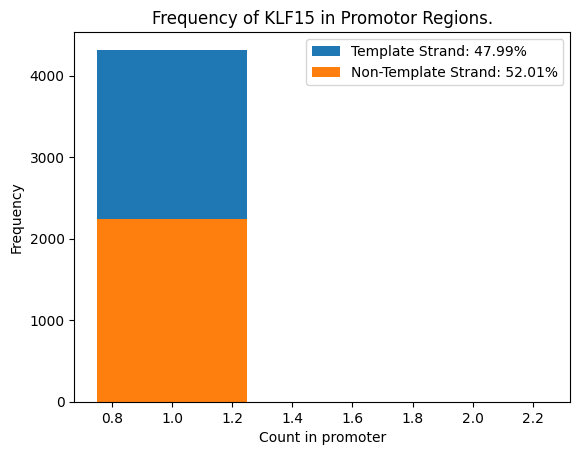

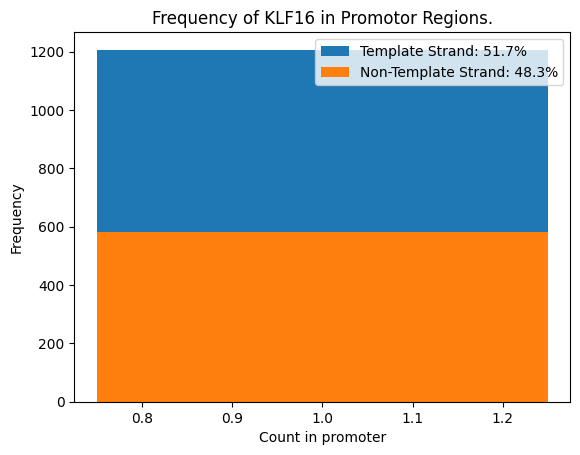

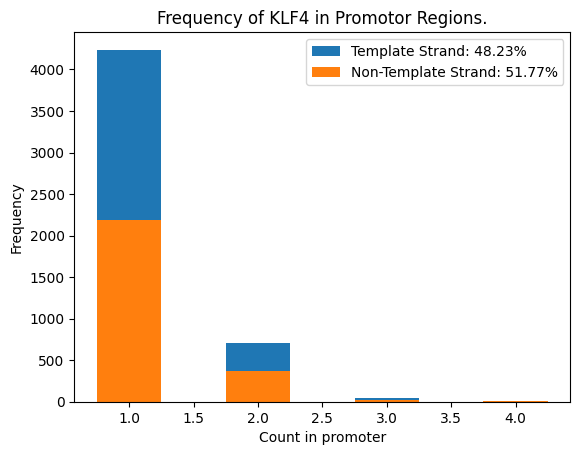

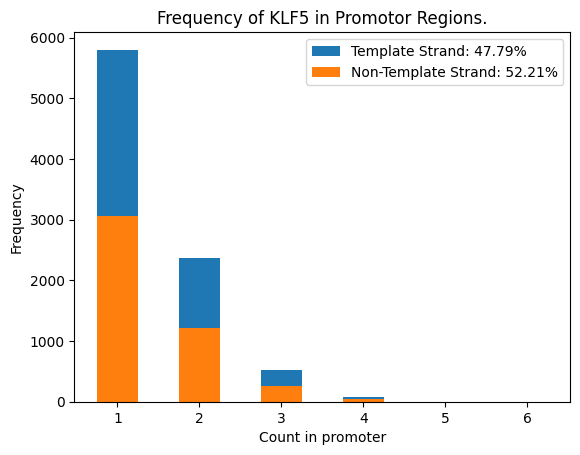

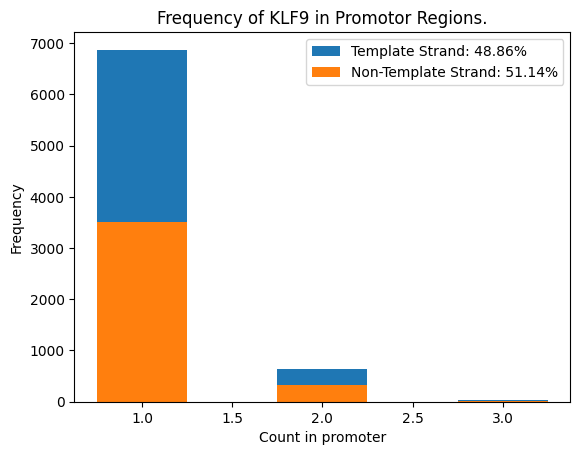

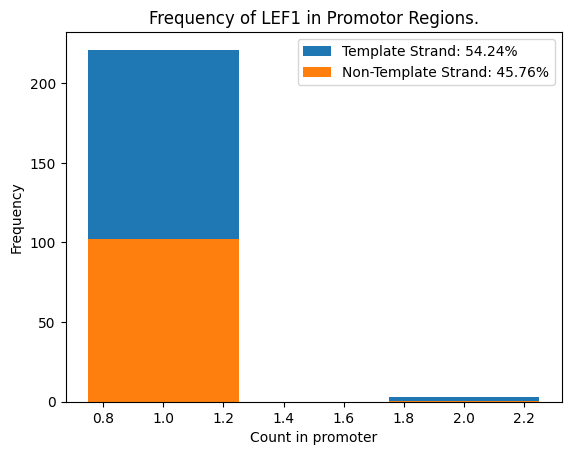

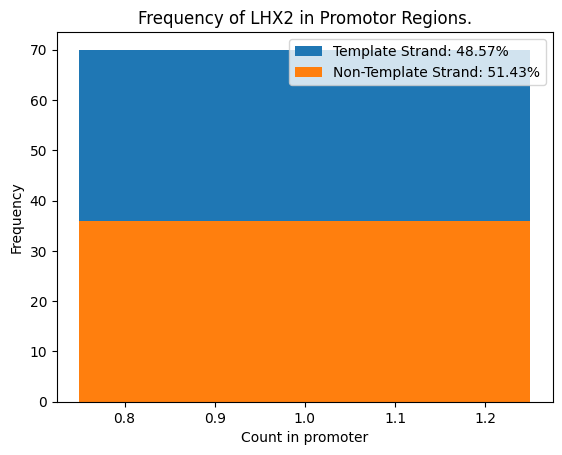

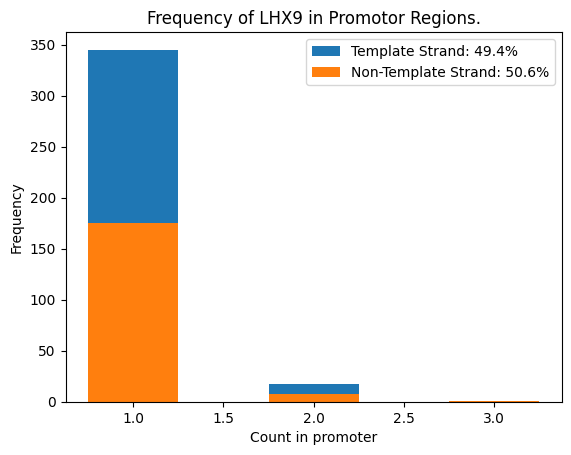

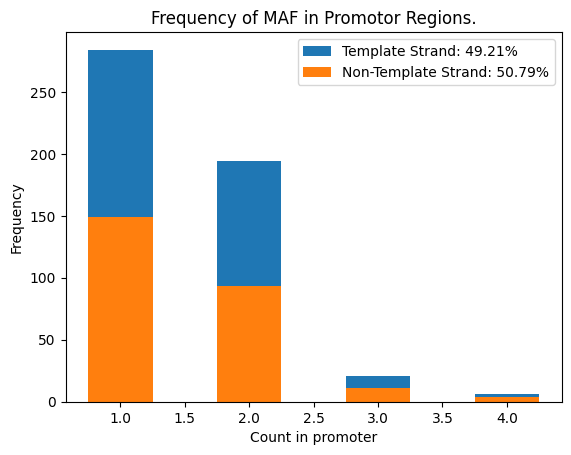

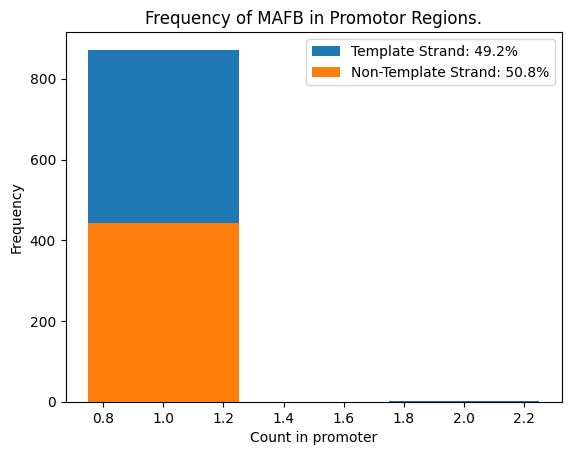

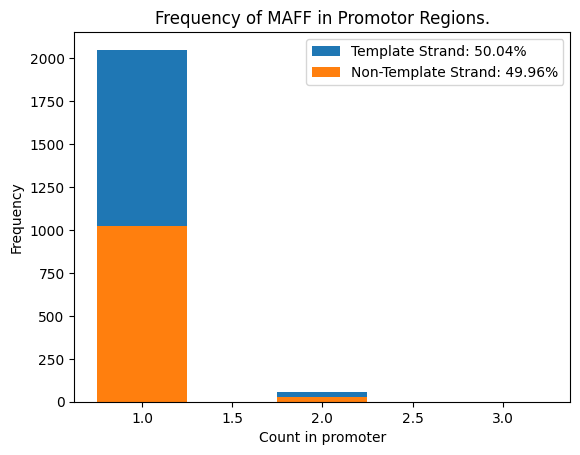

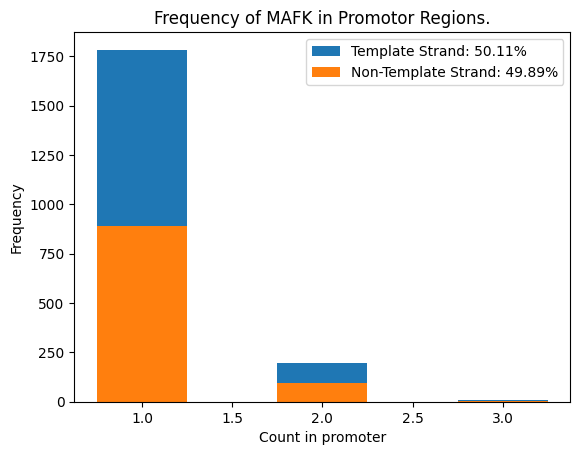

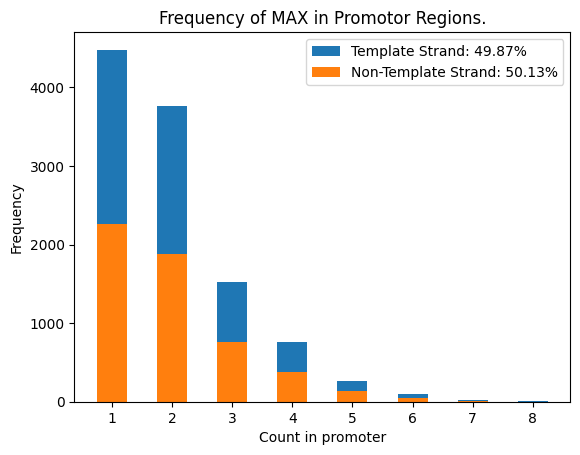

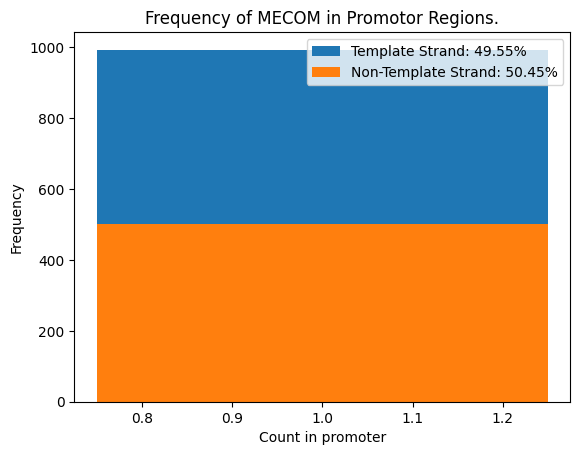

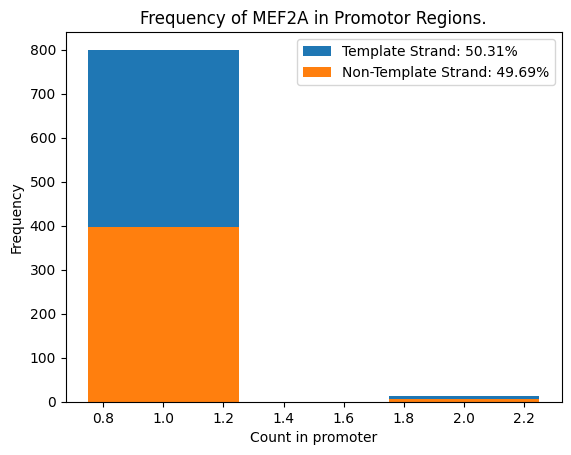

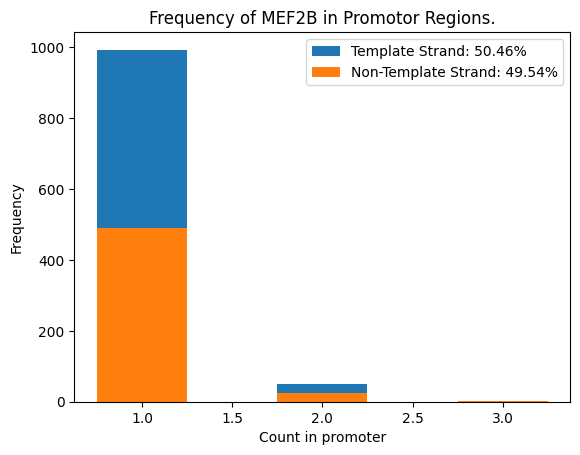

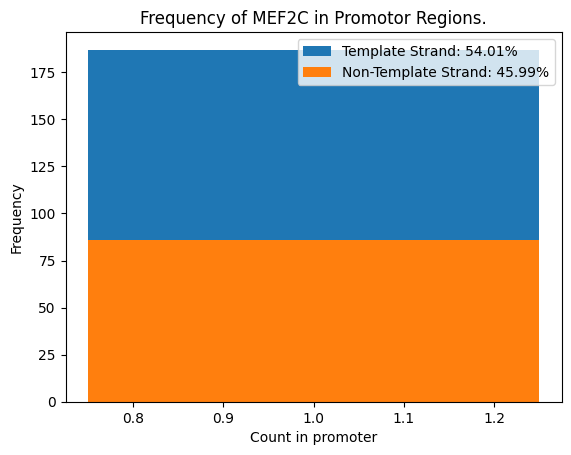

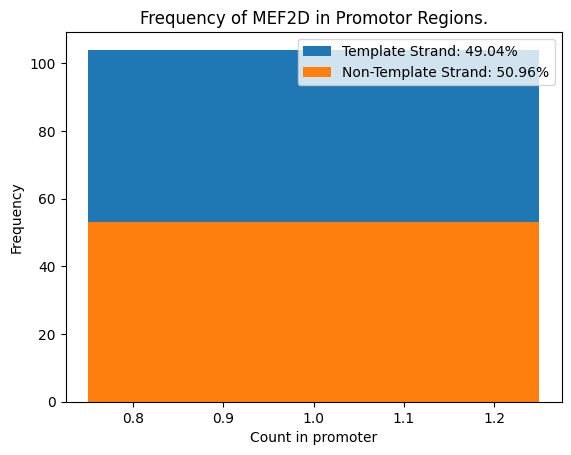

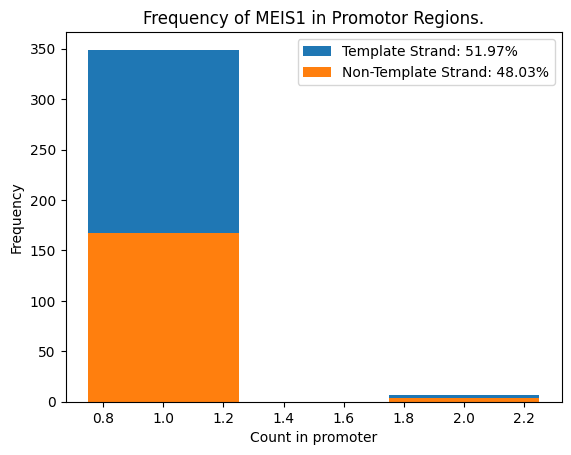

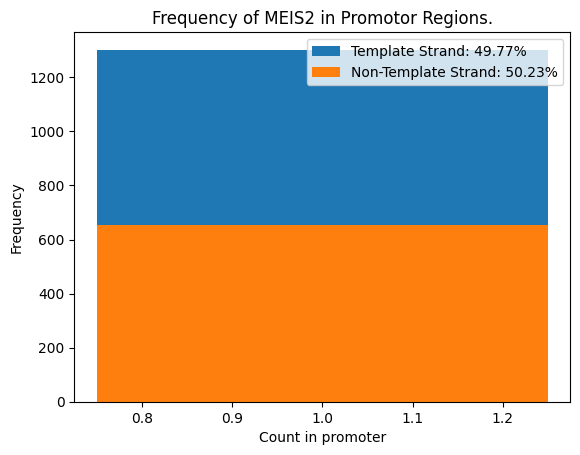

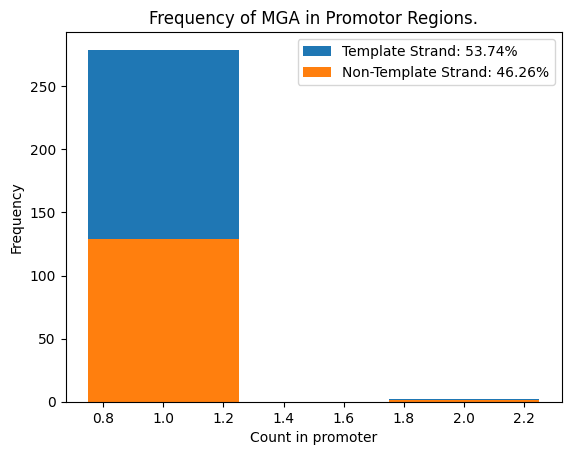

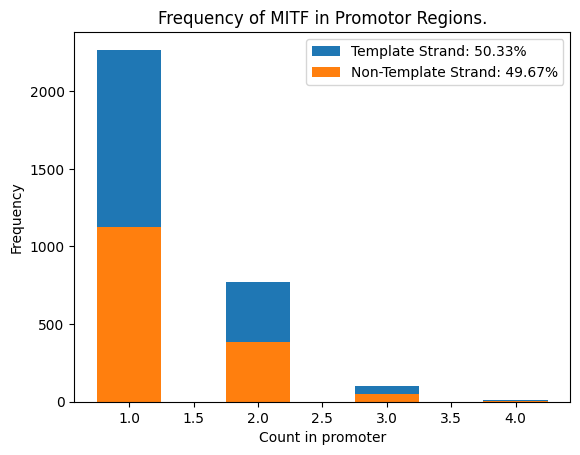

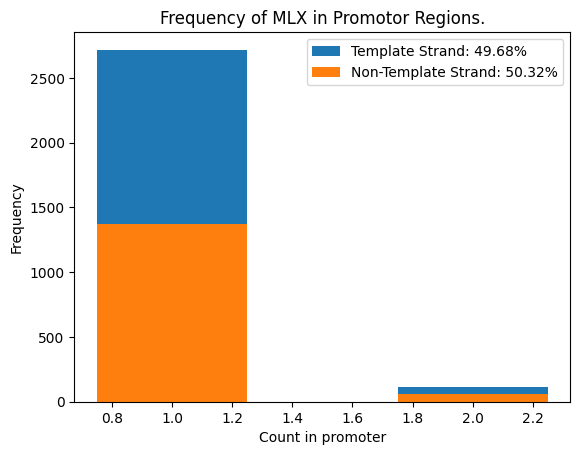

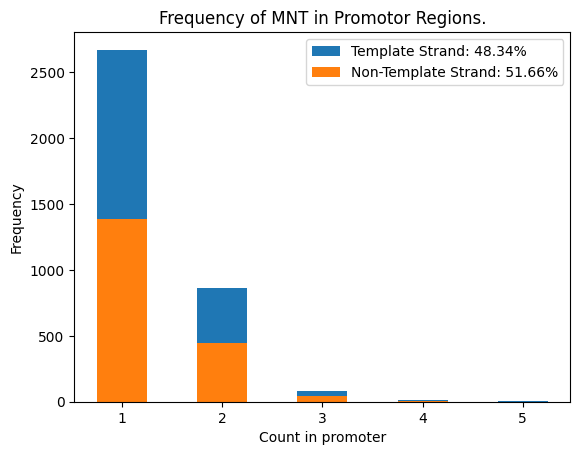

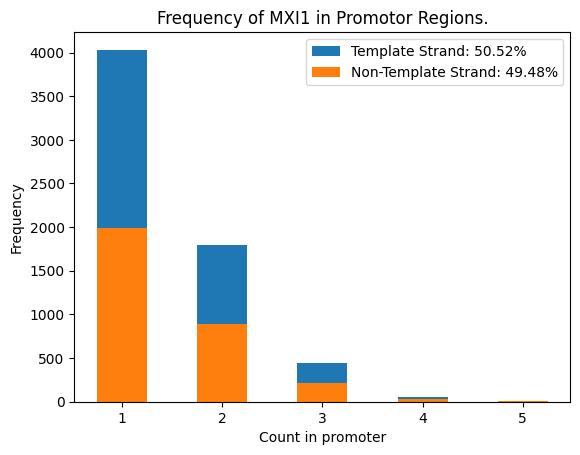

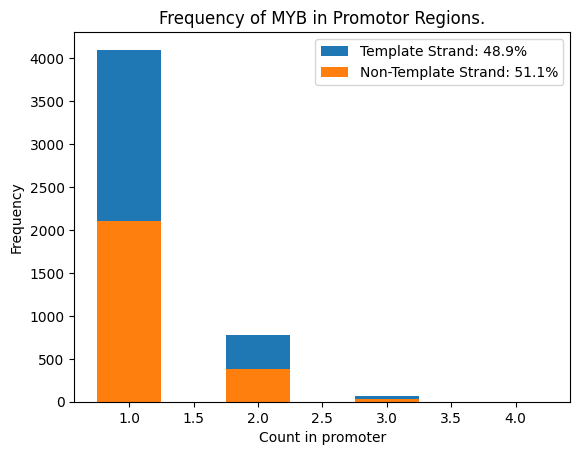

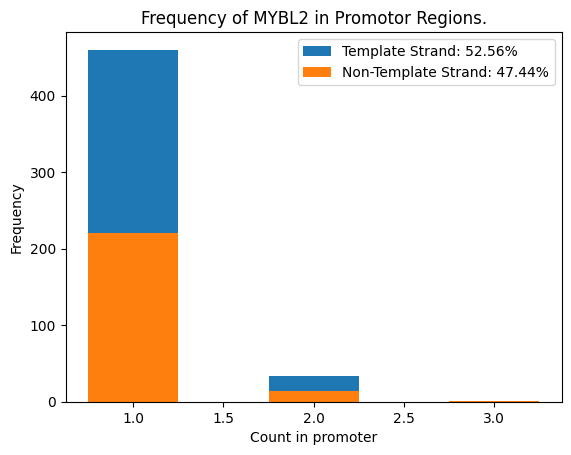

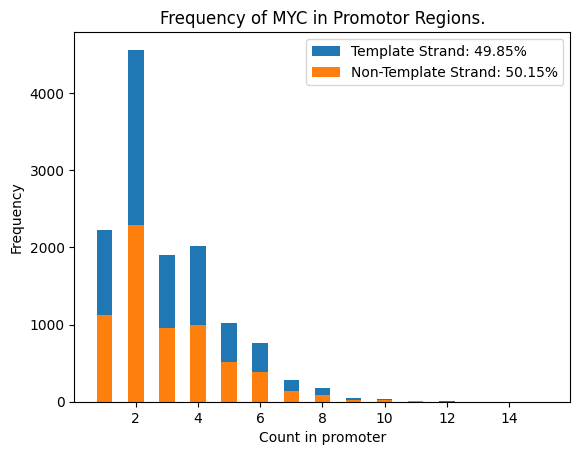

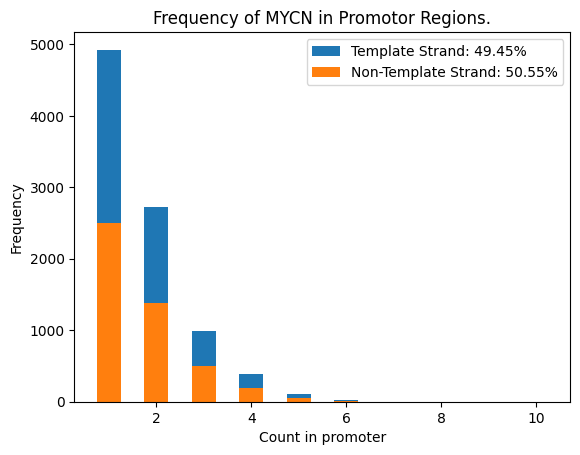

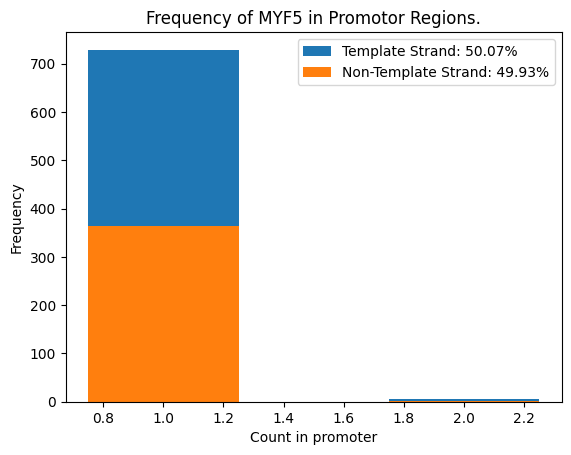

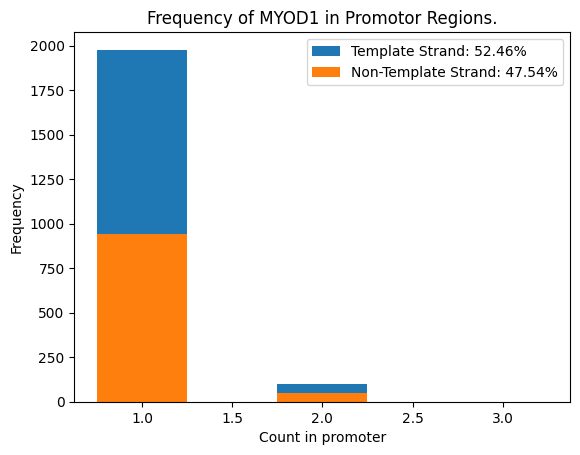

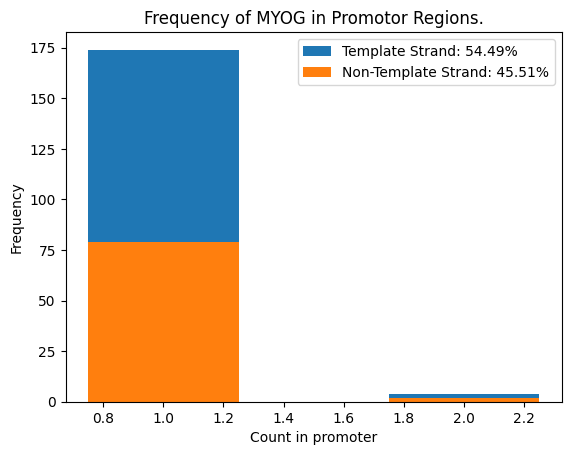

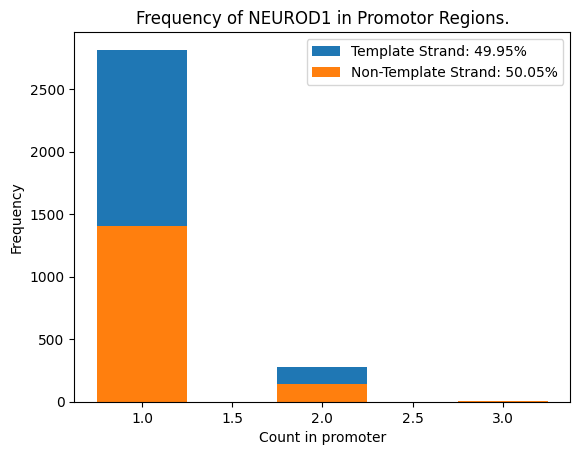

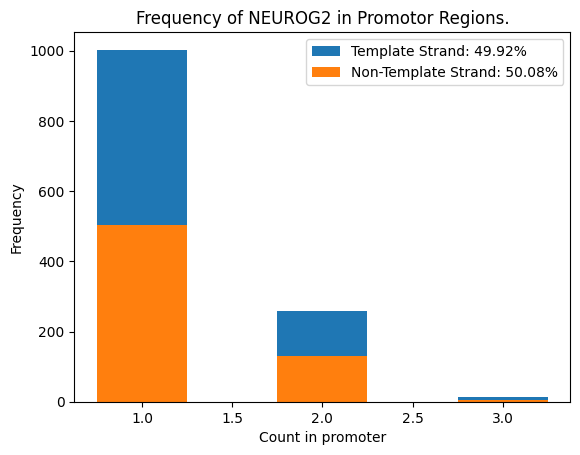

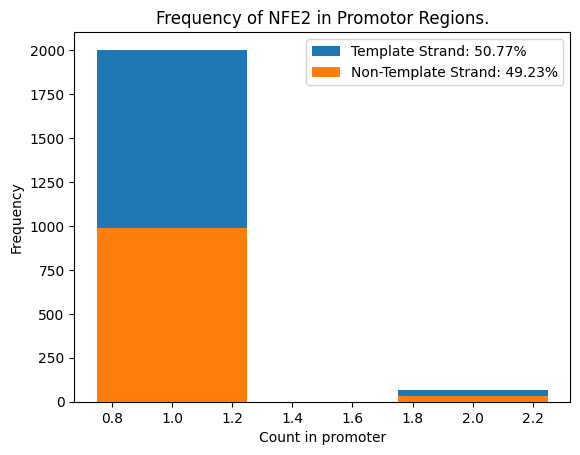

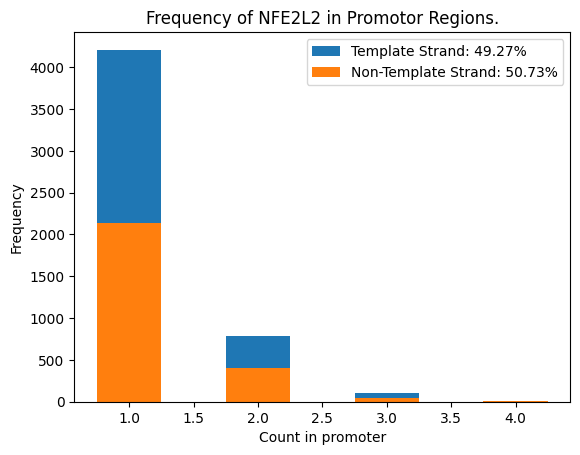

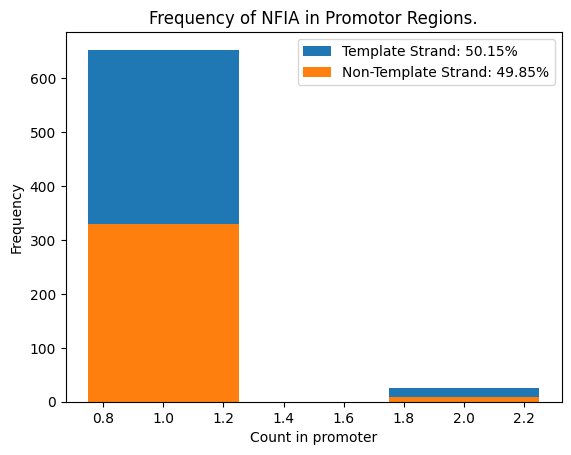

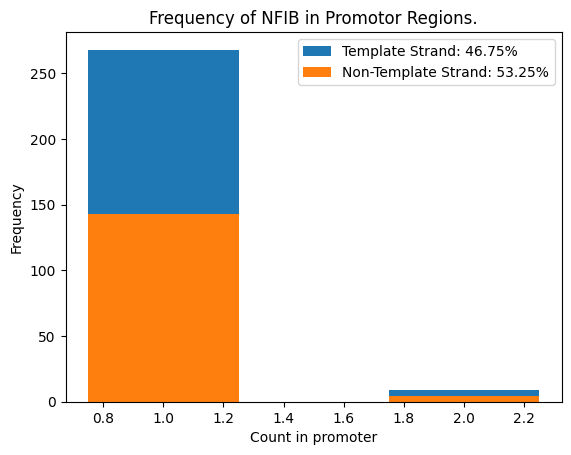

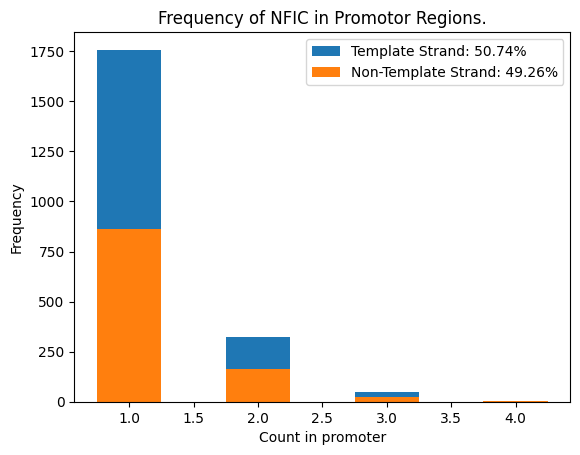

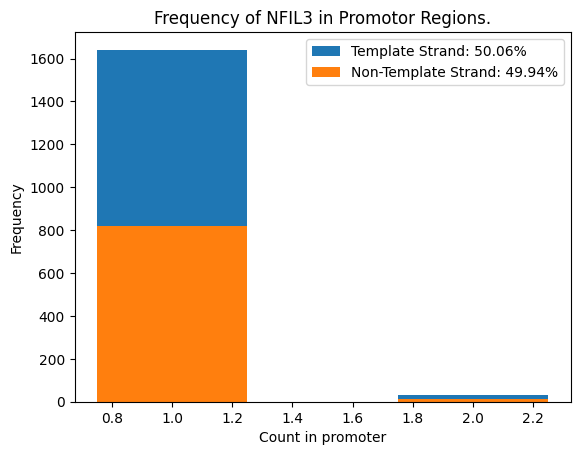

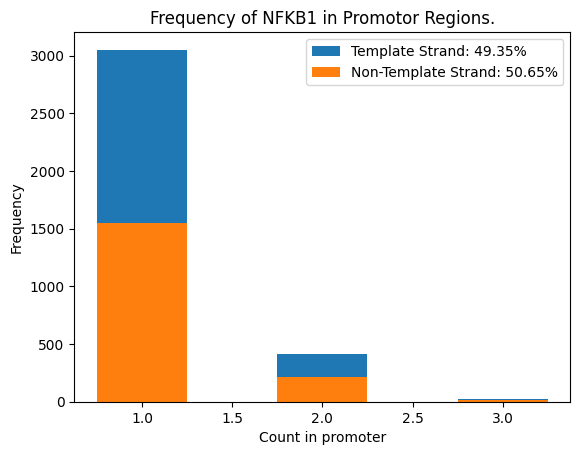

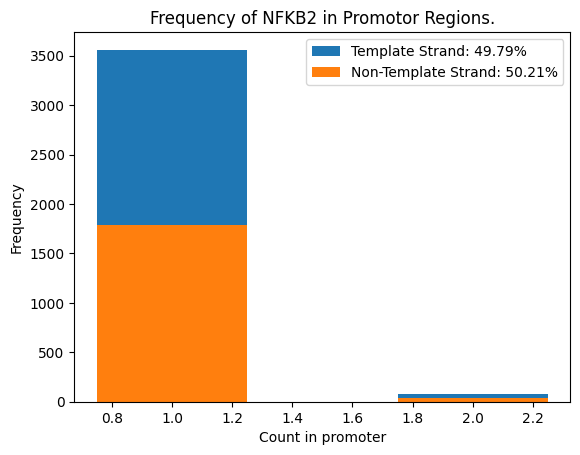

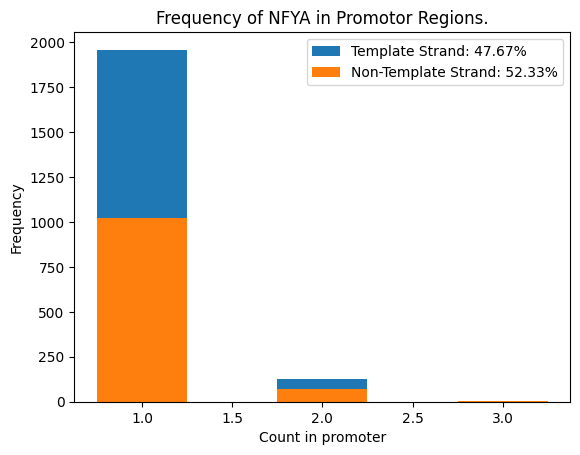

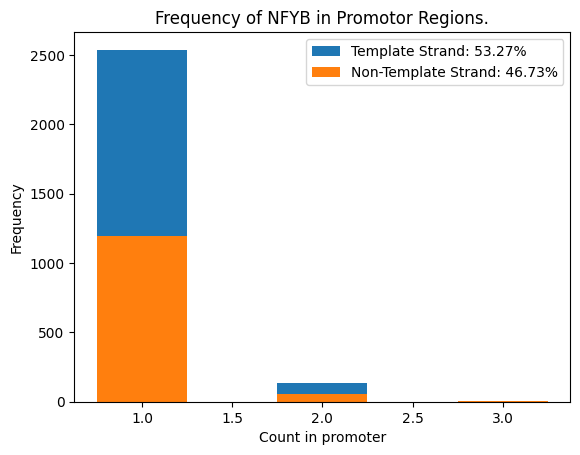

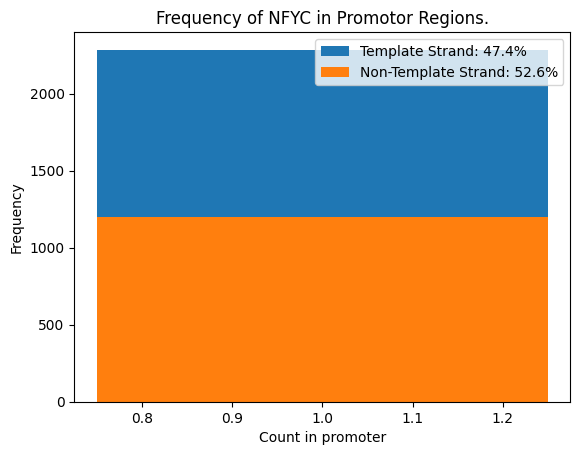

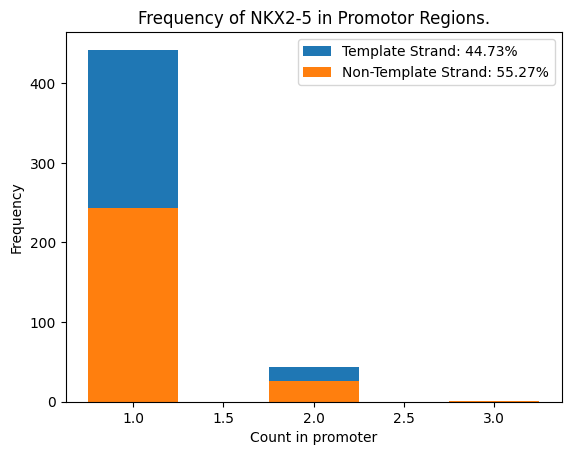

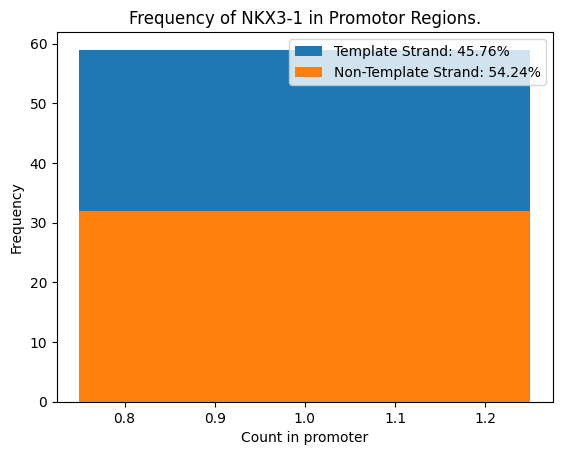

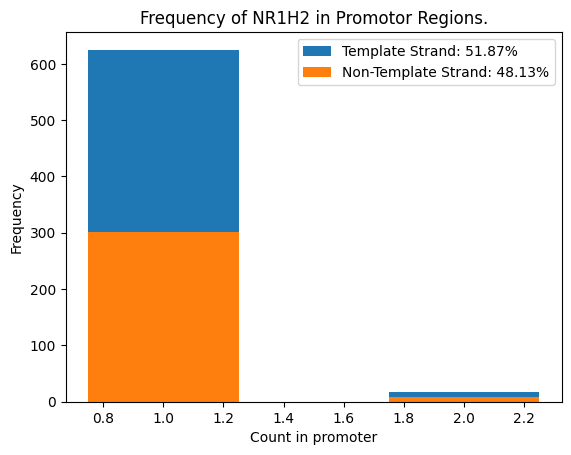

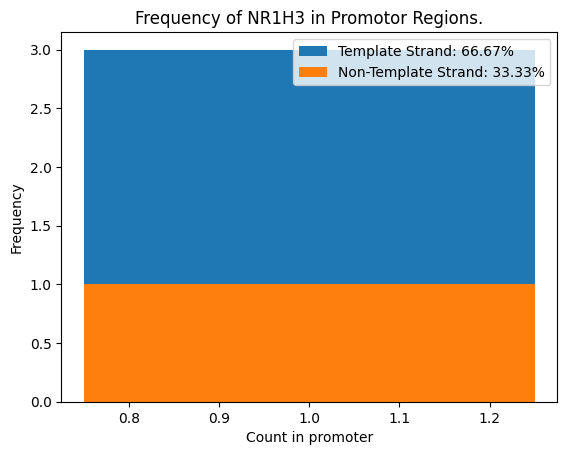

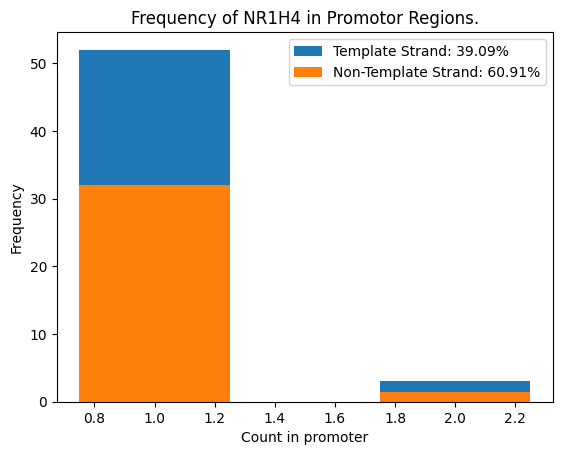

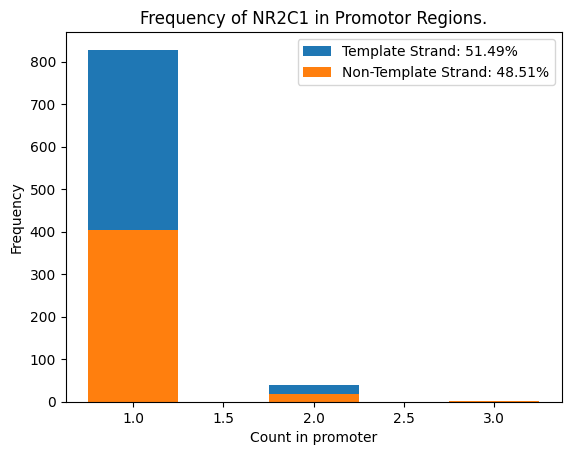

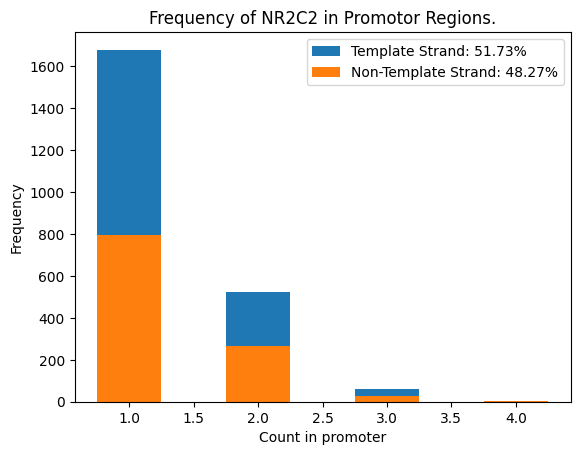

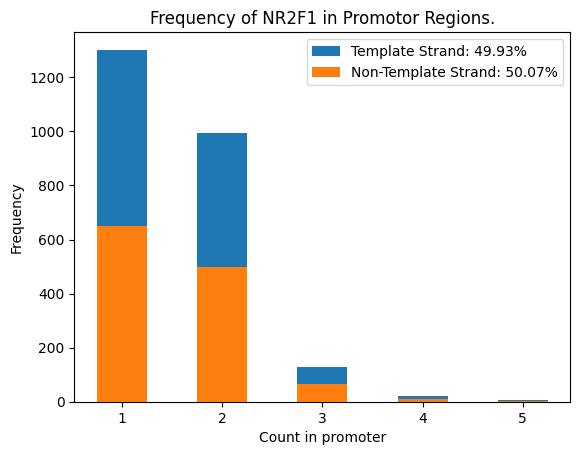

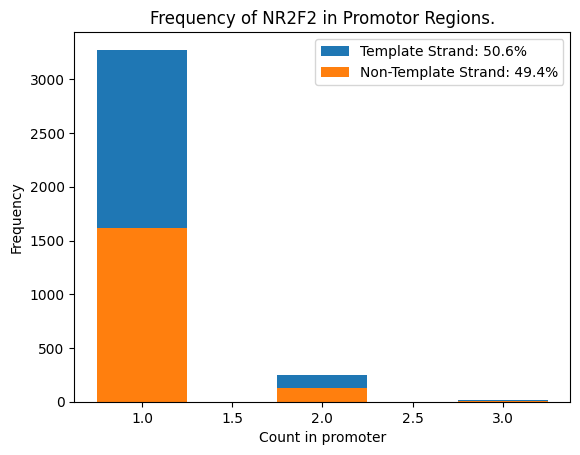

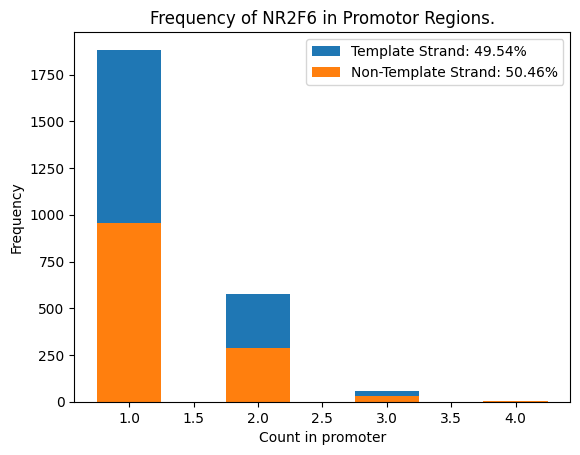

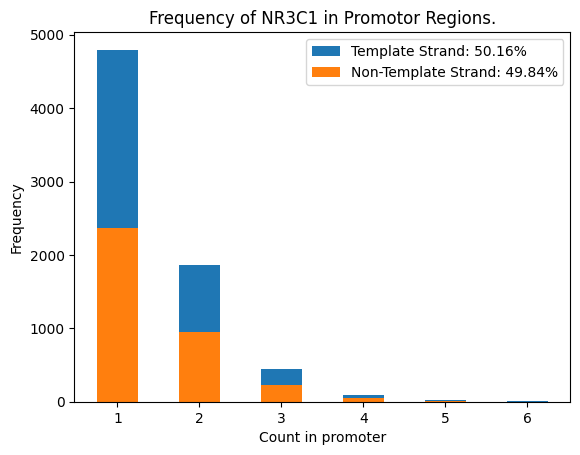

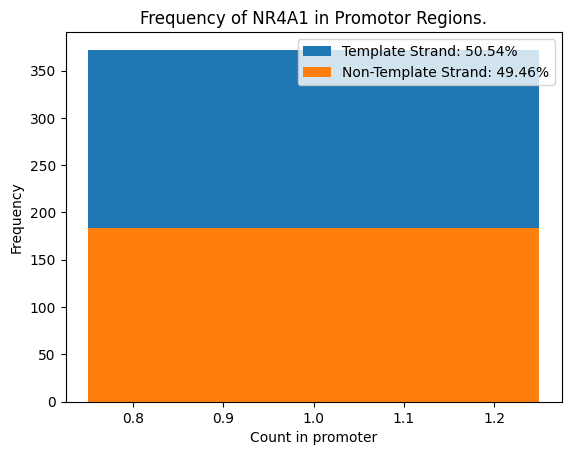

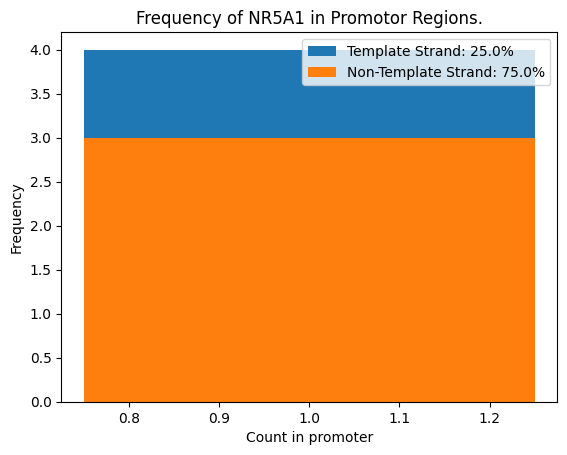

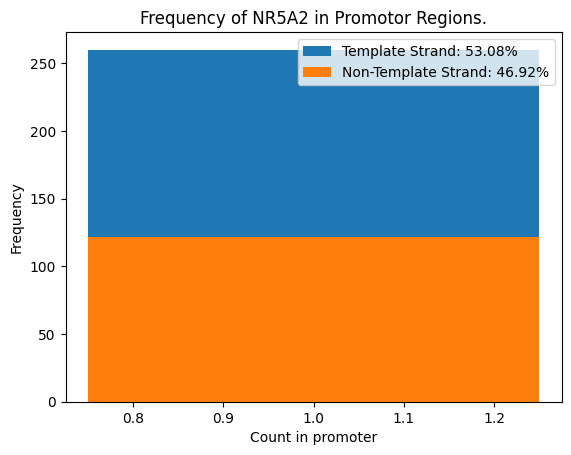

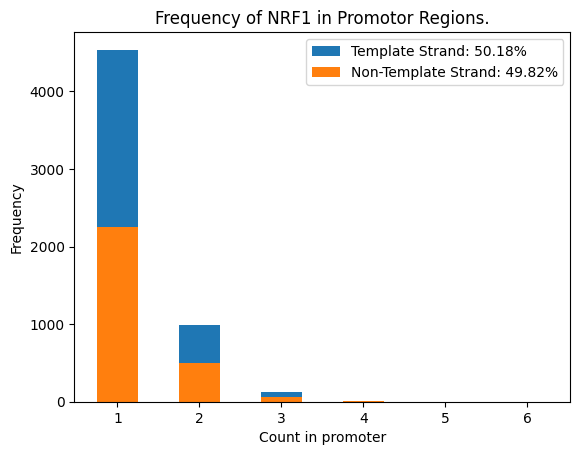

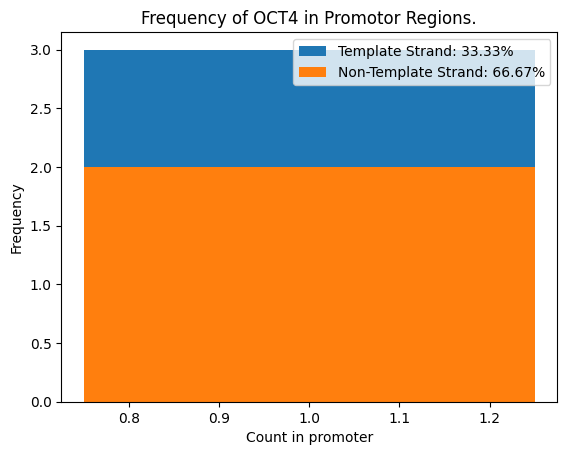

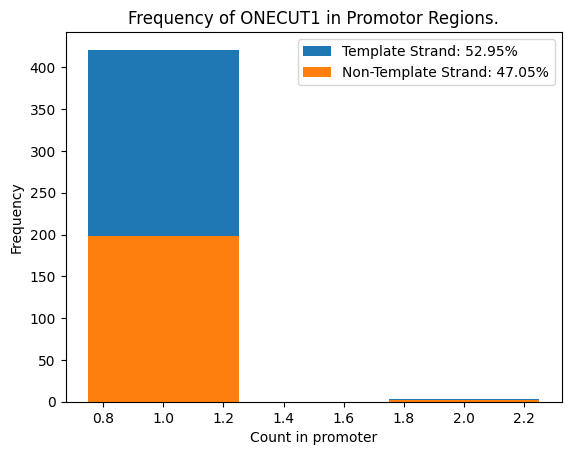

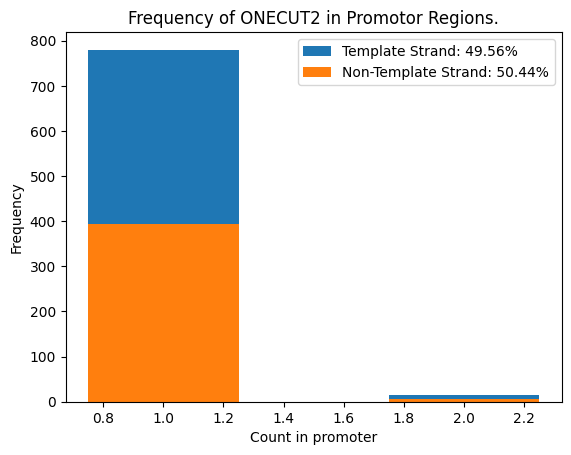

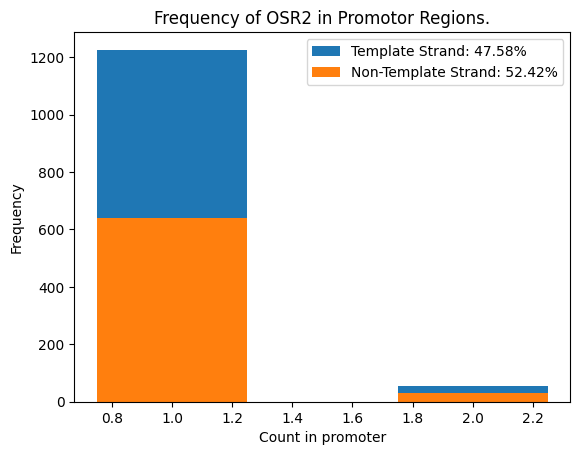

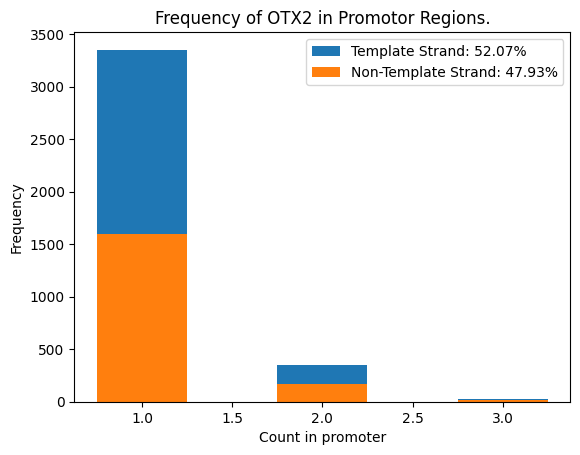

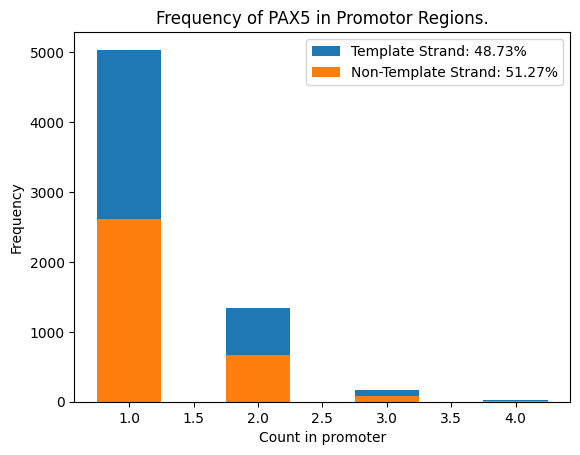

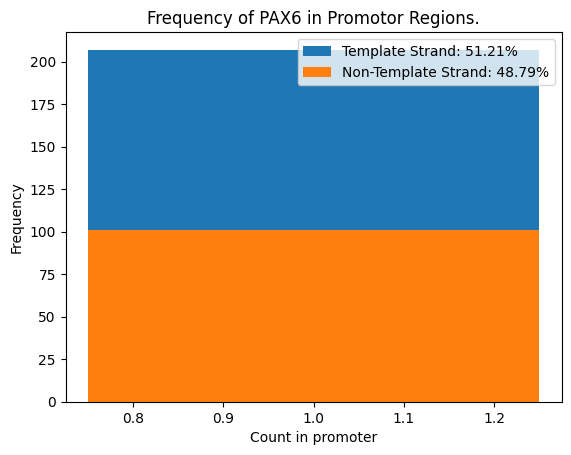

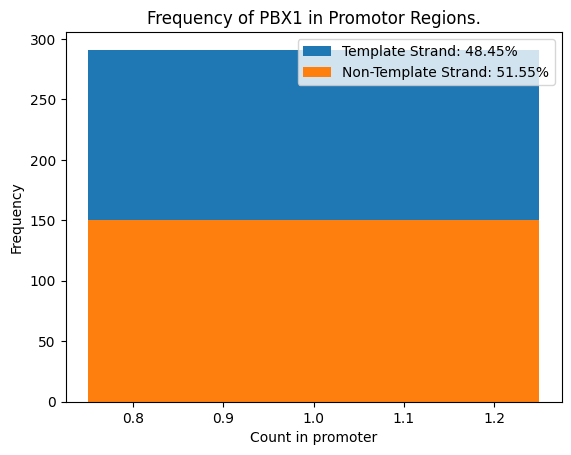

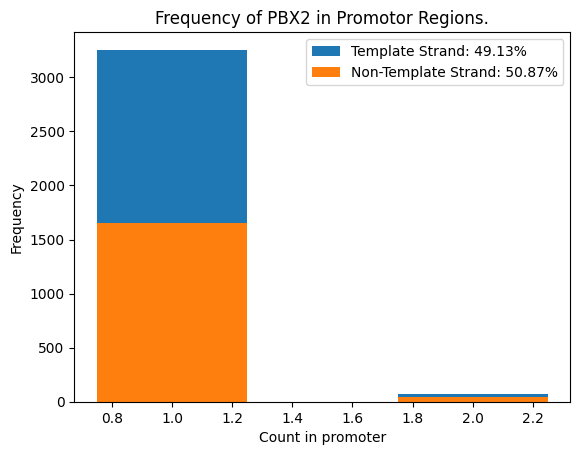

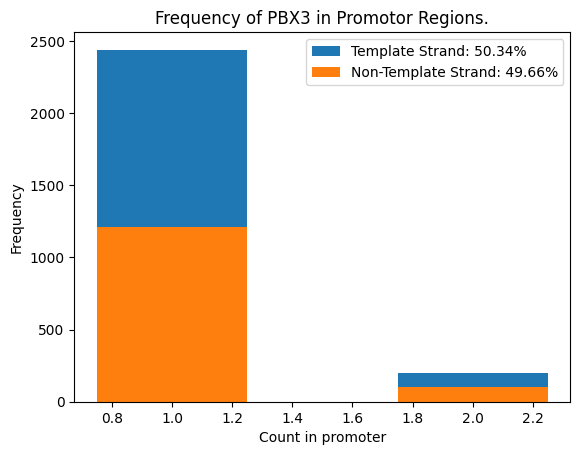

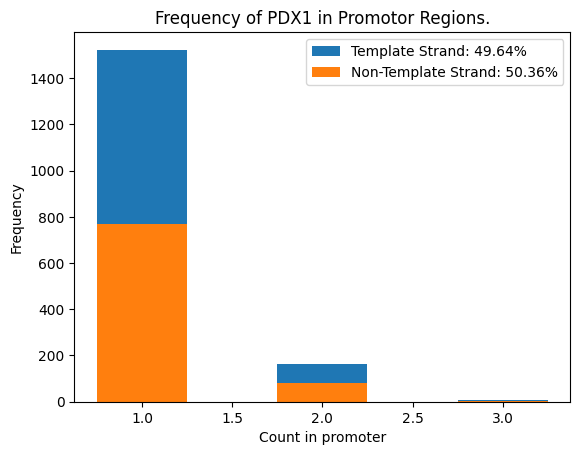

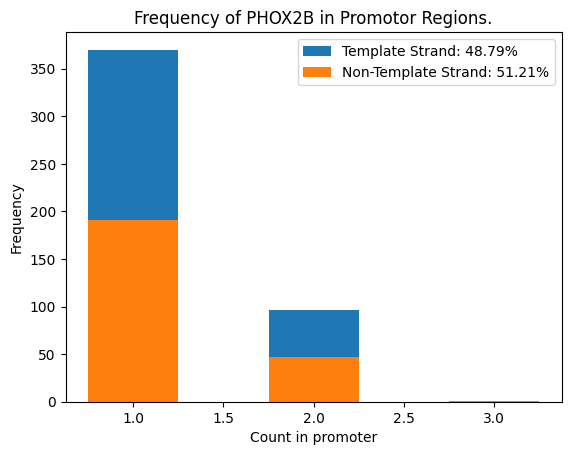

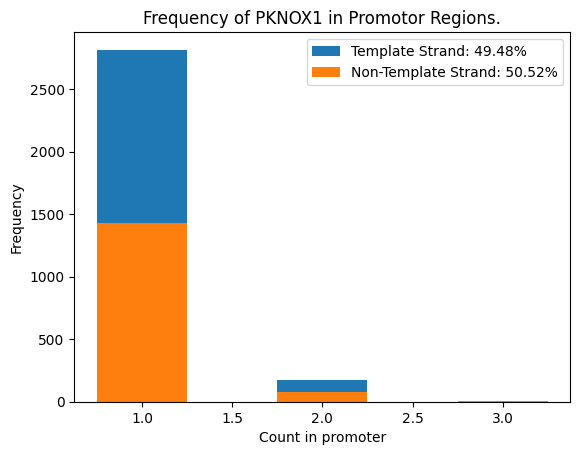

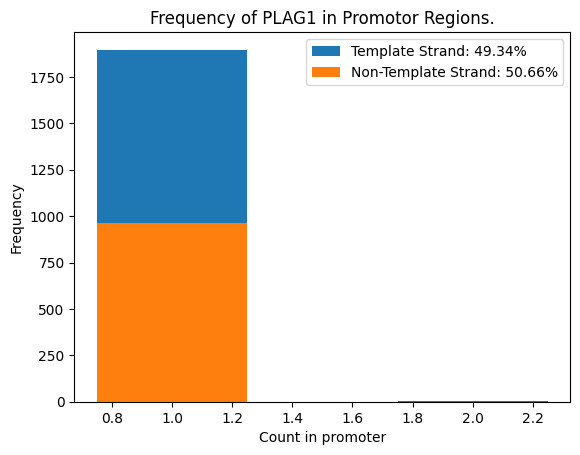

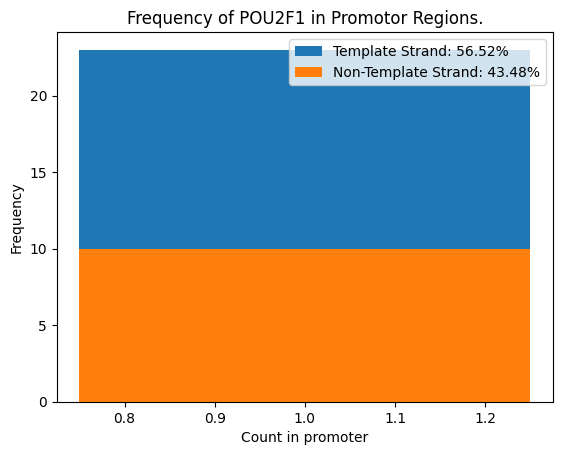

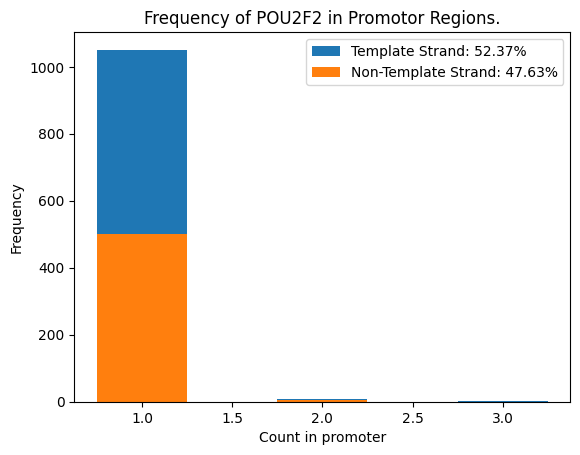

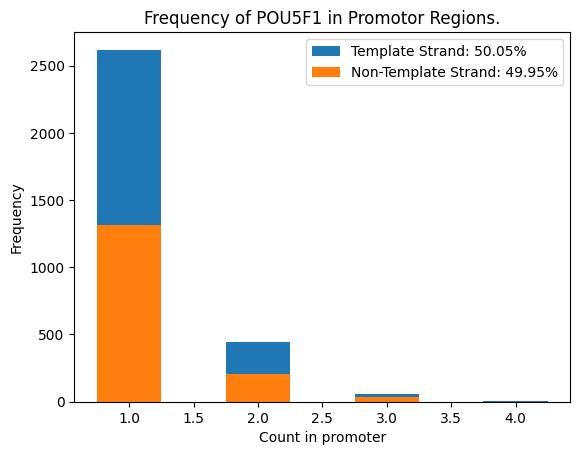

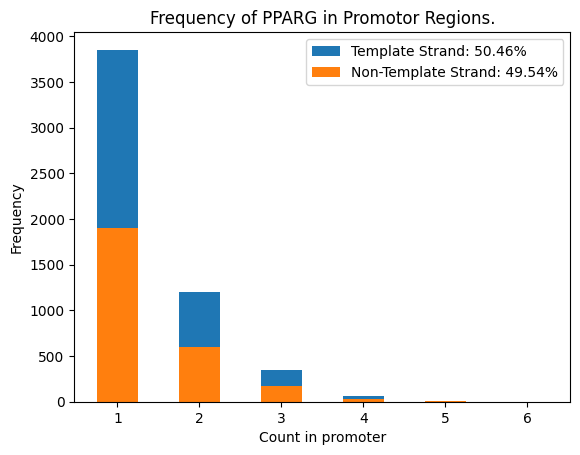

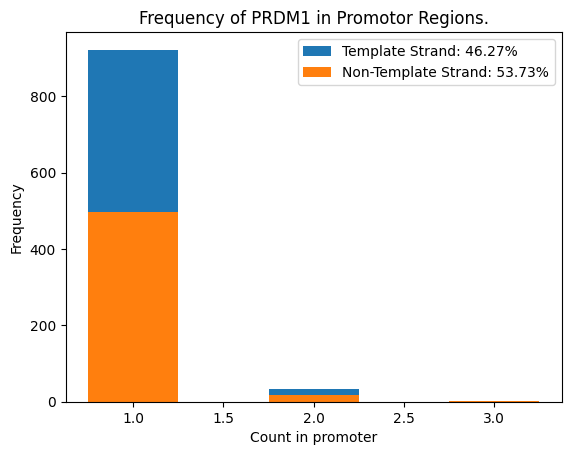

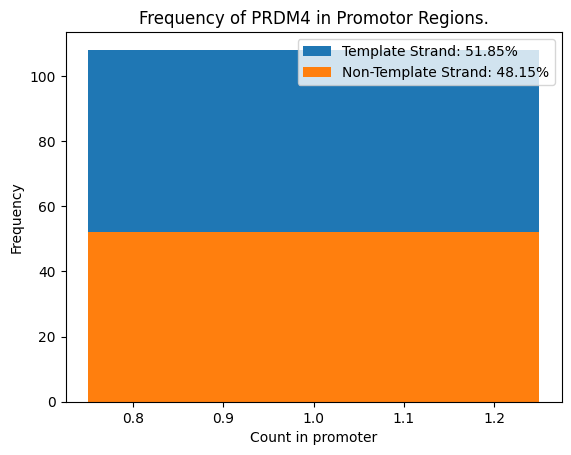

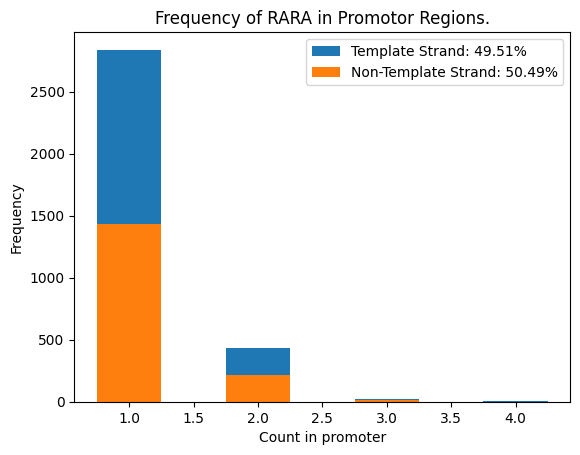

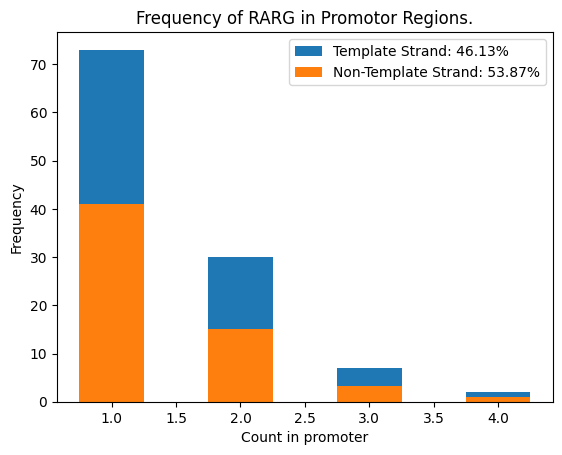

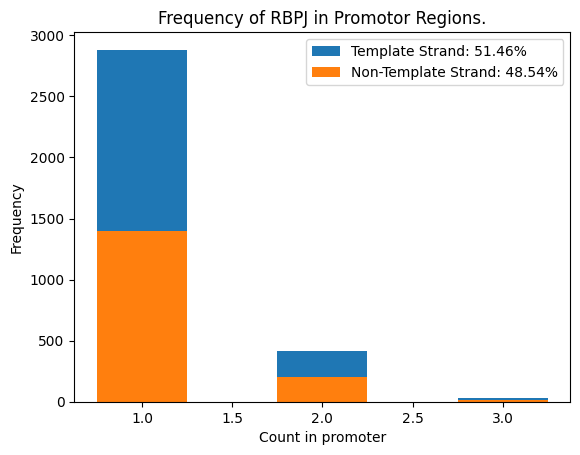

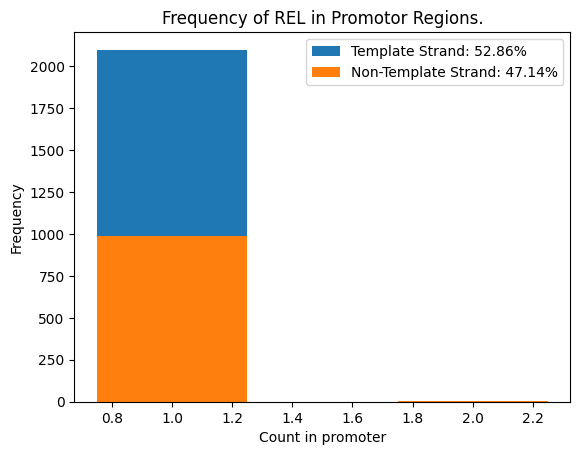

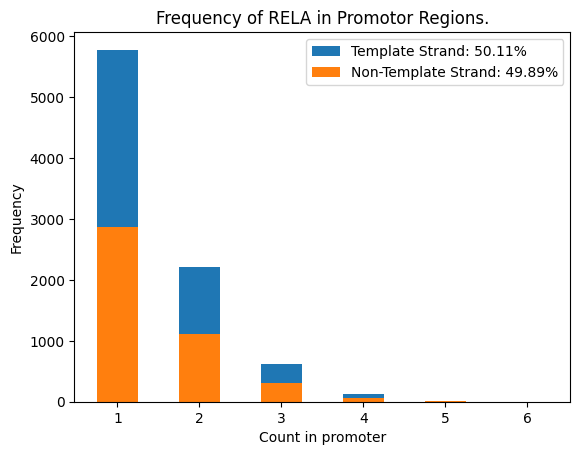

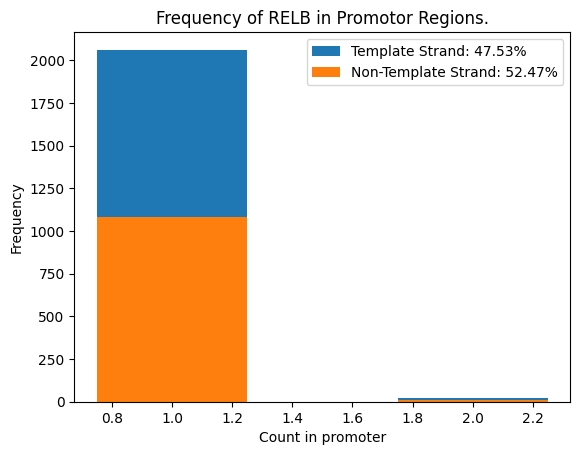

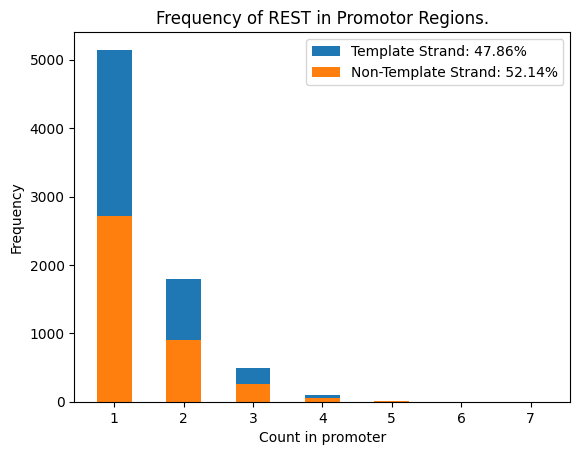

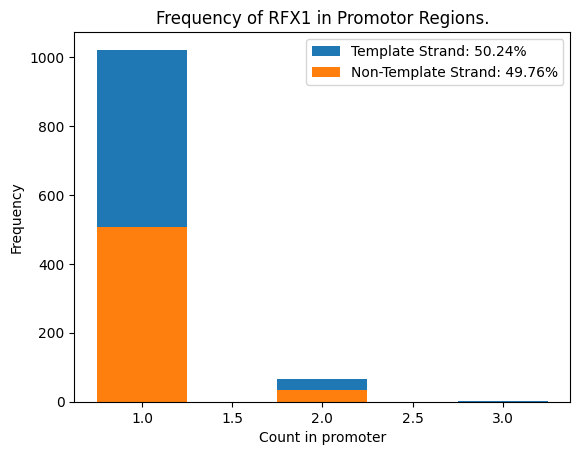

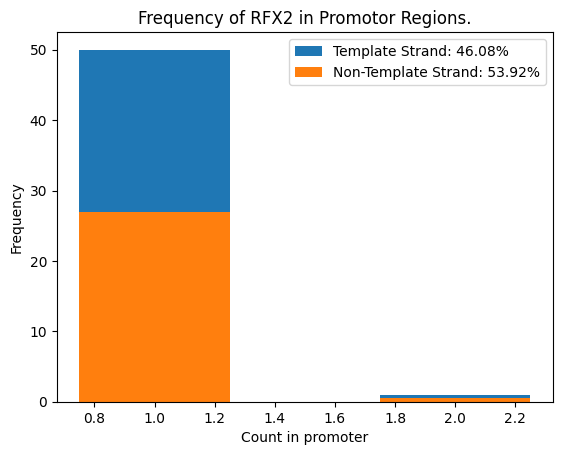

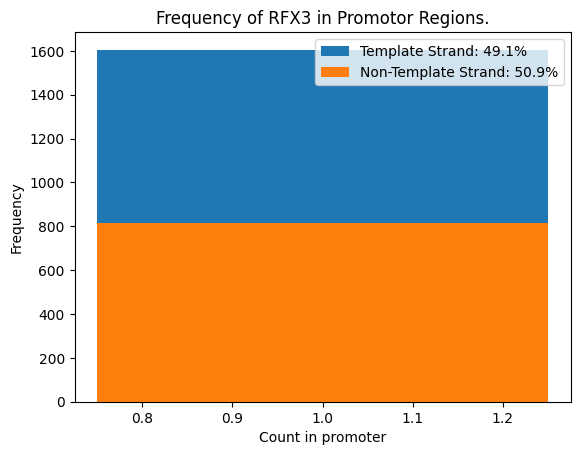

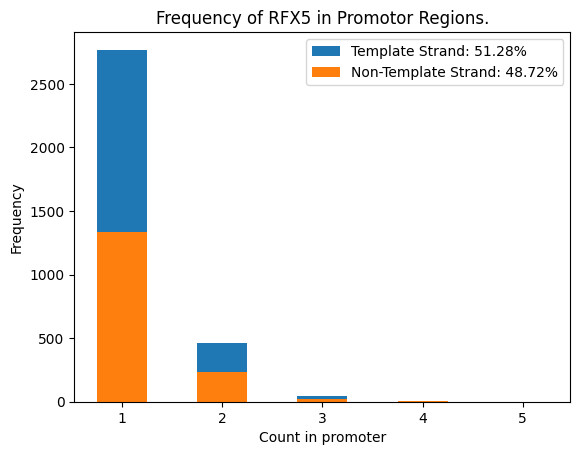

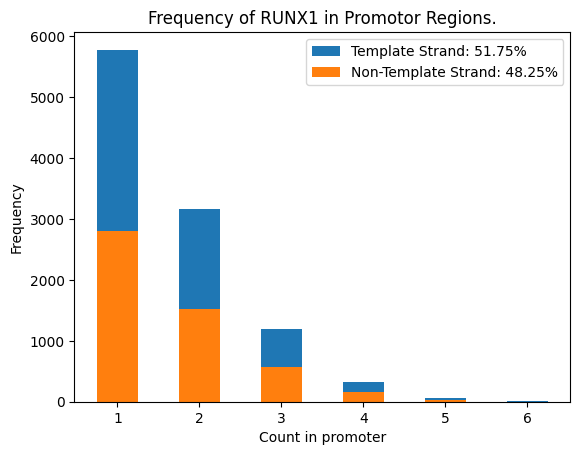

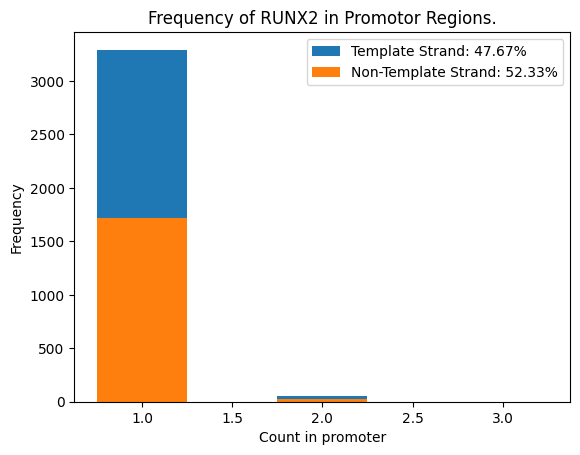

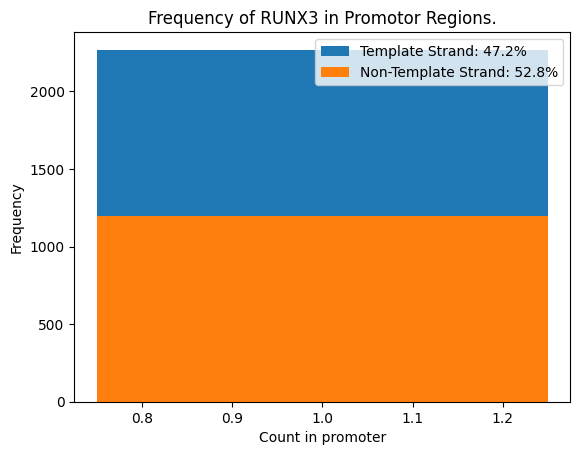

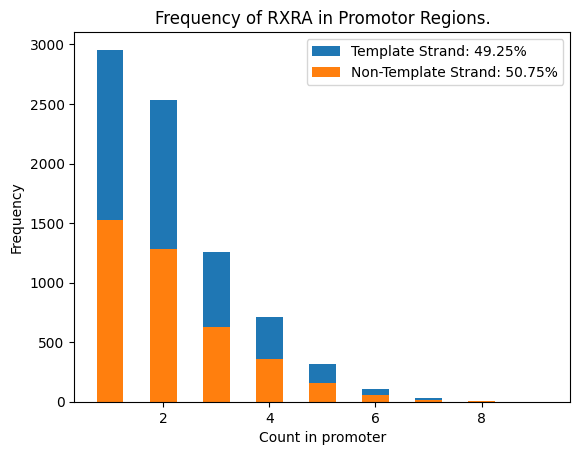

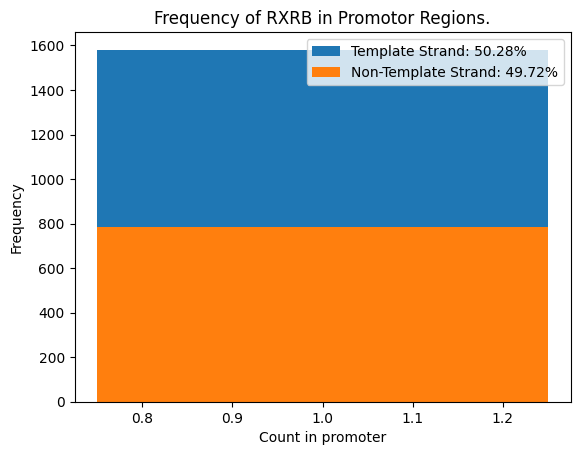

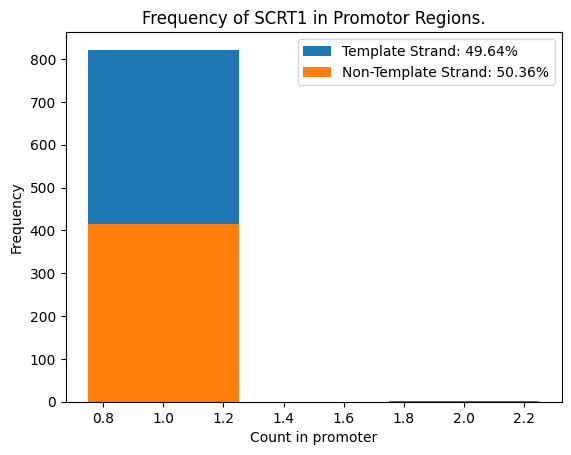

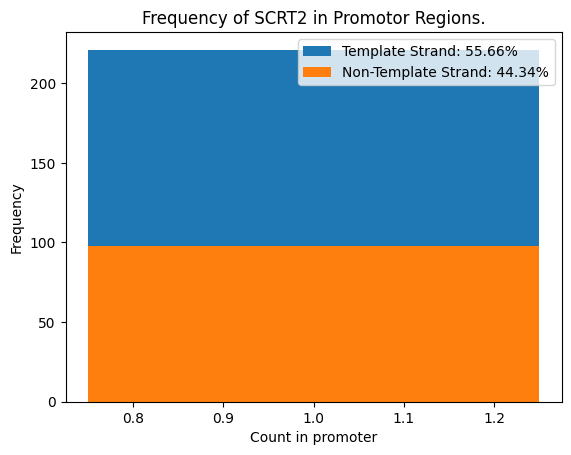

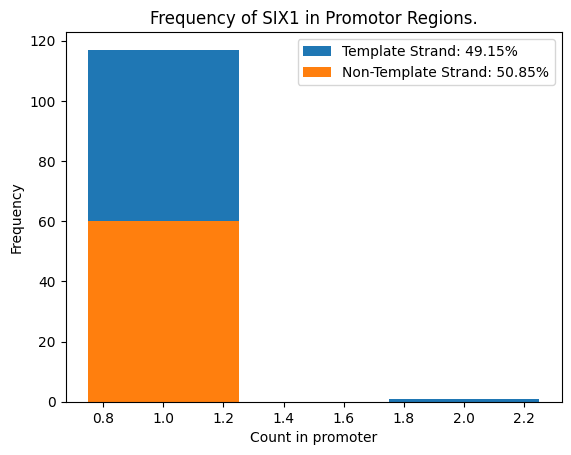

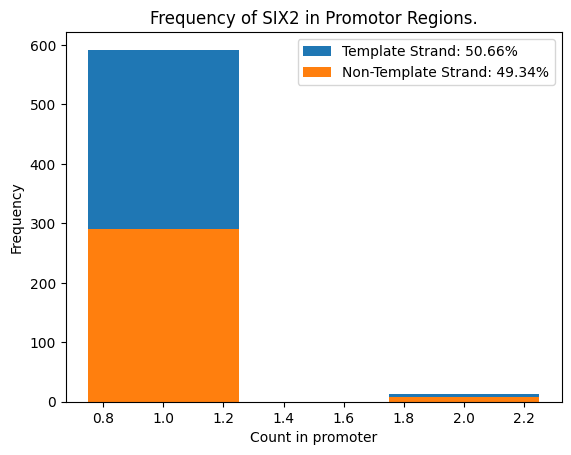

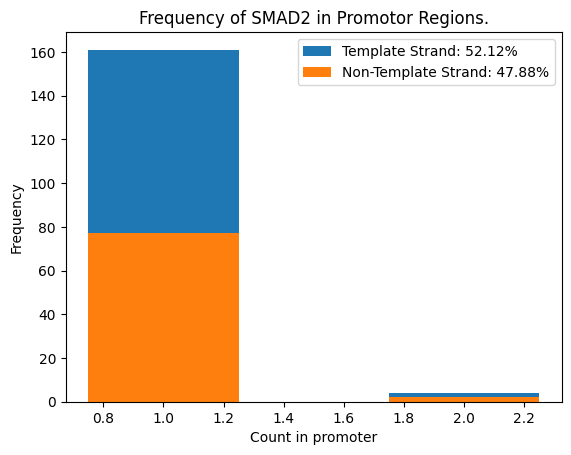

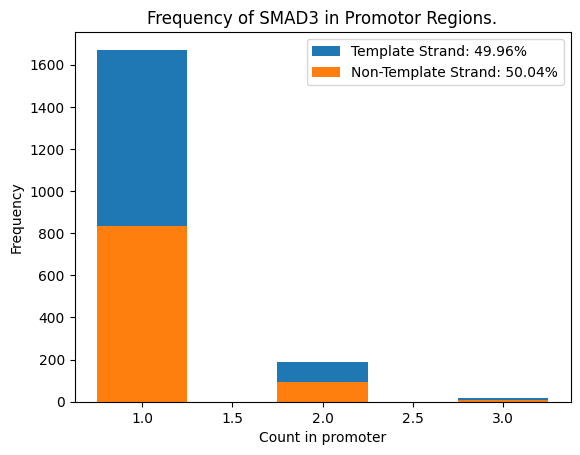

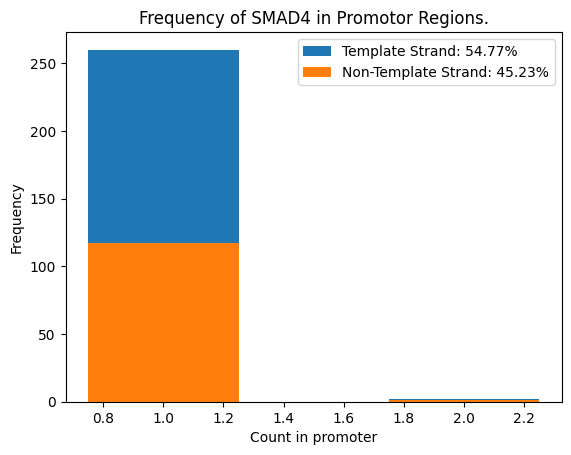

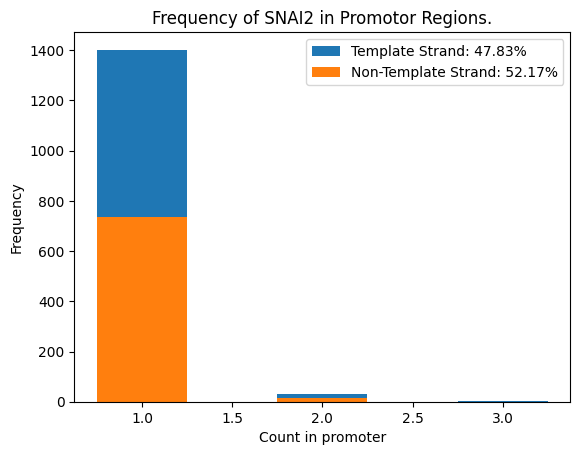

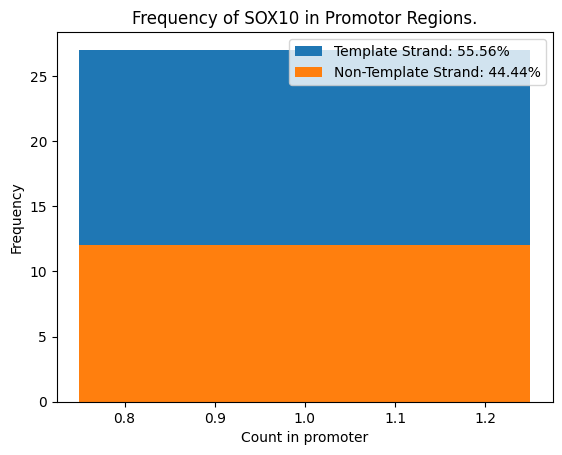

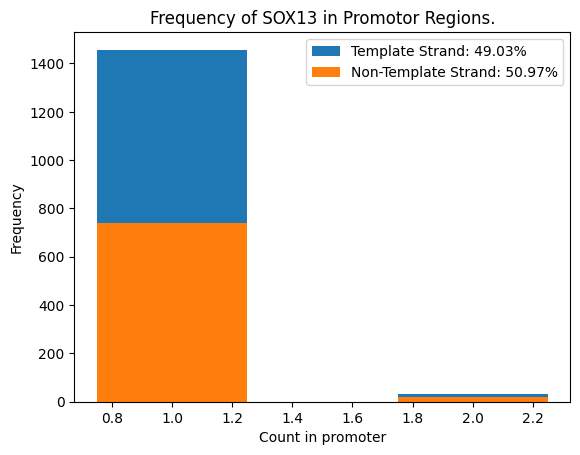

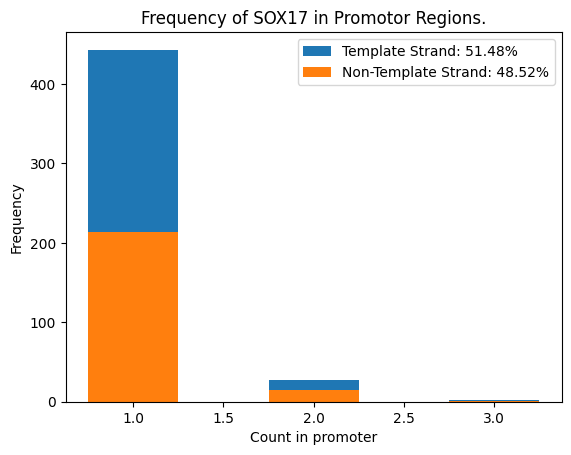

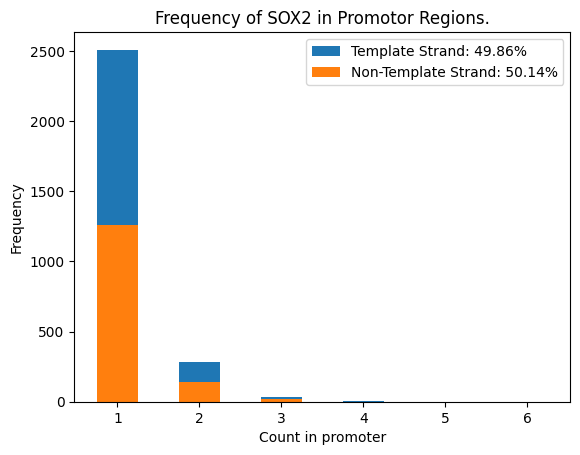

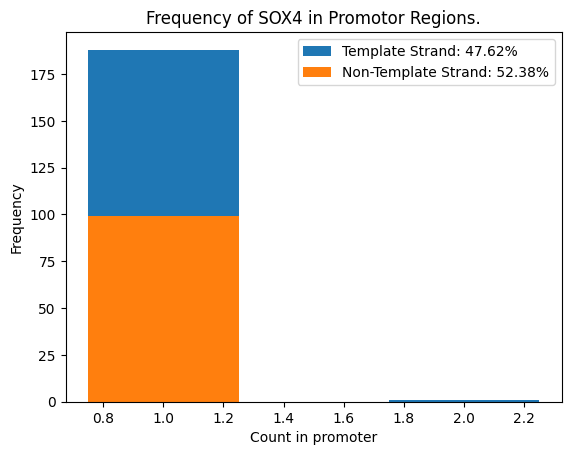

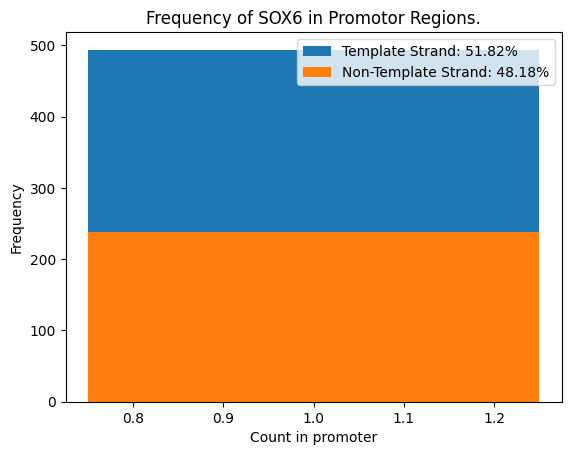

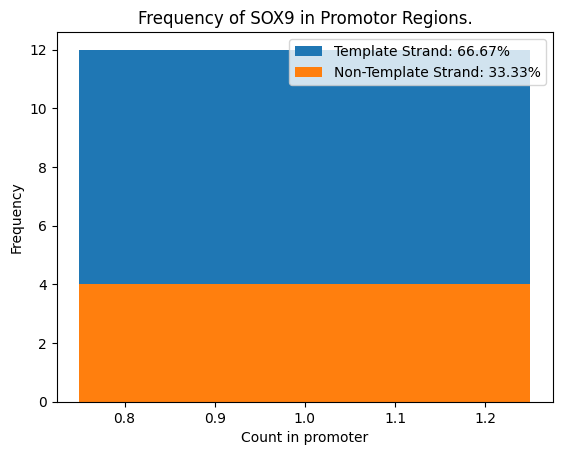

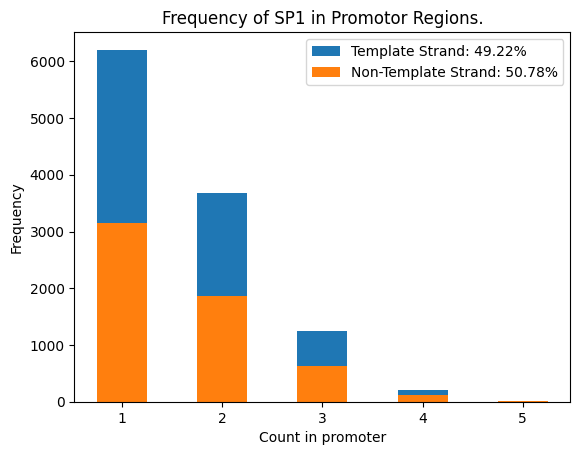

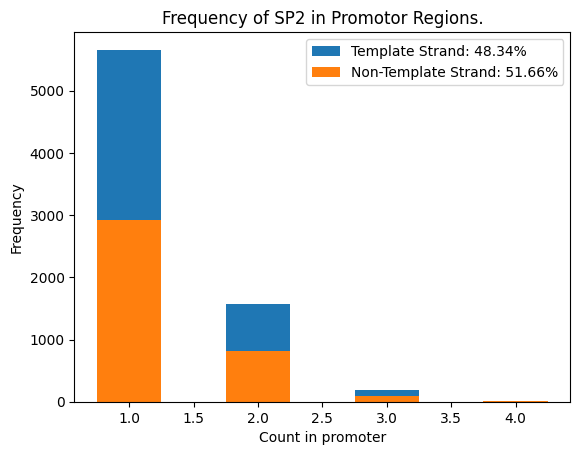

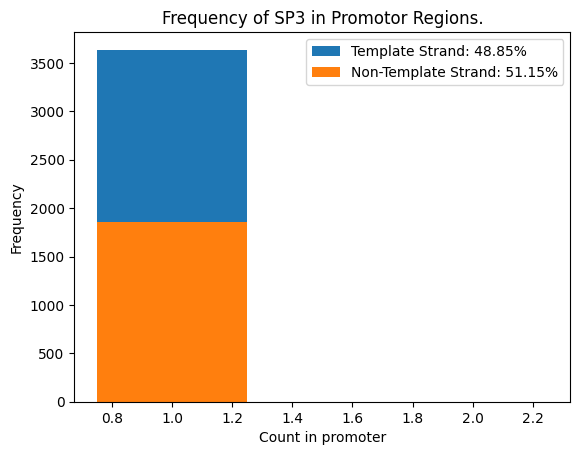

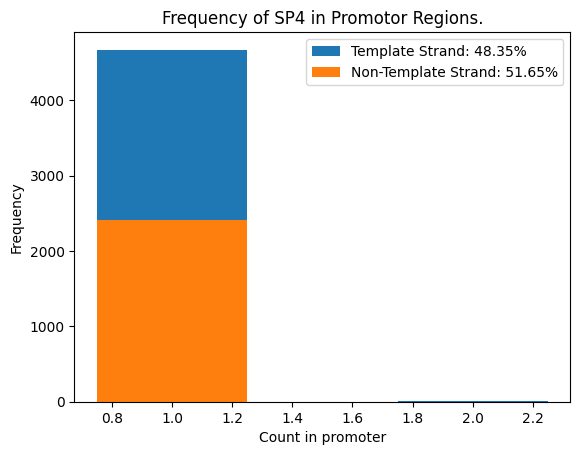

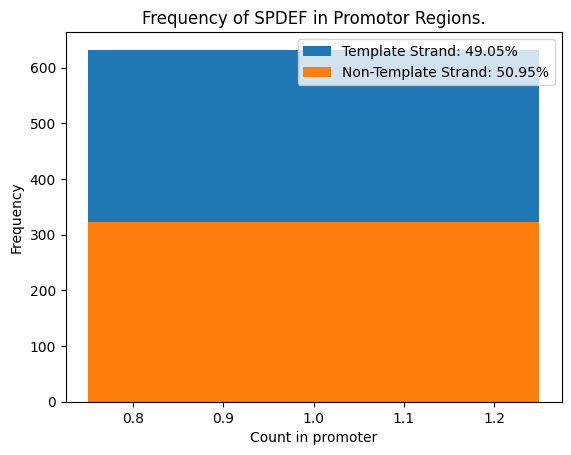

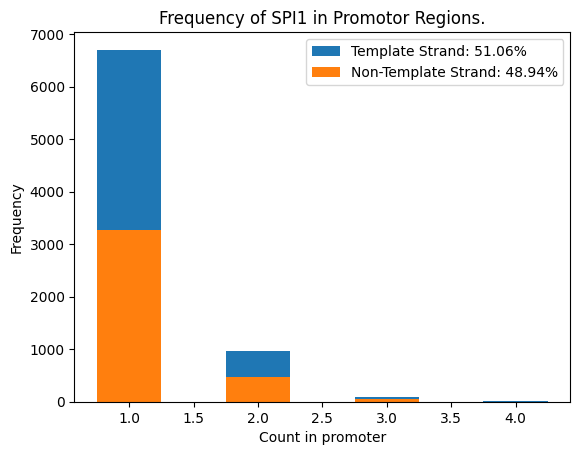

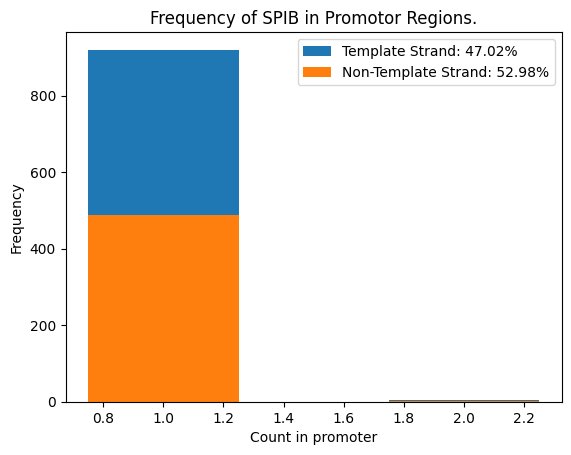

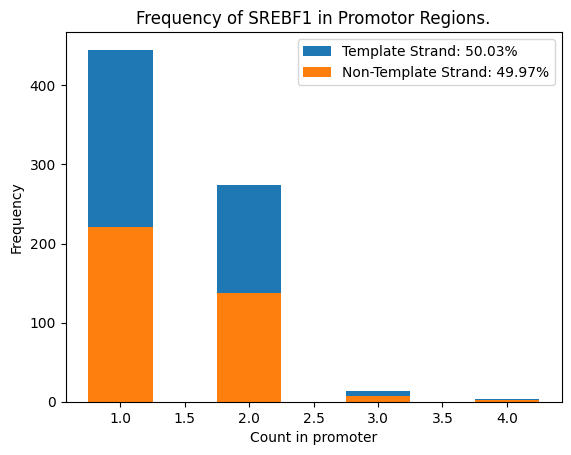

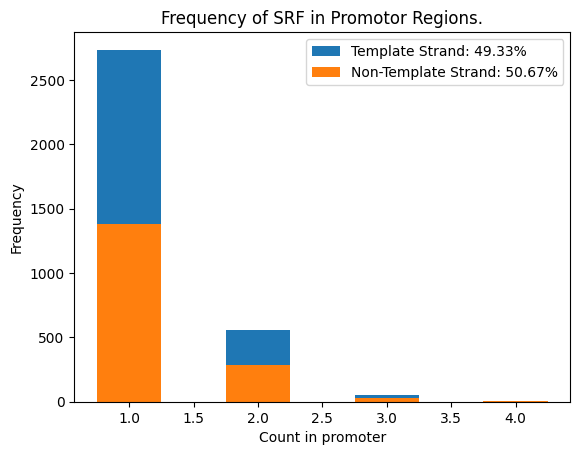

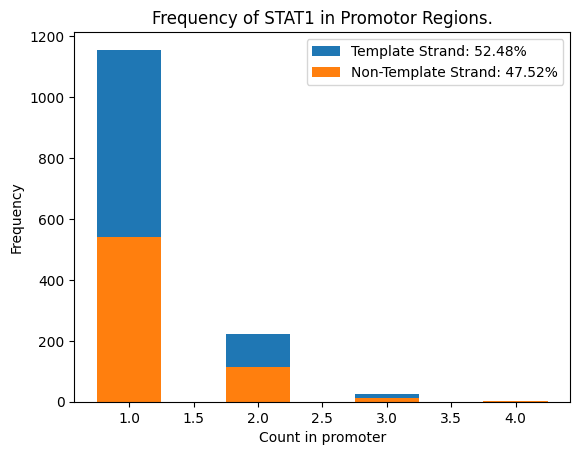

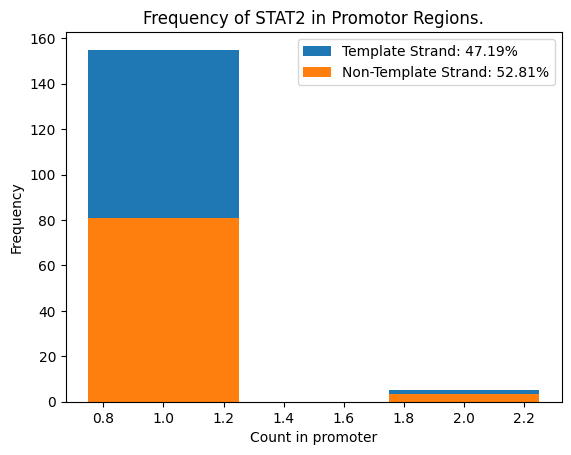

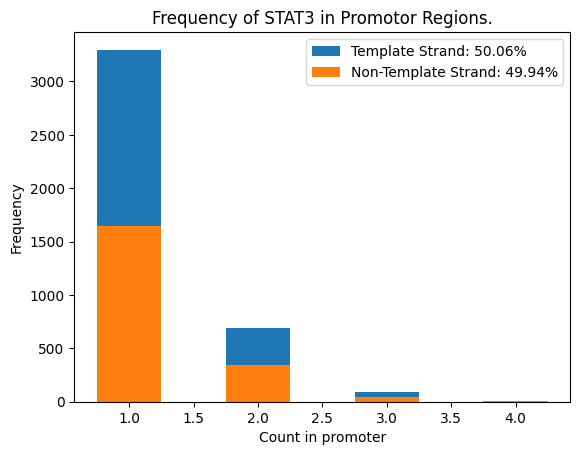

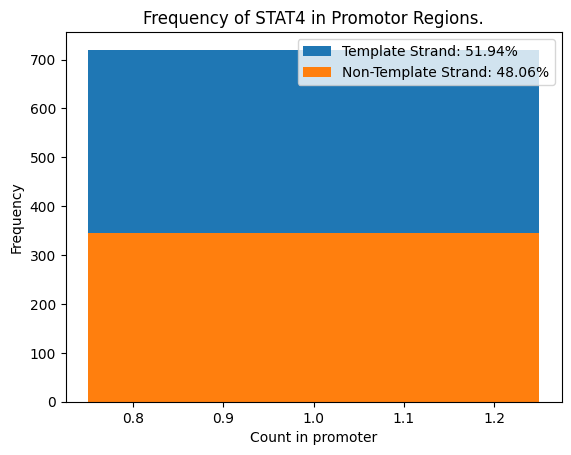

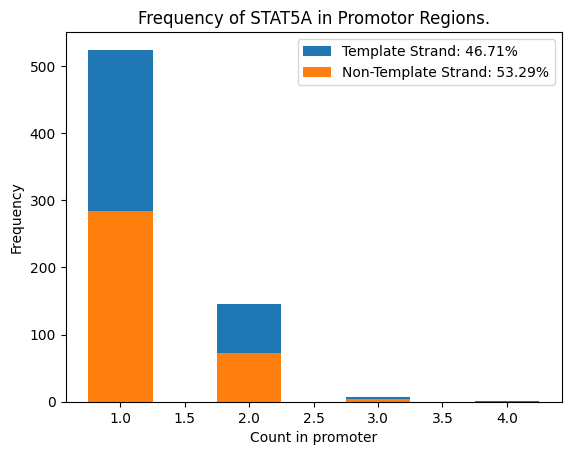

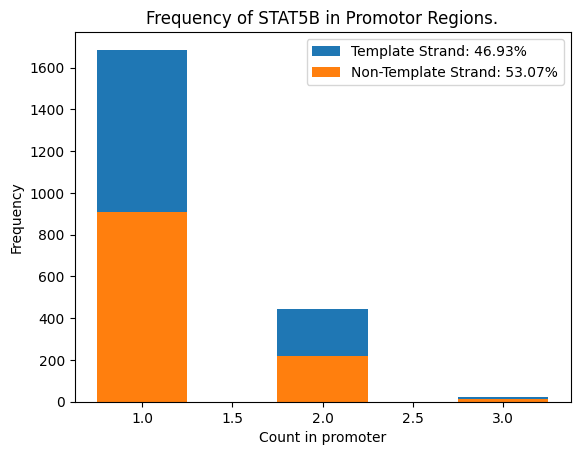

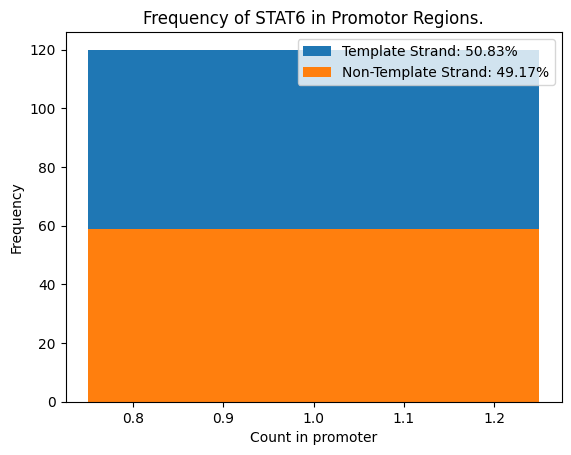

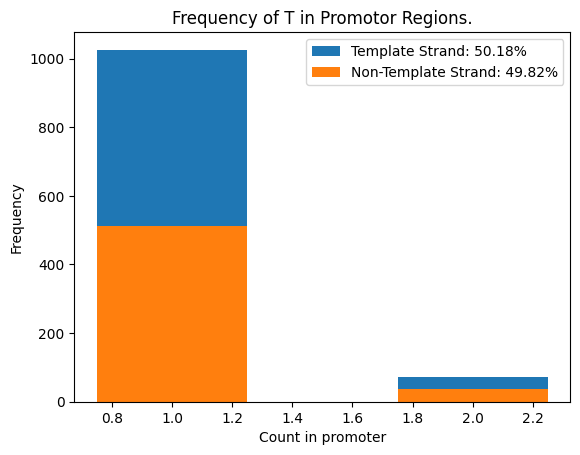

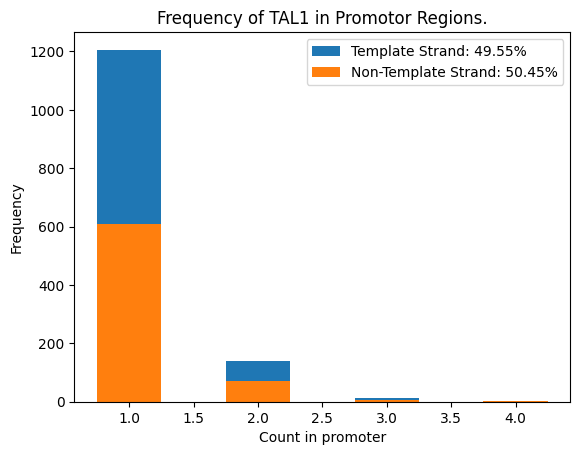

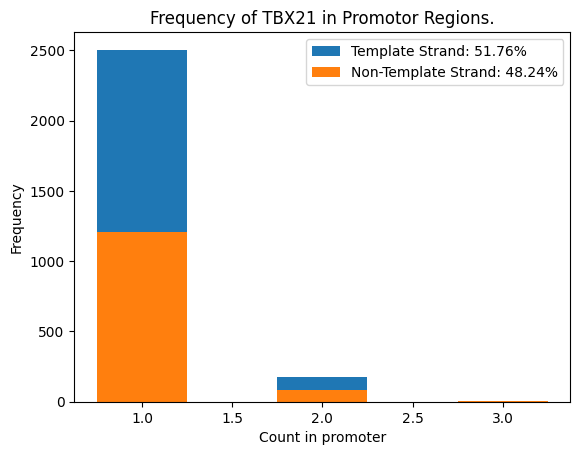

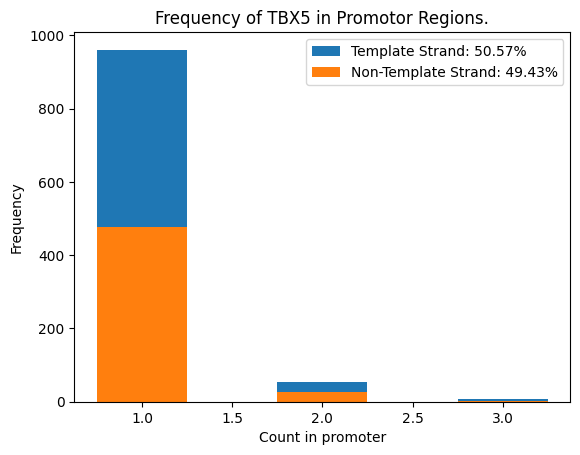

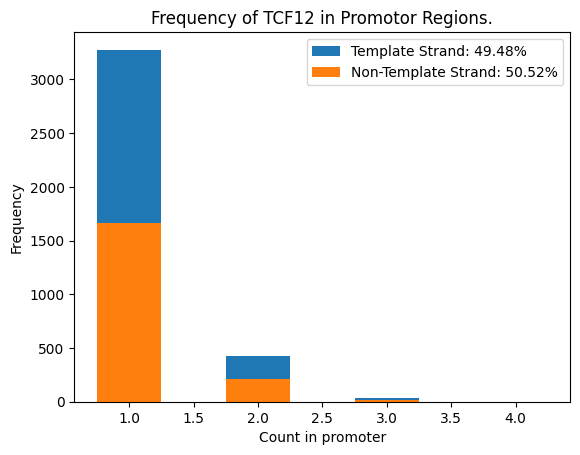

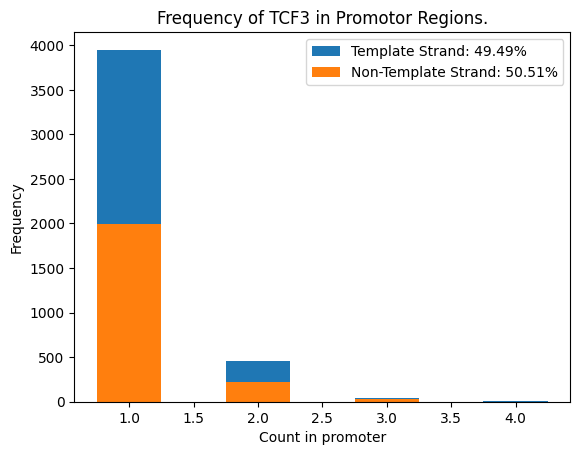

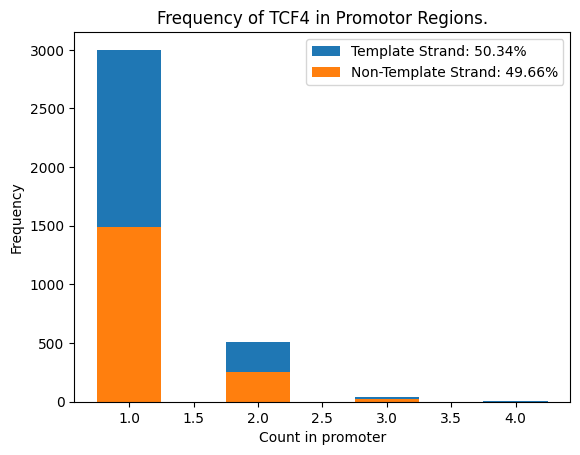

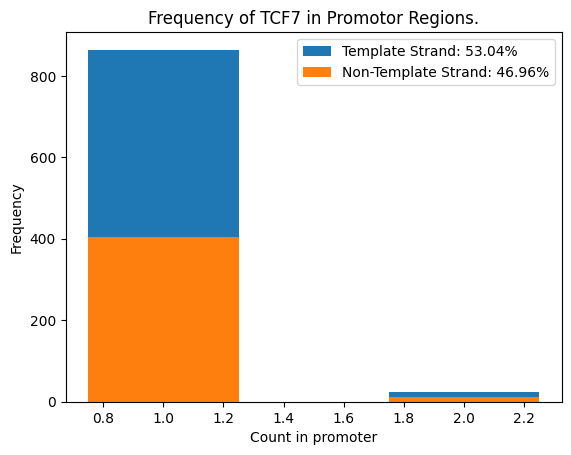

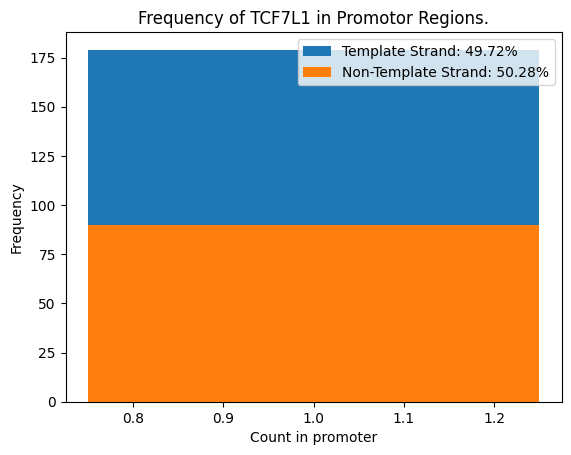

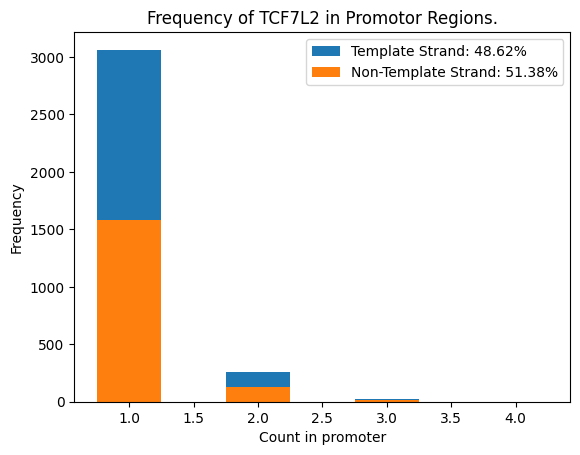

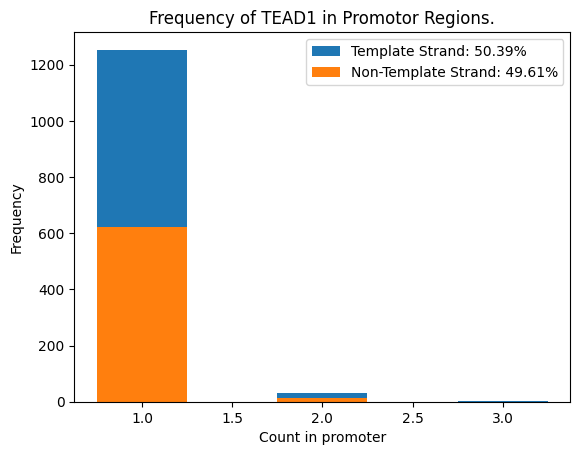

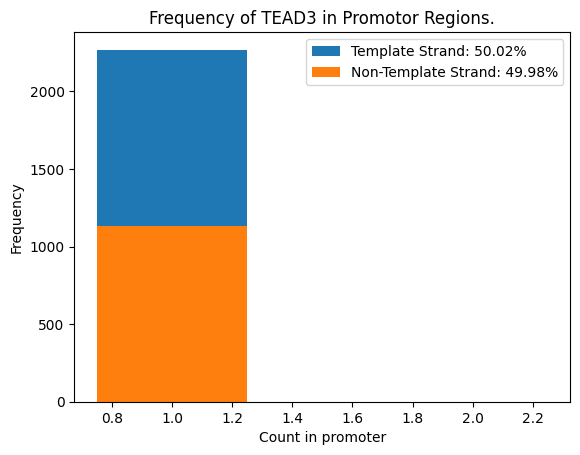

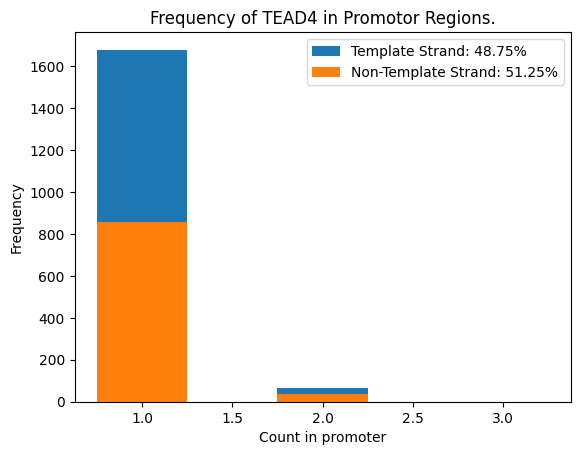

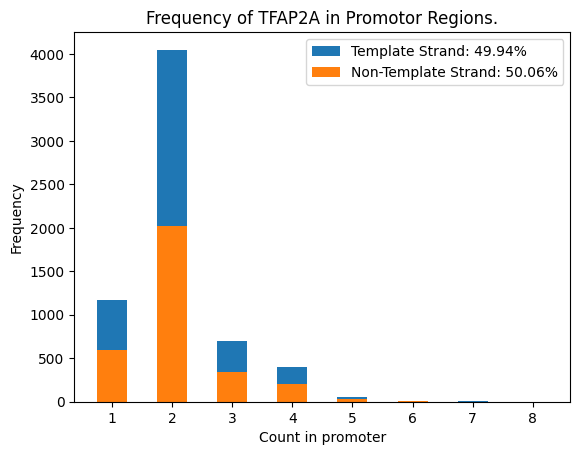

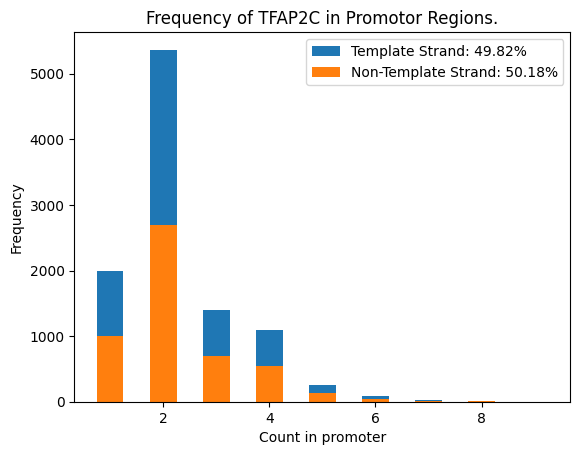

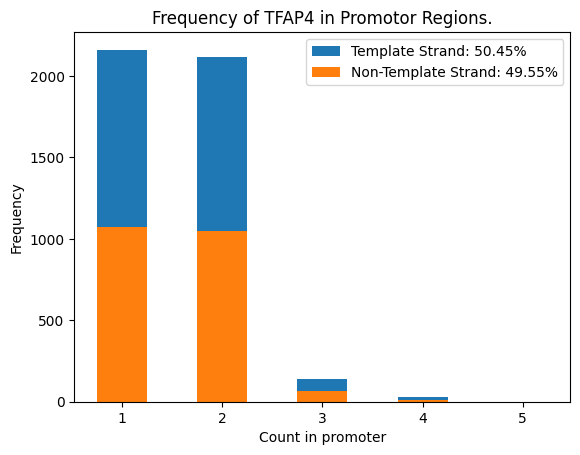

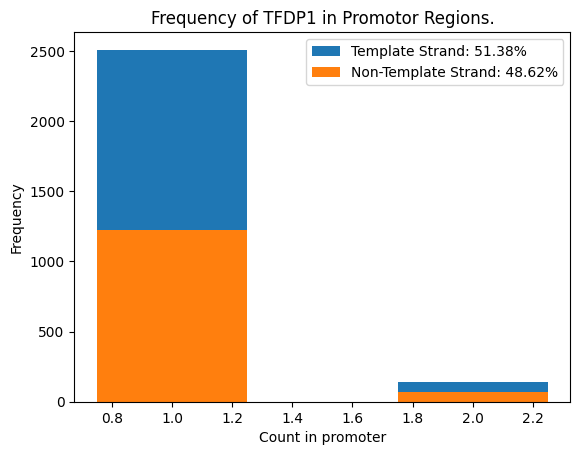

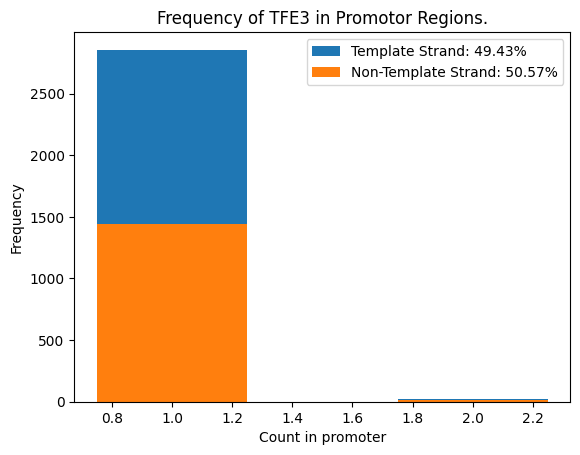

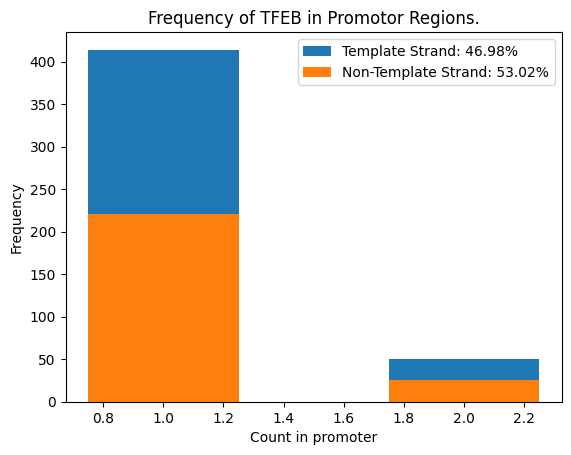

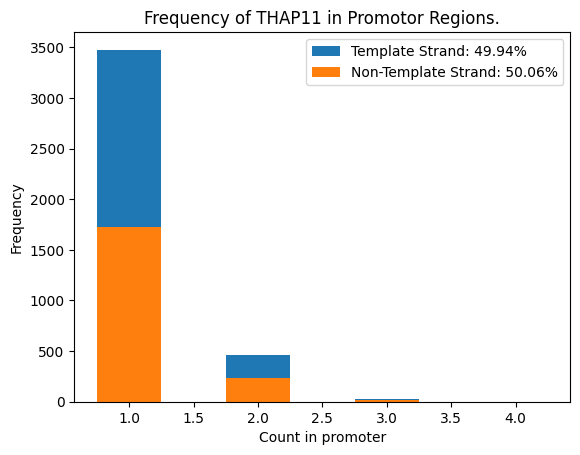

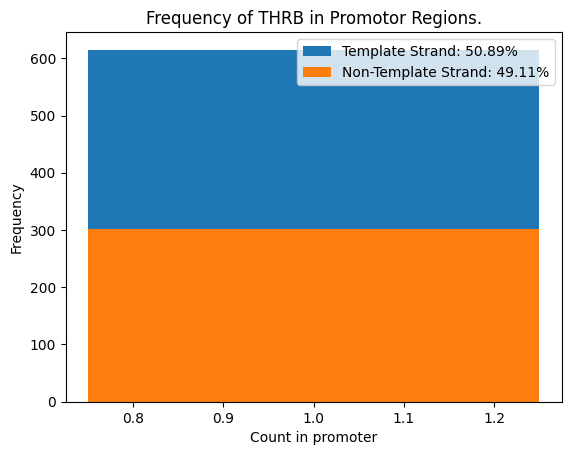

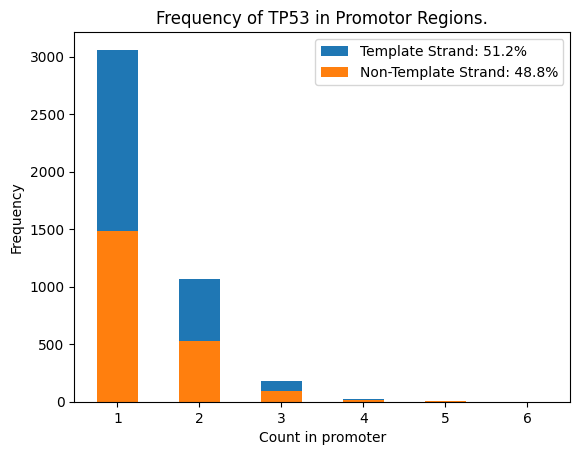

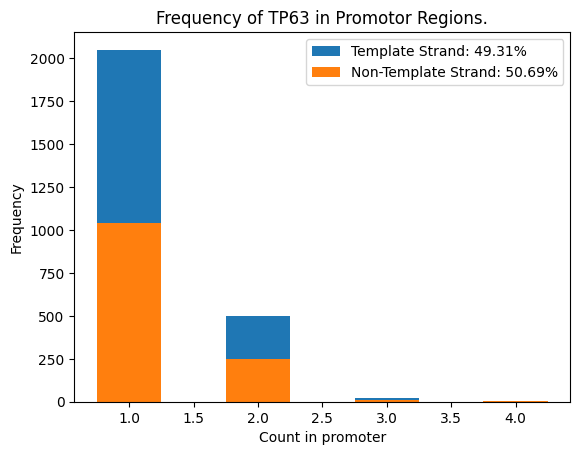

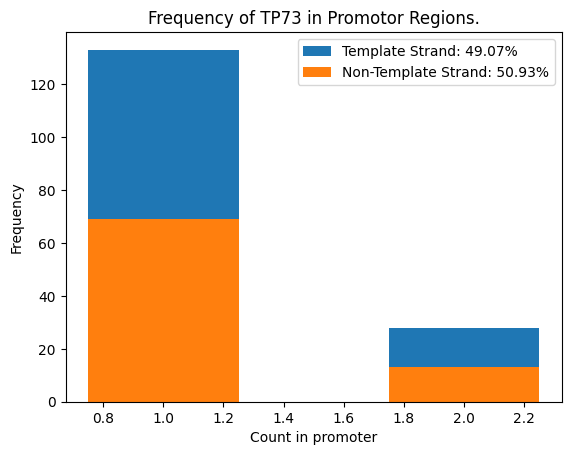

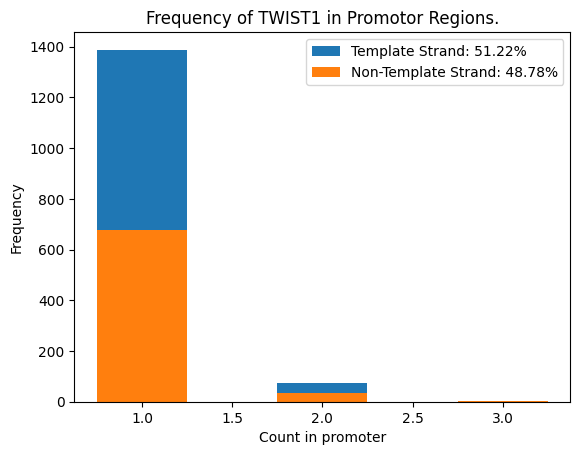

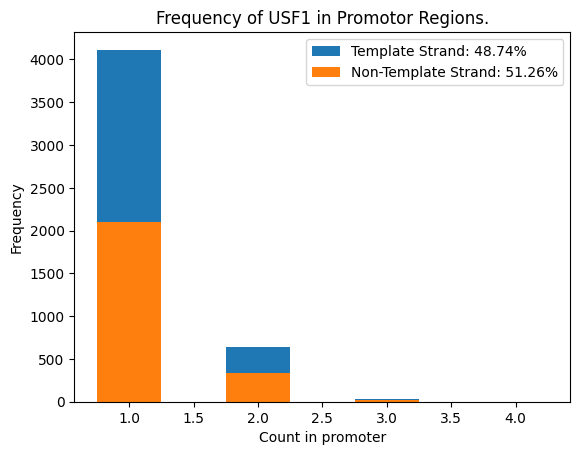

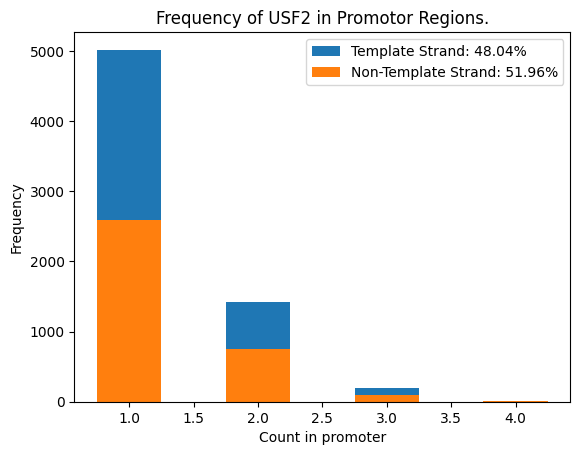

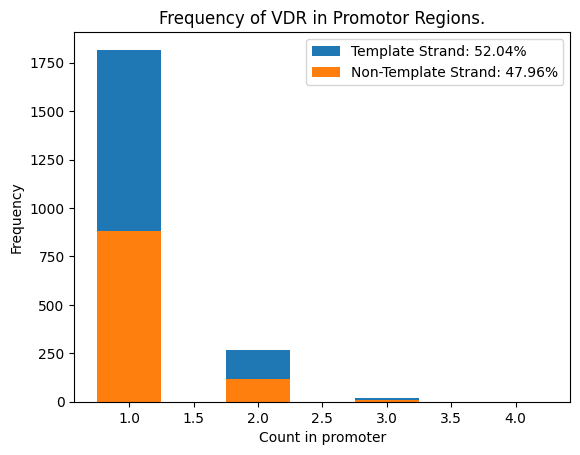

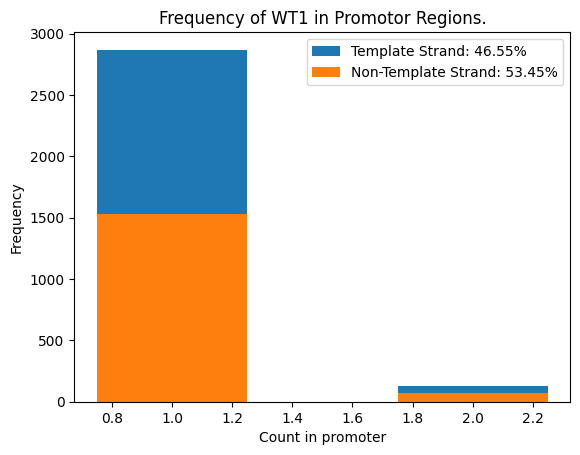

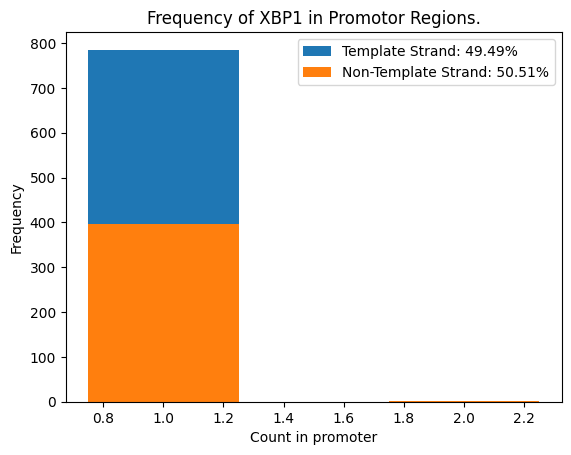

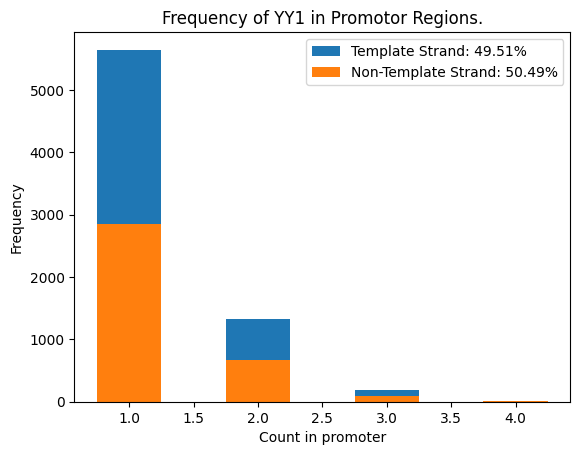

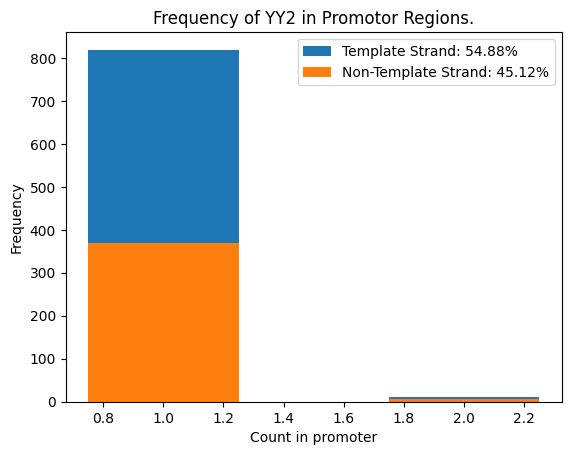

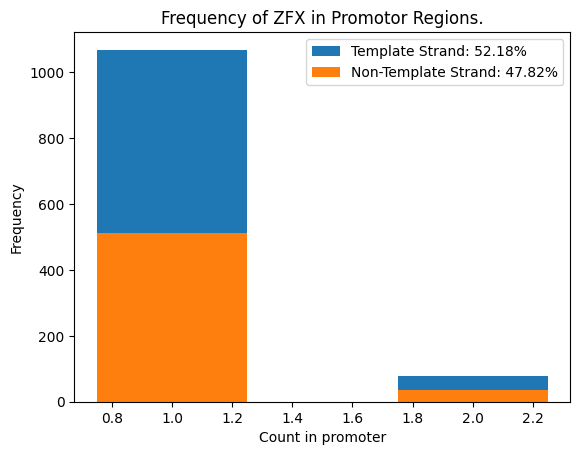

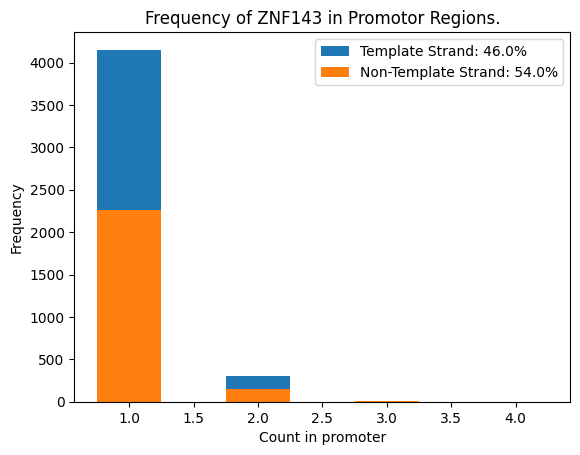

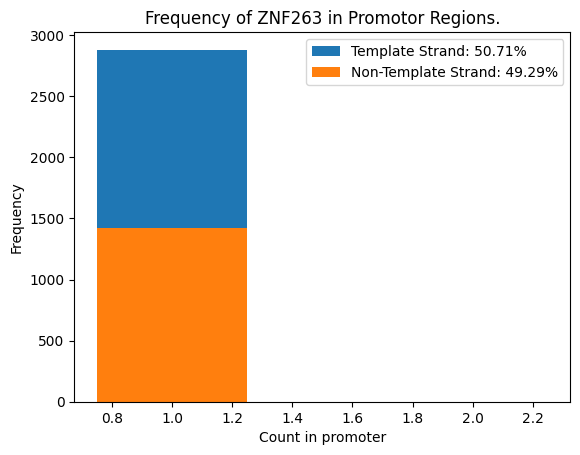

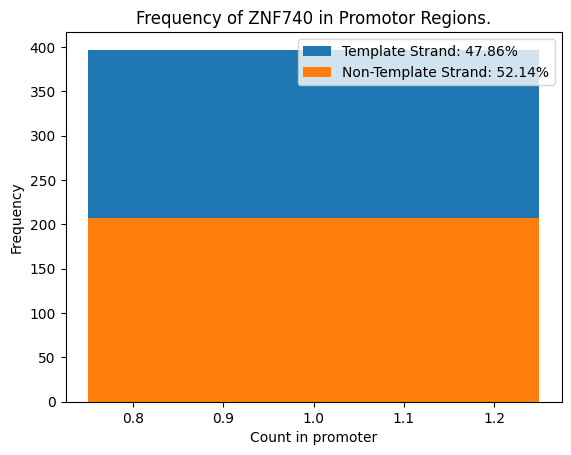

In [126]:

count_all, nT_pct_all, count_freq_all = get_count_of_all_tfbs(data, tfbs_lst, return_single_plots=True, output_folder=output_folder)

In [171]:
def plot_count_for_TFBSs(tfbs_lst, count_all, nT_pct_all, output_folder):

    df = pd.DataFrame({"TF": tfbs_lst, "TFBS_count":count_all, "nT_ratio":nT_pct_all})
    df = df.sort_values(by="TFBS_count", ascending=False)

    x = df["TF"].to_numpy()
    y1_T = df["TFBS_count"].to_numpy()
    y2_nT = df["nT_ratio"].to_numpy() * y1_T

    nT_percent_all = np.sum(nT_pct_all)/len(nT_pct_all)
    T_percent_all = np.abs(1-nT_percent_all)
    

    fig, ax = plt.subplots(figsize=(10,45))

    ax.barh(x, y1_T, label=f"Template Strand: {round(T_percent_all*100, 2)}%", align='center')
    ax.barh(x, y2_nT, label=f"Non-Template Strand: {round(nT_percent_all*100, 2)}%", align='center')
    ax.invert_yaxis()
    ax.set_yticks(np.arange(len(x)), x)
    ax.set_xlabel("TFBSs")
    ax.set_ylabel("Frequency")
    ax.legend(loc="lower right")
    ax.grid()
    plt.title("Frequency of all TFBS in Promotor Regions")
    

    fig.savefig(f"{output_folder}/Barplot_all_TFBS.png")


In [173]:
#plot_count_for_TFBSs(tfbs_lst, count_all, nT_pct_all, output_folder)

count_genetype = df_prom["geneType"].value_counts()
count_genetype.name = "GENCODE gene biotype"

relevant = count_genetype[:9]
other = count_genetype[10:].sum()
relevant["Other"] = other

fig = plt.figure()
relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], shadow = True, startangle= 90, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
plt.ylabel("")
fig.savefig("GTEx_genetype_count_pie_02.png")
fig.show()

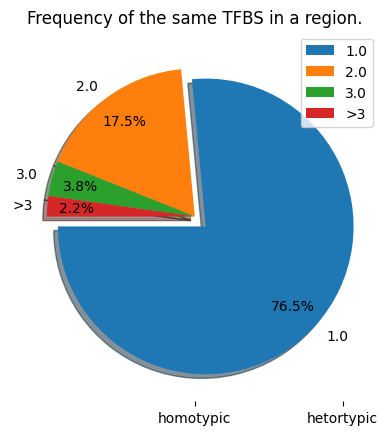

In [213]:
def plot_pie_for_count_freq(count_freq_all, output_folder):
    freq, count = np.unique(count_freq_all, return_counts=True)
    series = pd.Series(index=freq, data=count)

    relevant = series[:3]
    other = series[4:].sum()
    relevant[">3"] = other


    fig = plt.figure()
    relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0., 0., 0.], shadow = True, startangle=180, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
    plt.title("Frequency of the same TFBS in a region.")
    plt.legend()
    plt.xticks(np.arange(2), ["homotypic", "hetortypic"])
    fig.savefig(f"{output_folder}/Pie_TFBS_count_per_Promotor.png")

plot_pie_for_count_freq(count_freq_all, output_folder)